<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project2.do.txt  -->
<!-- dom:TITLE: Project 2 on Machine Learning, deadline November 4 (Midnight) -->

# Project 2 on Machine Learning, deadline November 4 (Midnight)
**[Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html)**, Department of Physics, University of Oslo, Norway

Date: **Oct 8, 2024**

Copyright 1999-2024, [Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html). Released under CC Attribution-NonCommercial 4.0 license

## Classification and Regression, from linear and logistic regression to neural networks

The main aim of this project is to study both classification and
regression problems by developing our own feed-forward neural network
(FFNN) code. We can reuse the regression algorithms studied in project
1. We will also include logistic regression for classification
problems and write our own FFNN code for studying both regression and
classification problems.  The codes developed in project 1, including
bootstrap **and/or** cross-validation as well as the computation of the
mean-squared error and/or the $R2$ or the accuracy score
(classification problems) functions can also be utilized in the
present analysis.

The data sets that we propose here are (the default sets)

* Regression (fitting a continuous function). In this part you will need to bring back your results from project 1 and compare these with what you get from your Neural Network code to be developed here. The data sets could be

a. A simple one-dimensional function or the Franke function or the terrain data from project 1, or data sets your propose. It could be a simpler function than the Franke function. We recommend testing a simpler function (see below). But if you wish to try more complex function, feel free to do so.

* Classification. Here you will also need to develop a Logistic regression code that you will use to compare with the Neural Network code. The data set we propose are the so-called [Wisconsin Breat Cancer Data](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) data set of images representing various features of tumors. A longer explanation with links to the scientific literature can be found at the [Machine Learning repository of the University of California at Irvine](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). Feel free to consult this site and the pertinent  literature.

You can find more information about this at the [Scikit-Learn site](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) or at the [University of California at Irvine](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)). 

However, if you would like to study other data sets, feel free to
propose other sets. What we list here are mere suggestions from our
side. If you opt for another data set, consider using a set which has
been studied in the scientific literature. This makes it easier for
you to compare and analyze your results. Comparing with existing
results from the scientific literature is also an essential element of
the scientific discussion.  The University of California at Irvine
with its Machine Learning repository at
<https://archive.ics.uci.edu/ml/index.php> is an excellent site to
look up for examples and
inspiration. [Kaggle.com](https://www.kaggle.com/) is an equally
interesting site. Feel free to explore these sites.

We will start with a regression problem and we will reuse our codes from project 1 starting with writing our own Stochastic Gradient Descent (SGD) code.

### Part a): Write your own Stochastic Gradient Descent  code, first step

In order to get started, we will now replace in our standard ordinary
least squares (OLS) and Ridge regression codes (from project 1) the
matrix inversion algorithm with our own gradient descent (GD) and SGD
codes.  You can use the Franke function or the terrain data from
project 1. **However, we recommend using a simpler function like**
$f(x)=a_0+a_1x+a_2x^2$ or higher-order one-dimensional polynomials.
You can obviously test your final codes against for example the Franke
function.

The exercise set for week 41 should help in solving this part of the project.

You should include in your analysis of the GD and SGD codes the following elements
1. A plain gradient descent with a fixed learning rate (you will need to tune it) using the analytical expression for the gradient.

2. Add momentum to the plain GD code and compare convergence with a fixed learning rate (you may need to tune the learning rate). Keep using the analytical expression for the gradient.

3. Repeat these steps for stochastic gradient descent with mini batches and a given number of epochs. Use a tunable learning rate as discussed in the lectures from weeks 39 and 40. Discuss the results as functions of the various parameters (size of batches, number of epochs etc). Use the analytical gradient.

4. Implement the Adagrad method in order to tune the learning rate. Do this with and without momentum for plain gradient descent and SGD.

5. Add RMSprop and Adam to your library of methods for tuning the learning rate.

The lecture notes from [weeks 39 and 40 contain more
details](https://compphysics.github.io/MachineLearning/doc/pub/week39/html/week39.html) and code examples. Feel free to use these examples.
1. Replace thereafter your analytical gradient with either **Autograd** or **JAX**

**Feel free to use codes on these methods from the lecture notes from week 39 and week 40**.

In summary, you should 
perform an analysis of the results for OLS and Ridge regression as
function of the chosen learning rates, the number of mini-batches and
epochs as well as algorithm for scaling the learning rate. You can
also compare your own results with those that can be obtained using
for example **Scikit-Learn**'s various SGD options.  Discuss your
results. For Ridge regression you need now to study the results as functions of  the hyper-parameter $\lambda$ and 
the learning rate $\eta$.  Discuss your results.

You will need your SGD code for the setup of the Neural Network and
Logistic Regression codes. You will find the Python [Seaborn
package](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
useful when plotting the results as function of the learning rate
$\eta$ and the hyper-parameter $\lambda$ when you use Ridge
regression. Since you will use different gradient descent methods, you can also add Lasse regression. This is however optional. How to code Lasso regression is discussed in the lecture notes from week 40.

We recommend reading chapter 8 on optimization from the textbook of Goodfellow, Bengio and Courville at <https://www.deeplearningbook.org/>. This chapter contains many useful insights and discussions on the optimization part of machine learning.

---

### 1. Define function

The first step is to define the function we aim at fitting. Here we will use a simple polynomial function:
$$
f(x) = 4 + 3x + 5x^2.
$$

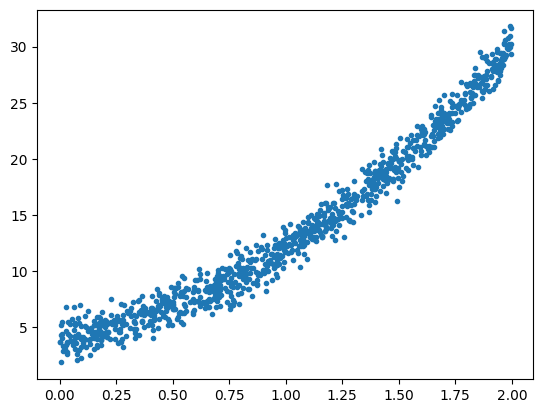

In [266]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    """Function to generate the data

        Args:
            x: input data
        
        Returns:
            y: output data (4 + 3*x + 5*x^2 + noise)
    """
    return 4 + 3*x + 5*x**2 + np.random.randn(len(x),1)  # shape (n,1) matrix, n random numbers from a normal distribution

def generate_data(n):
    """Function to generate the data

        Args:
            n: number of data points
        
        Returns:
            x: input data
            y: output data
    """
    x = 2*np.random.rand(n,1)  # shape (n,1) matrix, n random numbers between 0 and 2
    return x, f(x)

# plot the data
n = 1000
x, y = generate_data(n)
plt.plot(x,y,'.')

### 2. Write own Gradient Descent code

Now I will write my own Gradient Descent code.

In [267]:
class LinearRegression():
    def __init__(
            self, 
            reg_method="ols",  # regression method
            optimizer=None,  # optimizer object
            degree=2,  # degree of the polynomial
            **kwargs
    ):
        self.reg_method = reg_method
        self.optimizer = optimizer
        self.degree = degree

        if self.reg_method == "ridge":
            assert "ridge_lambda" in kwargs, "Ridge regression requires a ridge_lambda parameter"
            self.ridge_lambda = kwargs["ridge_lambda"]
        

    def fit(self, x, y, epochs=1000):
        """Fit the model to the data
        
            Args:
                x: input data (n x 1) vector
                y: output data (n x 1) vector

            Returns:
                self
        """
        n, _ = x.shape  # len of x
        X = self._design_matrix(x)  # design matrix

        if self.optimizer is not None:
            grads, mses = self.optimizer.fit(self, X, y)
            self.grads = grads
            self.mses = mses
        else:
            self._standard_fit(x, y)
    
    def _standard_fit(self, x, y):
        """Fit the model to the data
        
            Args:
                x: input data (n x 1) vector
                y: output data (n x 1) vector

            Returns:
                self
        """
        n, _ = x.shape  # len of x
        X = self._design_matrix(x)  # design matrix
        if self.reg_method == "ols":
            self.theta = np.linalg.inv(X.T @ X) @ X.T @ y
        elif self.reg_method == "ridge":
            self.theta = np.linalg.inv(X.T @ X + 2*self.ridge_lambda*np.eye(X.shape[1])) @ X.T @ y
        return self

    def _design_matrix(self, x):
        """Create the design matrix
        
            Args:
                x: input data (n x 1) vector
                degree: degree of the polynomial

            Returns:
                X: design matrix (n x degree+1) matrix
        """
        n, _ = x.shape  # len of x
        X = np.ones((n, 1))
        for i in range(1, self.degree+1):
            X = np.c_[X, x**i]
        return X

    def predict(self, x):
        """Predict the output
        
            Args:
                x: input data (n x 1) vector

            Returns:
                y: output data (n x 1) vector
        """
        X = self._design_matrix(x)
        return X @ self.theta
    
    def _mse(self, x, y):
        """Calculate the mean squared error
        
            Args:
                x: input data (n x 1) vector
                y: output data (n x 1) vector

            Returns:
                mse: mean squared error
        """
        return np.mean((self.predict(x) - y)**2)   
    
    def analyse(self, x, y, threshold=0.0025, max_iterations=1000):
        """Analyse the model with the mean squared error
        
            Args:
                x: input data (n x 1) vector
                y: output data (n x 1) vector
                threshold: threshold for the variance of the mean squared error
                max_iterations: maximum number of iterations

            Returns:
                mean of the mean squared errors
        """
        mses = []
        i = 0
        while True:
            mses.append(self._mse(x, y))

            if i > max_iterations:
                print("Max iterations reached")
                break
            if len(mses) > 100:
                mse_var = np.var(mses)
                if mse_var < threshold:
                    break

        return np.mean(mses)
    
    def num_to_convergence(self, mses, threshold=0.005):
        """Given a list of mse values, return the number of iterations to convergence
            The model converges when the difference between 10 consecutive mse values is less than the threshold
        
            Args:
                mses: list of mean squared errors
                threshold: threshold for the variance of the mean squared error

            Returns:
                number of iterations to convergence
        """
        i = 0
        while True:
            if i >= len(mses)-10:
                return i
            if np.abs(mses[i] - mses[i+10]) < threshold:
                return i
            i += 1

class GradientDescentOptimizer():
    def __init__(
            self,
            learning_rate=0.1,  # learning rate
            epochs=1000,  # number of epochs
            momentum=False,  # momentum
            **kwargs
    ):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.momentum = momentum

        if self.momentum:
            assert "momentum_delta" in kwargs, "Momentum requires a momentum_delta parameter"
            self.momentum_delta = kwargs["momentum_delta"] 

    def fit(self, model, X, y):
        """Fit the model to the data
        
            Args:
                model: model object
                X: design matrix (n x degree+1) matrix
                y: output data (n x 1) vector

            Returns:
                gradients_history: history of the gradients
                mse_history: history of the mean squared errors
        """
        n, _ = X.shape  # len of x
        model.theta = np.random.randn(X.shape[1],1)  # random initialization of the parameters
        gradients_history = np.zeros((self.epochs, X.shape[1]))  # history of the gradients
        mse_history = np.zeros(self.epochs)  # history of the mean squared errors
        change = 0.0
        for i in range(self.epochs):
            regularization = 0 if model.reg_method == "ols" else 2*model.ridge_lambda*model.theta
            gradients = 2/n * X.T @ (X @ model.theta - y) + regularization

            if self.momentum:
                new_change = self.learning_rate * gradients + self.momentum_delta * change
                model.theta -= new_change
                change = new_change
            else:
                model.theta -= self.learning_rate * gradients

            gradients_history[i] = gradients.flatten()
            mse_history[i] = self._mse(X, y, model)

        return gradients_history, mse_history
    
    def _mse(self, X, y, model):
        """Calculate the mean squared error
        
            Args:
                X: design matrix (n x degree+1) matrix
                y: output data (n x 1) vector

            Returns:
                mse: mean squared error
        """
        return np.mean((X @ model.theta - y)**2)


#### 2.1 Plain Gradient Descent Analysis

##### 2.1.1 Without Momentum

OLS regression - vary learning rate.

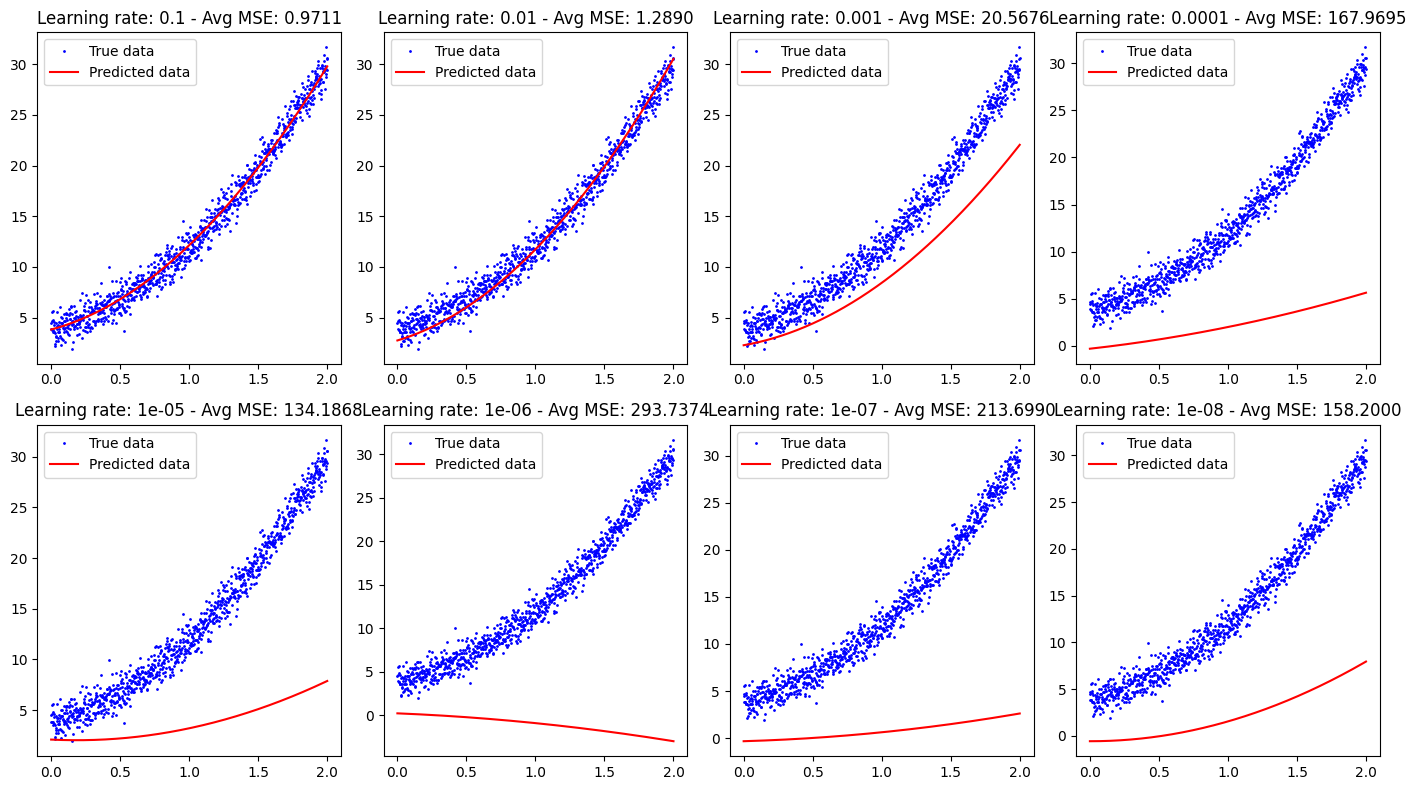

In [268]:
np.random.seed(42)  # set random seed for reproducibility
learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7, 1e-8]
x_new = np.linspace(0, 2, 1000).reshape(1000,1)
y_new = f(x_new)
plt.figure(figsize=(14,8))

for i, learning_rate in enumerate(learning_rates):
    optimizer = GradientDescentOptimizer(learning_rate=learning_rate, epochs=100)
    model = LinearRegression(optimizer=optimizer, degree=2)
    model.fit(x, y)
    y_pred = model.predict(x_new)

    # calculate the mean squared error
    mean_mse = model.analyse(x_new, y_new)

    plt.subplot(2,4,i+1)
    plt.plot(x_new, y_new, "b.", label="True data", markersize=2)
    plt.plot(x_new, y_pred, "r-", label="Predicted data")
    plt.legend()
    plt.title(f"Learning rate: {learning_rate} - Avg MSE: {mean_mse:.4f}")

plt.tight_layout()
plt.show()

OLS regression - vary learning rate with cross-validation.

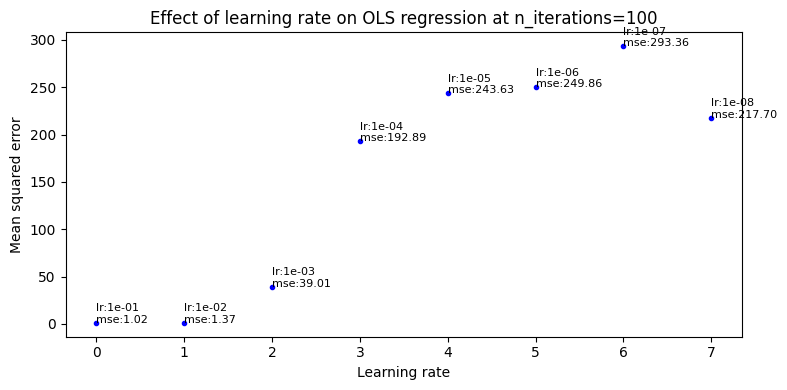

In [269]:
from sklearn.model_selection import KFold

np.random.seed(42)  # set random seed for reproducibility
# analyse effect of learning rate on OLS regression with cross-validation
learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7, 1e-8]

kf = KFold(n_splits=5)  # 5-fold cross-validation

plt.figure(figsize=(8, 4))

for i, lr in enumerate(learning_rates):
    mses = []
    for j, (train_index, test_index) in enumerate(kf.split(x)):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        optimizer = GradientDescentOptimizer(learning_rate=lr, epochs=100)
        model = LinearRegression(optimizer=optimizer, degree=2)
        model.fit(x_train, y_train)
        mses.append(model.analyse(x_test, y_test))
        
    mean_mse = np.mean(mses)
    plt.plot(i, mean_mse, 'b.')
    plt.text(i, mean_mse, f"lr:{lr:.0e}\nmse:{mean_mse:.2f}", fontsize=8)

plt.xlabel("Learning rate")
plt.ylabel("Mean squared error")
plt.title("Effect of learning rate on OLS regression at n_iterations=100")

plt.tight_layout()
plt.show()


Ridge regression - vary learning rate.

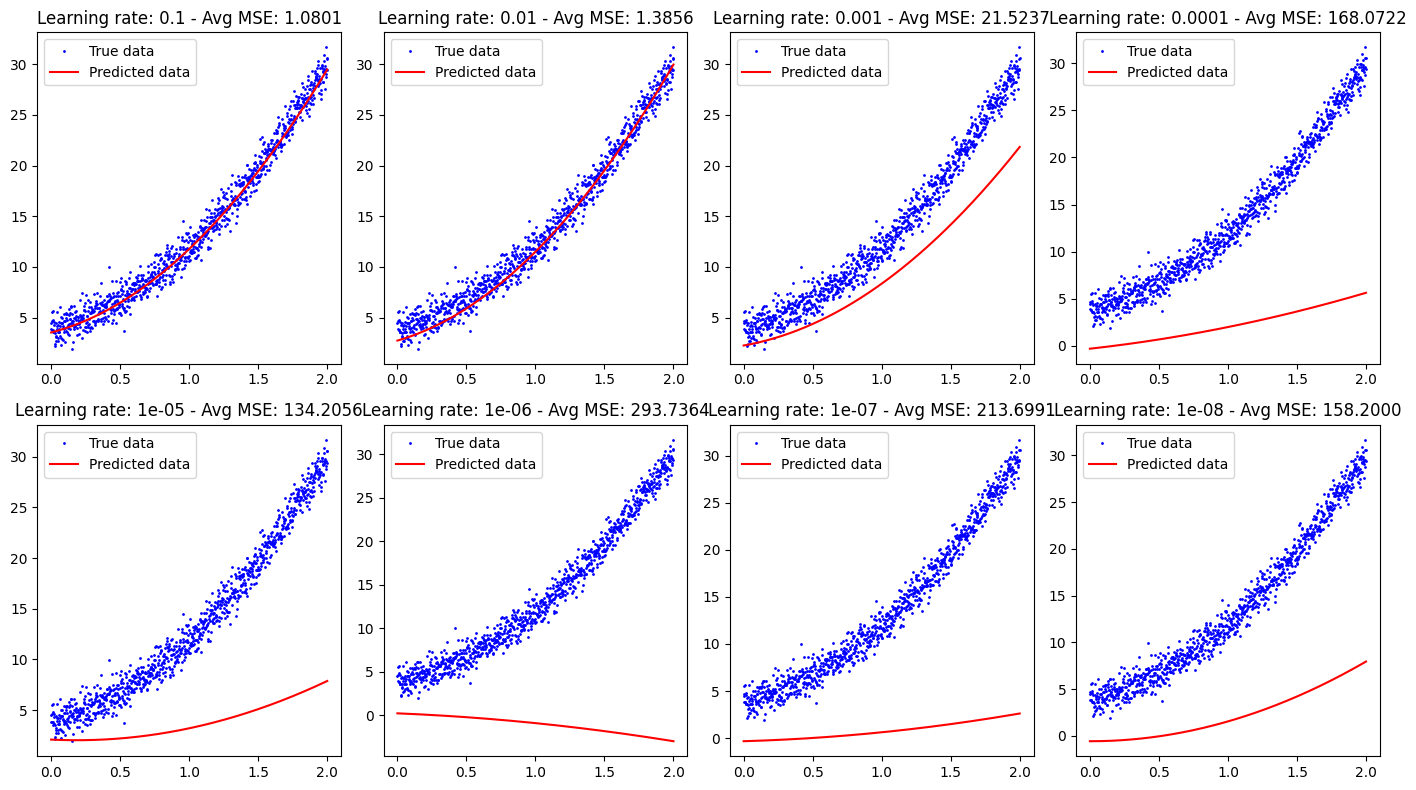

In [270]:
# analyse effect of learning rate on Ridge regression
np.random.seed(42)  # set random seed for reproducibility
learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7, 1e-8]
x_new = np.linspace(0, 2, 1000).reshape(1000,1)
y_new = f(x_new)
plt.figure(figsize=(14,8))
for i, learning_rate in enumerate(learning_rates):
    optimizer = GradientDescentOptimizer(learning_rate=learning_rate, epochs=100)
    model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ridge", ridge_lambda=0.1)
    model.fit(x, y)
    y_pred = model.predict(x_new)

    # calculate the mean squared error
    mean_mse = model.analyse(x_new, y_new)

    plt.subplot(2,4,i+1)
    plt.plot(x_new, y_new, "b.", label="True data", markersize=2)
    plt.plot(x_new, y_pred, "r-", label="Predicted data")
    plt.legend()
    plt.title(f"Learning rate: {learning_rate} - Avg MSE: {mean_mse:.4f}")

plt.tight_layout()
plt.show()

Ridge regression - vary learning rate with cross-validation.

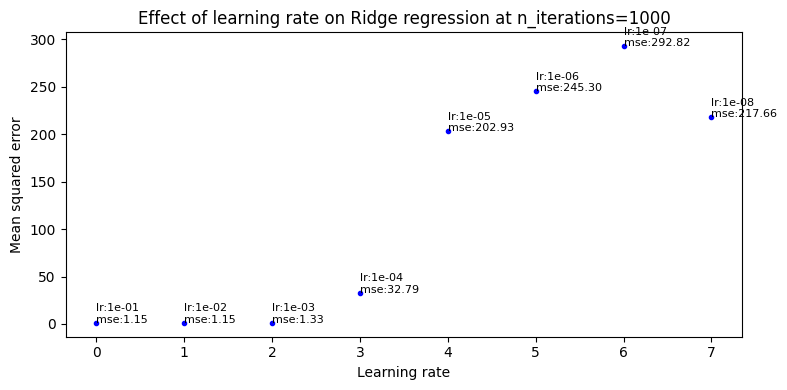

In [271]:
np.random.seed(42)  # set random seed for reproducibility
# analyse effect of learning rate on OLS regression with cross-validation
learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7, 1e-8]

kf = KFold(n_splits=5)  # 5-fold cross-validation

plt.figure(figsize=(8, 4))

for i, lr in enumerate(learning_rates):
    mses = []
    for j, (train_index, test_index) in enumerate(kf.split(x)):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        optimizer = GradientDescentOptimizer(learning_rate=lr)
        model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ridge", ridge_lambda=0.1)
        model.fit(x_train, y_train)
        mses.append(model.analyse(x_test, y_test))
        
    mean_mse = np.mean(mses)
    plt.plot(i, mean_mse, 'b.')
    plt.text(i, mean_mse, f"lr:{lr:.0e}\nmse:{mean_mse:.2f}", fontsize=8)

plt.xlabel("Learning rate")
plt.ylabel("Mean squared error")
plt.title("Effect of learning rate on Ridge regression at n_iterations=1000")

plt.tight_layout()
plt.show()

Ridge regression - vary $\lambda$ at learning rate 0.01.

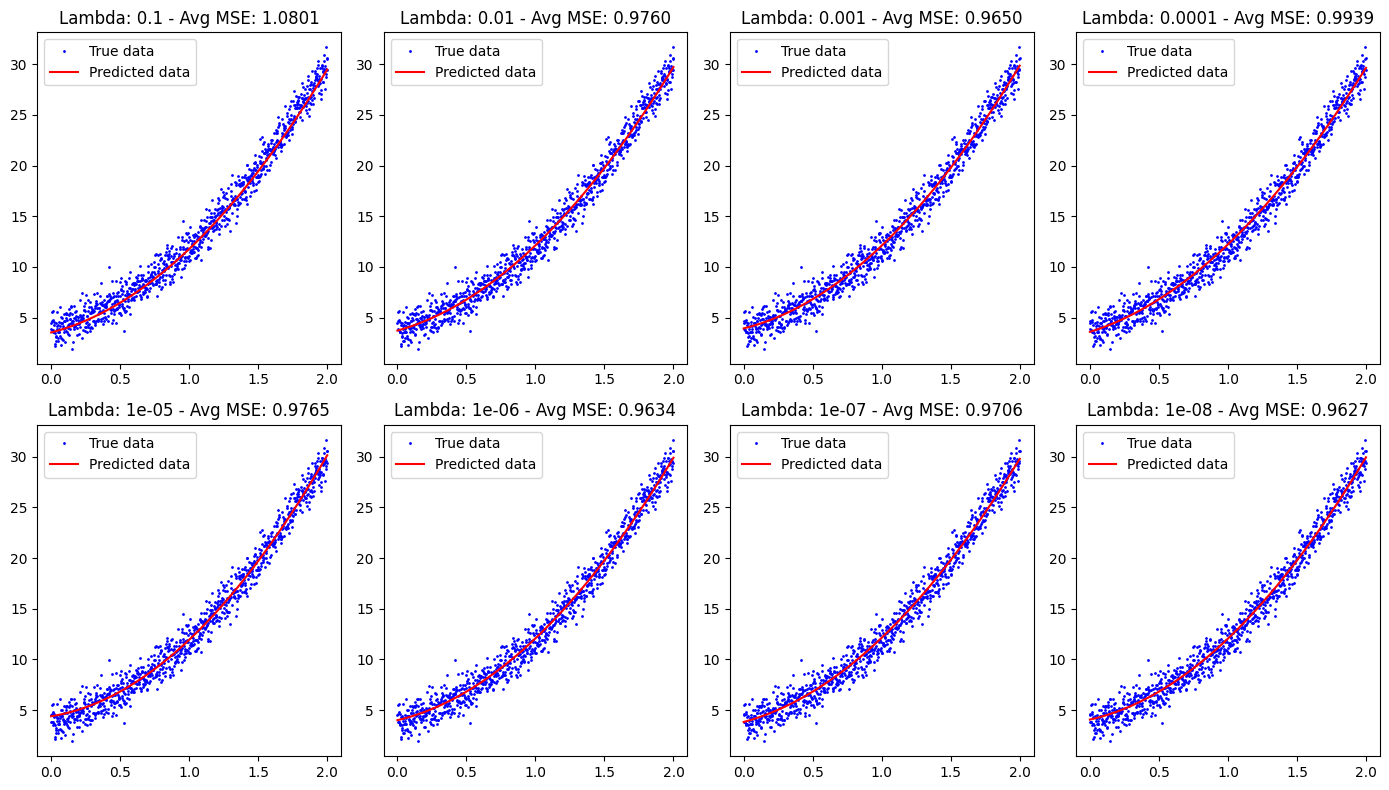

In [272]:
# analyse effect of lambda on Ridge regression
np.random.seed(42)  # set random seed for reproducibility
lambdas = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7, 1e-8]
x_new = np.linspace(0, 2, 1000).reshape(1000,1)
y_new = f(x_new)
plt.figure(figsize=(14,8))
for i, lambda_ in enumerate(lambdas):
    optimizer = GradientDescentOptimizer(learning_rate=0.1, epochs=100)
    model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ridge", ridge_lambda=lambda_)
    model.fit(x, y)
    y_pred = model.predict(x_new)

    # calculate the mean squared error
    mean_mse = model.analyse(x_new, y_new)

    plt.subplot(2,4,i+1)
    plt.plot(x_new, y_new, "b.", label="True data", markersize=2)
    plt.plot(x_new, y_pred, "r-", label="Predicted data")
    plt.legend()
    plt.title(f"Lambda: {lambda_} - Avg MSE: {mean_mse:.4f}")

plt.tight_layout()
plt.show()

Ridge regression - vary $\lambda$ at learning rate 0.01 with cross-validation.

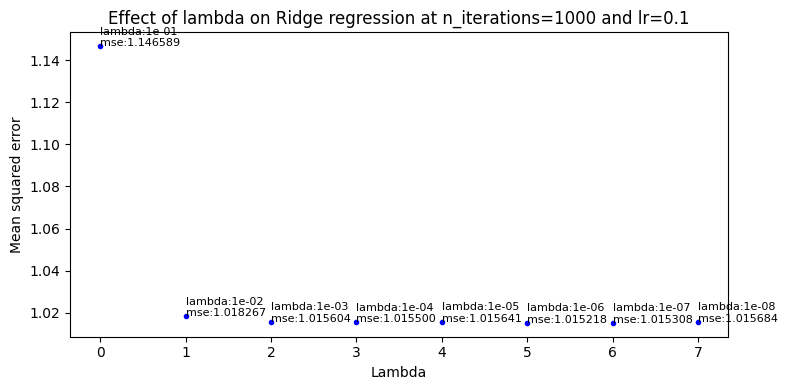

In [273]:
# analyse effect of lambda on Ridge regression with cross-validation
np.random.seed(42)  # set random seed for reproducibility
lambdas = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7, 1e-8]

kf = KFold(n_splits=5)  # 5-fold cross-validation

plt.figure(figsize=(8, 4))

for i, lambda_ in enumerate(lambdas):
    mses = []
    for j, (train_index, test_index) in enumerate(kf.split(x)):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        optimizer = GradientDescentOptimizer(learning_rate=0.1)
        model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ridge", ridge_lambda=lambda_)
        model.fit(x_train, y_train)
        mses.append(model.analyse(x_test, y_test))
        
    mean_mse = np.mean(mses)
    plt.plot(i, mean_mse, 'b.')
    plt.text(i, mean_mse, f"lambda:{lambda_:.0e}\nmse:{mean_mse:.6f}", fontsize=8)

plt.xlabel("Lambda")
plt.ylabel("Mean squared error")
plt.title("Effect of lambda on Ridge regression at n_iterations=1000 and lr=0.1")

plt.tight_layout()
plt.show()

##### 2.1.2 With Momentum

OLS regression - compare convergence with a fixed learning rate=0.01 at n_iter=100.

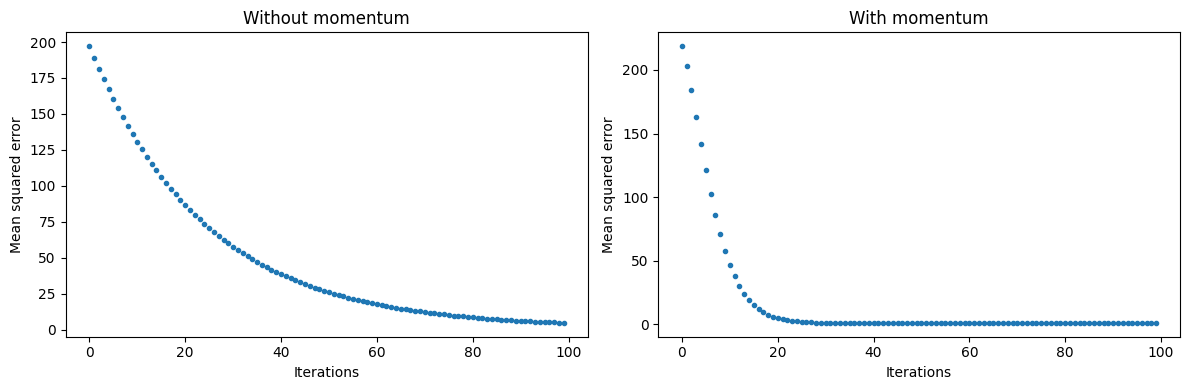

In [274]:
# compare convergence with and without momentum
np.random.seed(42)  # set random seed for reproducibility
learning_rate = 0.002
epochs = 100

plt.figure(figsize=(12,4))
optimizer = GradientDescentOptimizer(learning_rate=learning_rate, epochs=epochs, reg_method="ols", momentum=False)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
gradients, mses = model.grads, model.mses
plt.subplot(1,2,1)
plt.plot(mses, '.')
plt.xlabel("Iterations")
plt.ylabel("Mean squared error")
plt.title("Without momentum")

optimizer = GradientDescentOptimizer(learning_rate=learning_rate, epochs=epochs, reg_method="ols", momentum=True, momentum_delta=0.75)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
gradients, mses = model.grads, model.mses
plt.subplot(1,2,2)
plt.plot(mses, '.')
plt.xlabel("Iterations")
plt.ylabel("Mean squared error")
plt.title("With momentum")

plt.tight_layout()
plt.show()


Ridge regression - compare convergence with a fixed learning rate=0.01 at n_iter=100.

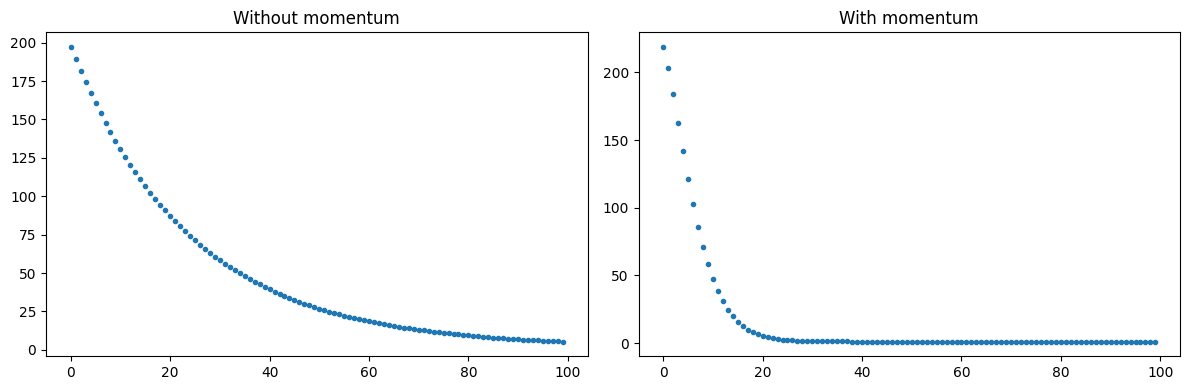

In [275]:
# compare convergence with and without momentum
np.random.seed(42)  # set random seed for reproducibility
learning_rate = 0.002
epochs = 100

plt.figure(figsize=(12,4))
optimizer = GradientDescentOptimizer(learning_rate=learning_rate, epochs=epochs, momentum=False)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ridge", ridge_lambda=0.1)
model.fit(x, y)
mses = model.mses
plt.subplot(1,2,1)
plt.plot(mses, '.')
plt.title("Without momentum")

optimizer = GradientDescentOptimizer(learning_rate=learning_rate, epochs=epochs, momentum=True, momentum_delta=0.75)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ridge", ridge_lambda=0.1)
model.fit(x, y)
mses = model.mses
plt.subplot(1,2,2)
plt.plot(mses, '.')
plt.title("With momentum")

plt.tight_layout()
plt.show()

### 3. Write own Stochastic Gradient Descent code

I will now write my own Stochastic Gradient Descent code.

In [276]:
class SGDOptimizer(GradientDescentOptimizer):
    def __init__(
            self, 
            learning_rate=0.1, 
            epochs=1000, 
            momentum=False, 
            batch_size=32,
            **kwargs
        ):
        super().__init__(learning_rate, epochs, momentum, **kwargs)
        self.batch_size = batch_size
        self.t0 = kwargs.get("t0", 1)
        self.t1 = kwargs.get("t1", 1000)

    def _learning_schedule(self, t):
        t0, t1 = self.t0, self.t1
        return t0 / (t + t1)
    
    def fit(self, model, X, y):
        n, _ = X.shape  # len of x
        model.theta = np.random.randn(X.shape[1],1)  # random initialization of the parameters
        gradients_history = np.zeros((self.epochs, X.shape[1]))  # history of the gradients
        mse_history = np.zeros(self.epochs)  # history of the mean squared errors
        change = 0.0
        m = int(n / self.batch_size)  # number of mini-batches
        for epoch in range(self.epochs):
            batch_gradient = np.zeros((m, X.shape[1]))
            for i in range(m):
                random_index = self.batch_size*np.random.randint(m)
                X_mini = X[random_index:random_index+self.batch_size]
                y_mini = y[random_index:random_index+self.batch_size]

                regularization = 0 if model.reg_method == "ols" else 2*model.ridge_lambda*model.theta
                gradients = 2/self.batch_size * X_mini.T @ (X_mini @ model.theta - y_mini) + regularization

                self.learning_rate = self._learning_schedule(epoch*m + i)

                if self.momentum:
                    new_change = self.learning_rate * gradients + self.momentum_delta * change
                    model.theta -= new_change
                    change = new_change
                else:
                    model.theta -= self.learning_rate * gradients

                batch_gradient[i] = gradients.flatten()

            gradients_history[epoch] = np.mean(batch_gradient, axis=0)
            mse_history[epoch] = self._mse(X, y, model)

        return gradients_history, mse_history


#### 3.1 Stochastic Gradient Descent Analysis

##### 3.1.1 Without Momentum

OLS regression - vary learning rate.

comments: We see that because the learning rate is adaptive, the initial choice of learning rate does not matter much.

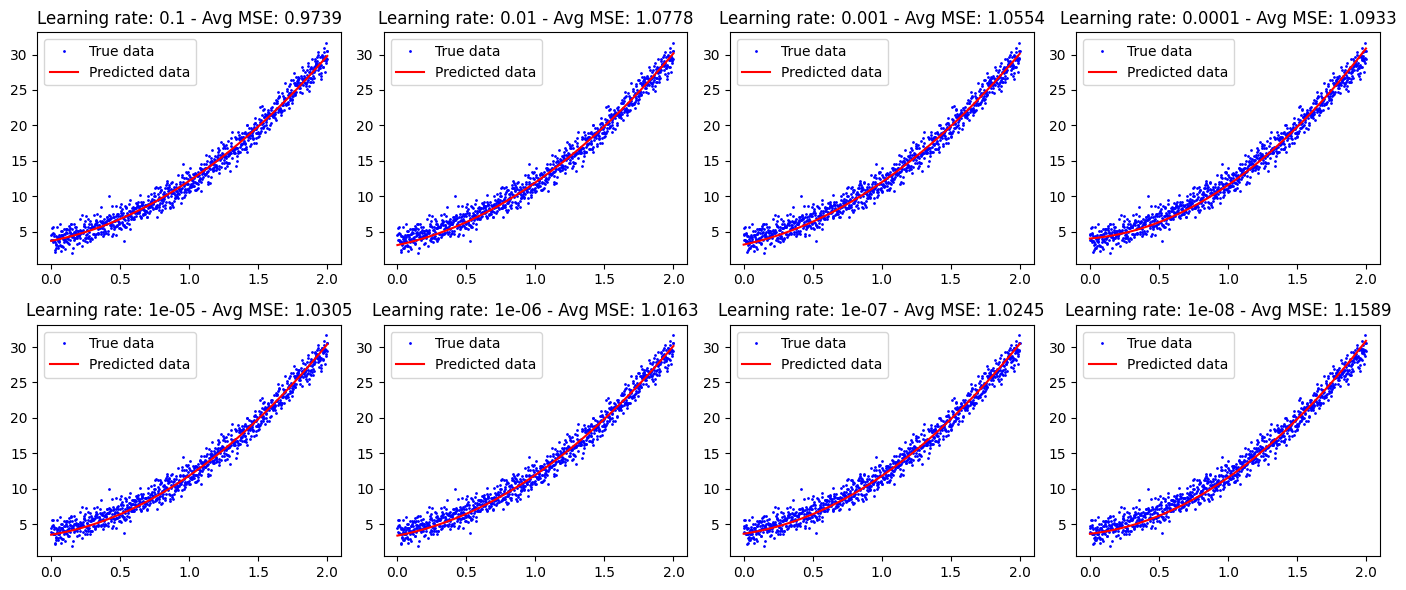

In [277]:
# analyse effect of learning rate on OLS regression 
np.random.seed(42)  # set random seed for reproducibility
learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7, 1e-8]
x_new = np.linspace(0, 2, 1000).reshape(1000,1)
y_new = f(x_new)
plt.figure(figsize=(14,6))
for i, learning_rate in enumerate(learning_rates):
    optimizer = SGDOptimizer(learning_rate=learning_rate, epochs=100)
    model = LinearRegression(optimizer=optimizer, degree=2)
    model.fit(x, y)
    y_pred = model.predict(x_new)

    # calculate the mean squared error
    mean_mse = model.analyse(x_new, y_new)

    plt.subplot(2,4,i+1)
    plt.plot(x_new, y_new, "b.", label="True data", markersize=2)
    plt.plot(x_new, y_pred, "r-", label="Predicted data")
    plt.legend()
    plt.title(f"Learning rate: {learning_rate} - Avg MSE: {mean_mse:.4f}")

plt.tight_layout()
plt.show()

OLS regression - compare convergence of plain gradient descent and SGD with a fixed epochs=300.

comments: We see that with SGD, the convergence is much faster than with GD. This is because we are updating the weights more frequently. However, the convergence is not as smooth as with GD. This is because the weights are updated more frequently and the noise in the data has a larger effect on the weights.

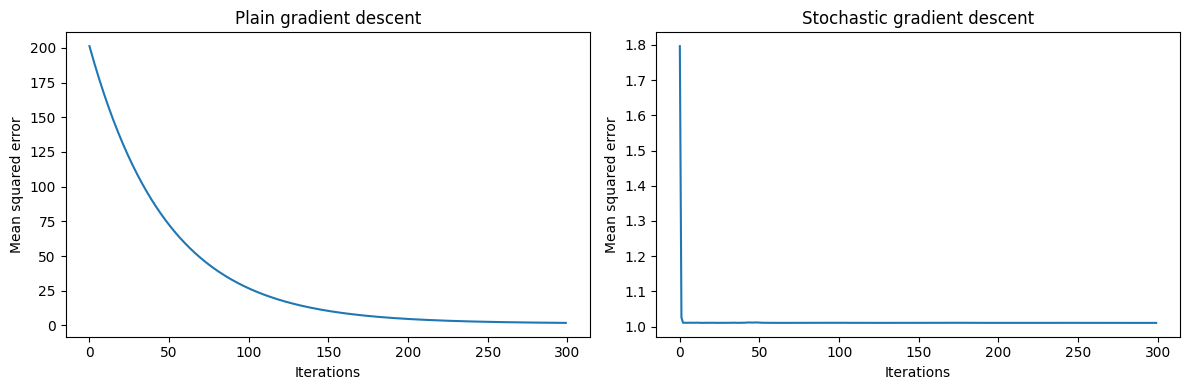

In [278]:
# compare convergence of plain gradient descent and SGD
np.random.seed(42)  # set random seed for reproducibility
learning_rate = 0.001
epochs = 300

plt.figure(figsize=(12,4))
optimizer = GradientDescentOptimizer(learning_rate=learning_rate, epochs=epochs)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
gradients, mses = model.grads, model.mses
plt.subplot(1,2,1)
plt.plot(mses, '-', markersize=2)
plt.xlabel("Iterations")
plt.ylabel("Mean squared error")
plt.title("Plain gradient descent")

# note that learning rate does not matter for SGD, since it is adaptive
optimizer = SGDOptimizer(learning_rate=learning_rate, epochs=epochs, batch_size=32, t0=1, t1=100)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
gradients, mses = model.grads, model.mses
plt.subplot(1,2,2)
plt.plot(mses, '-', markersize=2)
plt.xlabel("Iterations")
plt.ylabel("Mean squared error")
plt.title("Stochastic gradient descent")

plt.tight_layout()
plt.show()

OLS regression - vary t0/t1 ratio with a fixed epoch.

comments: We can see that the choice of t0/t1 ratio is important. If the ratio is too high, the learning rate will decrease too quickly and might even not converge at all. If the ratio is too low, then the number of epoch to converge will become similar to plain gradient descent. Hence we need to choose a t0/t1 ratio such that the learning rate decreases slowly enough to converge, but quickly enough to not oscillate.

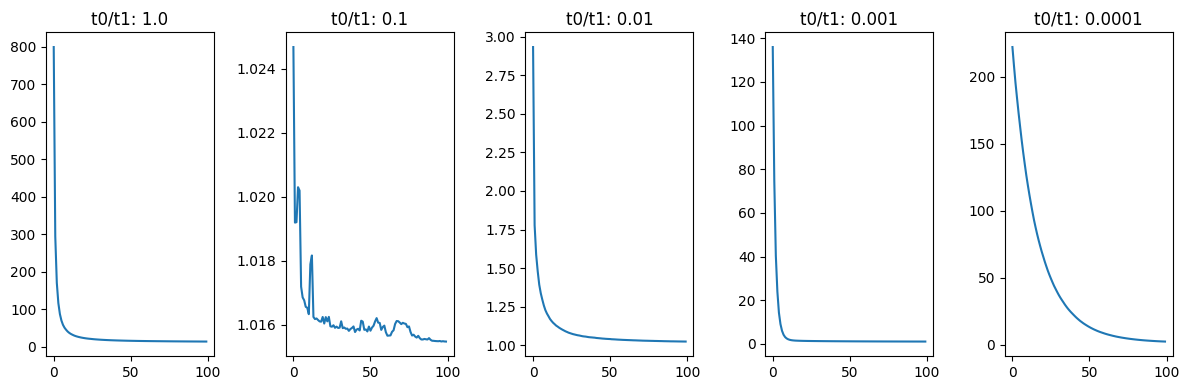

In [280]:
# compare convergence of SGD with different t0/t1 ratio
np.random.seed(42)  # set random seed for reproducibility
t1s = [1, 10, 100, 1000, 10000]
n_iterations = 100

plt.figure(figsize=(12,4))
for i, t1 in enumerate(t1s):
    optimizer = SGDOptimizer(learning_rate=0.001, epochs=n_iterations, batch_size=32, t0=1, t1=t1)
    model = LinearRegression(optimizer=optimizer, degree=2)
    model.fit(x, y)
    mses = model.mses
    plt.subplot(1,5,i+1)
    plt.plot(mses, '-', markersize=2)
    plt.title(f"t0/t1: {1/t1}")

plt.tight_layout()
plt.show()

OLS regression - compare convergence with varying batch size, with fixed epochs and t0/t1 ratio.

comments: We see that the batch size is important. If the batch size is too small, the learning rate will oscillate too much. If the batch size is too large, the learning rate will not oscillate enough. Hence we need to choose a batch size such that the learning rate oscillates enough to converge, but not too much to not converge.

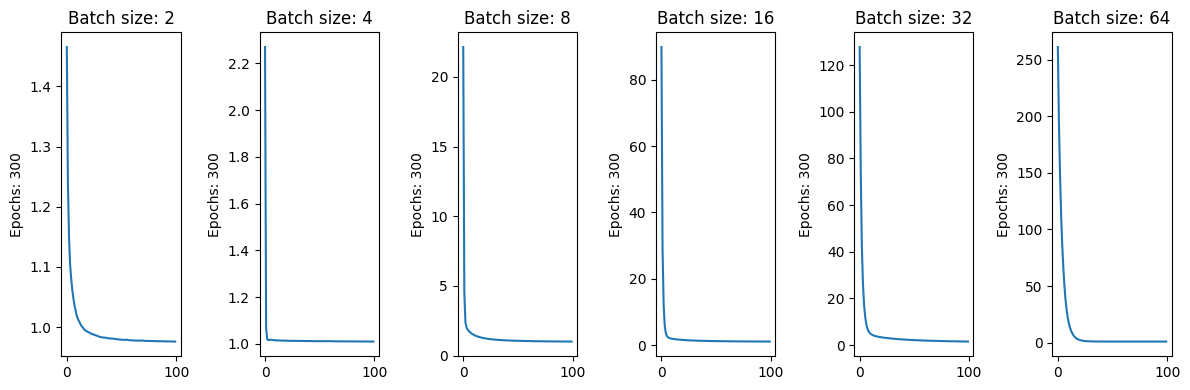

In [43]:
# compare convergence of SGD with varying batch sizes
np.random.seed(42)  # set random seed for reproducibility
batch_sizes = [2, 4, 8, 16, 32, 64]
epochs = 100

plt.figure(figsize=(12,4))
for i, batch_size in enumerate(batch_sizes):
    optimizer = SGDOptimizer(learning_rate=0.001, epochs=epochs, batch_size=batch_size)
    model = LinearRegression(optimizer=optimizer, degree=2)
    model.fit(x, y)
    mses = model.mses
    plt.subplot(1,6,i+1)
    plt.plot(mses, '-', markersize=2)
    plt.title(f"Batch size: {batch_size}")
    plt.ylabel(f"Epochs: {n_iterations}")

plt.tight_layout()
plt.show()

Ridge regression - vary lambda.

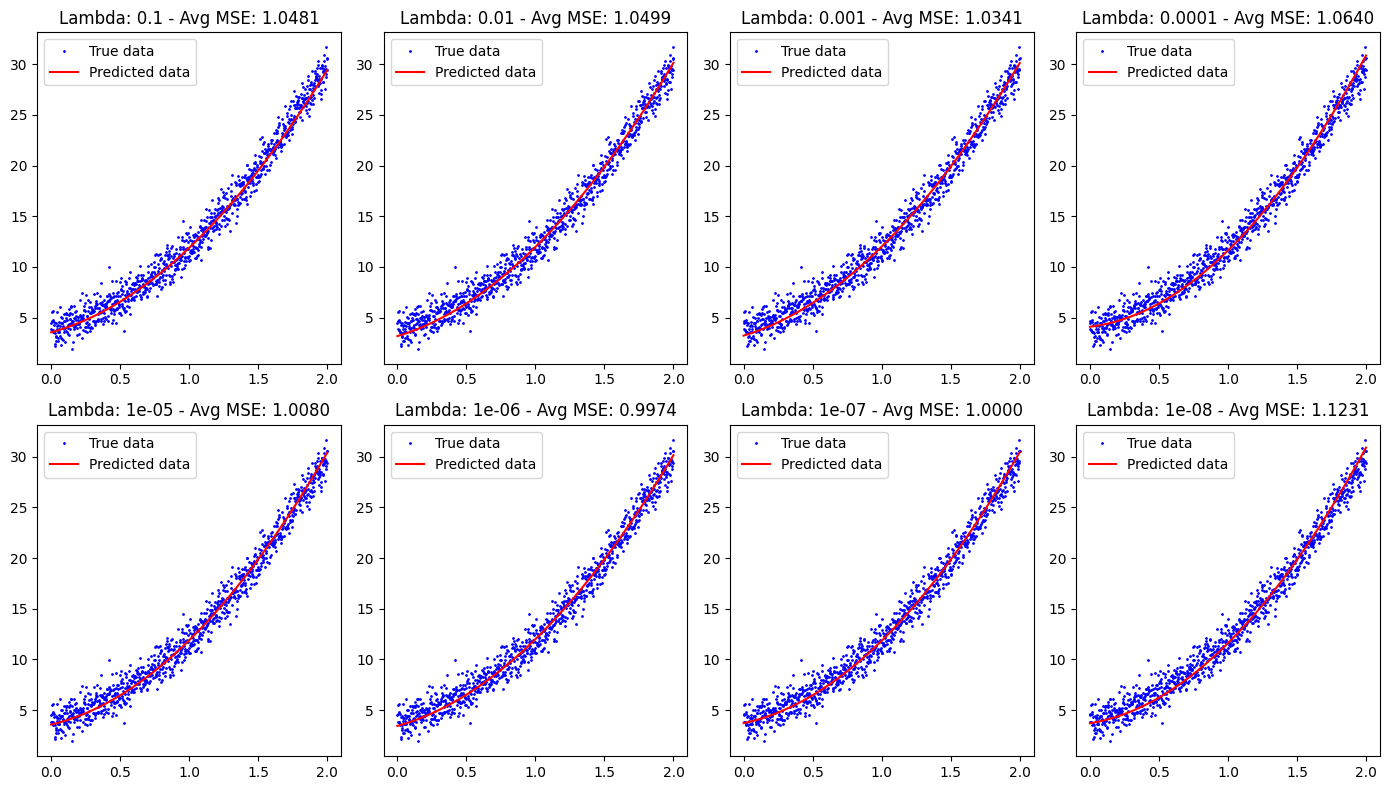

In [44]:
# analyse effect of lambda on Ridge regression with SGD
np.random.seed(42)  # set random seed for reproducibility
lambdas = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7, 1e-8]
x_new = np.linspace(0, 2, 1000).reshape(1000,1)
y_new = f(x_new)
plt.figure(figsize=(14,8))
for i, lambda_ in enumerate(lambdas):
    optimizer = SGDOptimizer(learning_rate=0.1, epochs=100)
    model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ridge", ridge_lambda=lambda_)
    model.fit(x, y)
    y_pred = model.predict(x_new)

    # calculate the mean squared error
    mean_mse = model.analyse(x_new, y_new)

    plt.subplot(2,4,i+1)
    plt.plot(x_new, y_new, "b.", label="True data", markersize=2)
    plt.plot(x_new, y_pred, "r-", label="Predicted data")
    plt.legend()
    plt.title(f"Lambda: {lambda_} - Avg MSE: {mean_mse:.4f}")

plt.tight_layout()
plt.show()

Ridge regression - compare convergence with plain gradient descent and stochastic gradient descent.

comment: we see the same result as OLS

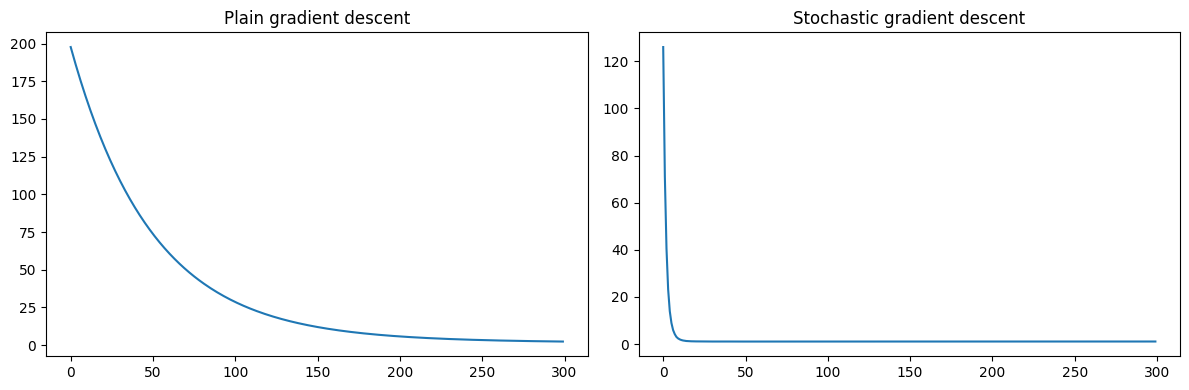

In [45]:
# compare convergence of plain gradient descent and SGD 
np.random.seed(42)  # set random seed for reproducibility
learning_rate = 0.001
n_iterations = 300

plt.figure(figsize=(12,4))
optimizer = GradientDescentOptimizer(learning_rate=learning_rate, epochs=n_iterations)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ridge", ridge_lambda=0.1)
model.fit(x, y)
mses = model.mses
plt.subplot(1,2,1)
plt.plot(mses, '-', markersize=2)
plt.title("Plain gradient descent")

optimizer = SGDOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=32)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ridge", ridge_lambda=0.1)
model.fit(x, y)
mses = model.mses
plt.subplot(1,2,2)
plt.plot(mses, '-', markersize=2)
plt.title("Stochastic gradient descent")

plt.tight_layout()
plt.show()

Ridge regression - compare convergence with OLS regression.

comment: we see that the gradient of OLS is much smoother than the gradient of Ridge. This is because the gradient of Ridge is the sum of the gradient of OLS and the gradient of the regularization term. The regularization term is the derivative of the L2 norm, which is not smooth at 0. Hence the gradient of Ridge is not smooth at 0.

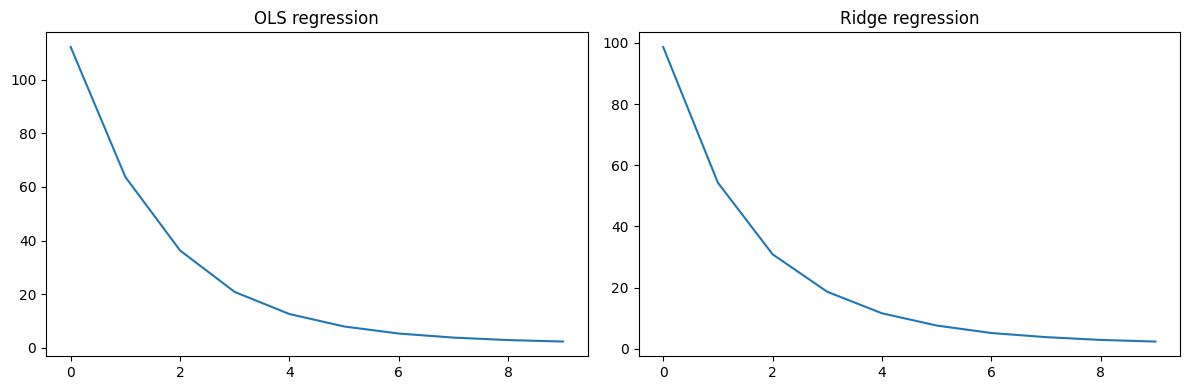

In [46]:
# compare convergence of SGD with OLS and Ridge regression
np.random.seed(42)  # set random seed for reproducibility
learning_rate = 0.001
n_iterations = 10

plt.figure(figsize=(12,4))
optimizer = SGDOptimizer(learning_rate=learning_rate, epochs=n_iterations)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
mses = model.mses
plt.subplot(1,2,1)
plt.plot(mses, '-', markersize=2)
plt.title("OLS regression")

optimizer = SGDOptimizer(learning_rate=learning_rate, epochs=n_iterations)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ridge", ridge_lambda=0.1)
model.fit(x, y)
mses = model.mses
plt.subplot(1,2,2)
plt.plot(mses, '-', markersize=2)
plt.title("Ridge regression")

plt.tight_layout()
plt.show()

##### 3.1.2 With Momentum

OLS regression - compare convergence with a fixed epochs=50, t0/t1=0.01, batch size=32.

comment: we see that the convergence is much faster with momentum than without momentum. 

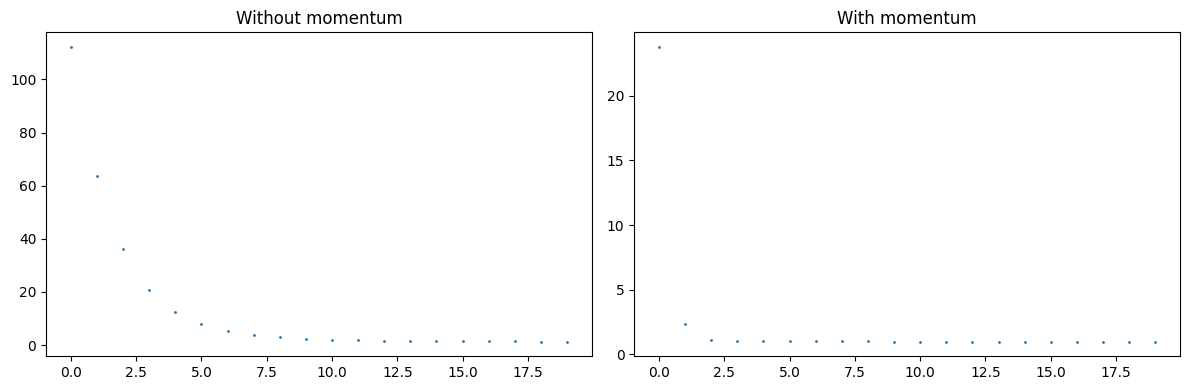

In [47]:
# compare convergence of OLS with SGD with and without momentum
np.random.seed(42)  # set random seed for reproducibility
learning_rate = 0.001
n_iterations = 20
t0 = 1
t1 = 1000
batch_size = 32

plt.figure(figsize=(12,4))
optimizer = SGDOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=batch_size, t0=t0, t1=t1, momentum=False)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
mses = model.mses
plt.subplot(1,2,1)
plt.plot(mses, '.', markersize=2)
plt.title("Without momentum")

optimizer = SGDOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=batch_size, t0=t0, t1=t1, momentum=True, momentum_delta=0.75)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
mses = model.mses
plt.subplot(1,2,2)
plt.plot(mses, '.', markersize=2)
plt.title("With momentum")

plt.tight_layout()
plt.show()

Ridge regression - compare convergence with a fixed epochs=50, t0/t1=0.01, batch size=32.

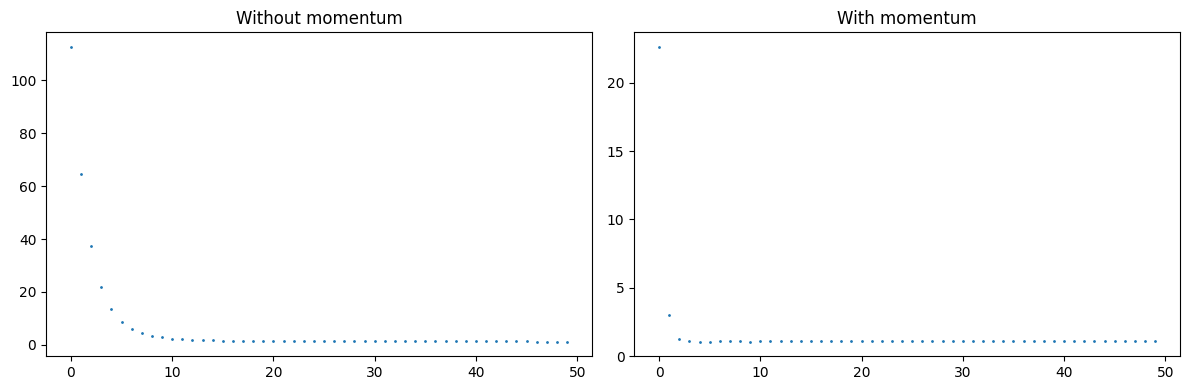

In [48]:
# compare convergence of Ridge with SGD with and without momentum
np.random.seed(42)  # set random seed for reproducibility
learning_rate = 0.001
n_iterations = 50
t0 = 1
t1 = 1000
batch_size = 32

plt.figure(figsize=(12,4))
optimizer = SGDOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=batch_size, t0=t0, t1=t1, momentum=False)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ridge", ridge_lambda=0.1)
model.fit(x, y)
mses = model.mses
plt.subplot(1,2,1)
plt.plot(mses, '.', markersize=2)
plt.title("Without momentum")

optimizer = SGDOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=batch_size, t0=t0, t1=t1, momentum=True, momentum_delta=0.75)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ridge", ridge_lambda=0.1)
model.fit(x, y)
mses = model.mses
plt.subplot(1,2,2)
plt.plot(mses, '.', markersize=2)
plt.title("With momentum")

plt.tight_layout()
plt.show()

### 4. Write own Adagrad code

I will now write my own Adagrad code.

In [237]:
class AdagradOptimizer(SGDOptimizer):
    def __init__(self, learning_rate=0.1, epochs=1000, momentum=False, batch_size=32, **kwargs):
        super().__init__(learning_rate=learning_rate, epochs=epochs, momentum=momentum, batch_size=batch_size, **kwargs)
        self.epsilon = kwargs.get("epsilon", 1e-8)

    def fit(self, model, X, y):
        n, _ = X.shape  # len of x
        m = int(n / self.batch_size)  # number of mini-batches
        model.theta = np.random.randn(X.shape[1],1)  # random initialization of the parameters
        gradients_history = np.zeros((self.epochs, X.shape[1]))  # history of the gradients
        mse_history = np.zeros(self.epochs)  # history of the mean squared errors
        change = 0.0
        
        for epoch in range(self.epochs):
            batch_gradient = np.zeros((m, X.shape[1]))  # store the gradients for each mini-batch
            self.giter = 0.0
            for i in range(m):
                random_index = self.batch_size*np.random.randint(m)
                X_mini = X[random_index:random_index+self.batch_size]
                y_mini = y[random_index:random_index+self.batch_size]

                regularization = 0 if model.reg_method == "ols" else 2*model.ridge_lambda*model.theta
                gradients = 2/self.batch_size * X_mini.T @ (X_mini @ model.theta - y_mini) + regularization

                self.giter += gradients * gradients
                self.adjusted_learning_rate = self.learning_rate / (np.sqrt(self.giter) + self.epsilon)  # Update learning rate

                if self.momentum:
                    new_change = self.adjusted_learning_rate * gradients + self.momentum_delta * change
                    model.theta -= new_change
                    change = new_change
                else:
                    model.theta -= self.adjusted_learning_rate * gradients

                # batch_gradient[i] = gradients.flatten()

            # gradients_history[epoch] = np.mean(batch_gradient, axis=0)
            mse_history[epoch] = self._mse(X, y, model)

        return gradients_history, mse_history


#### 4.1 Adagrad Analysis

##### 4.1.1 Without Momentum

OLS regression - compare convergence of plain gradient descent and plain gradient descent with Adagrad.
                 and compare convergence of SGD and SGD with Adagrad.

Converged to 0.9800 in 29 iterations
Converged to 1.0270 in 51 iterations
Converged to 0.9937 in 23 iterations
Converged to 0.9962 in 6 iterations


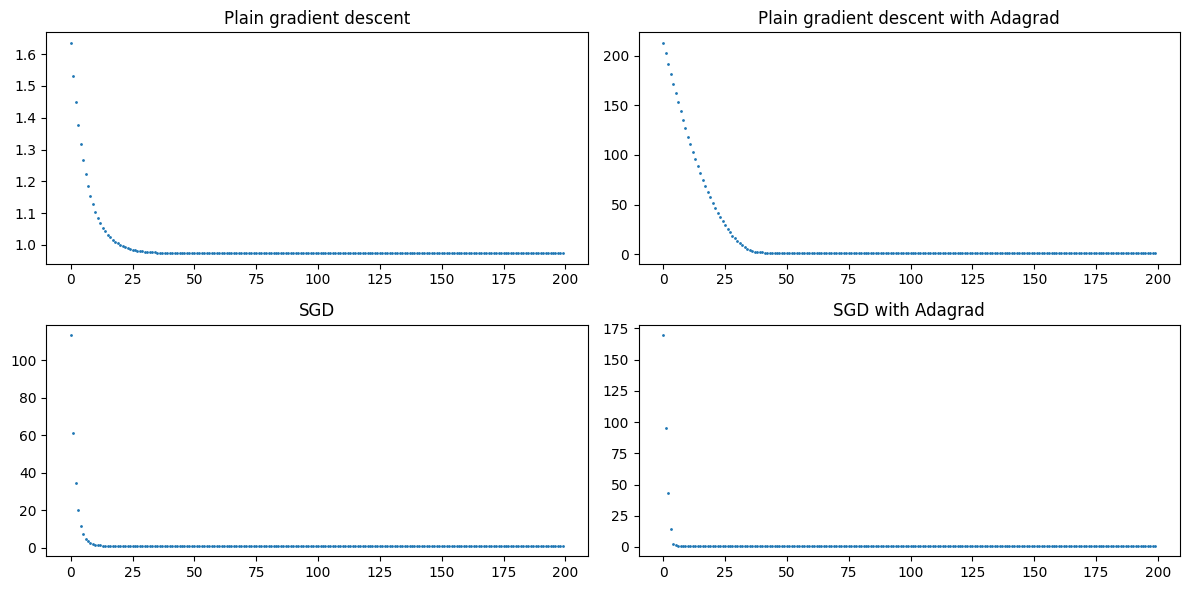

In [50]:
# compare convergence of plain gradient descent and plain gradient descent with Adagrad
# and SGD with and without Adagrad
np.random.seed(42)  # set random seed for reproducibility
learning_rate = 0.1
n_iterations = 200
n_samples = 1000

plt.figure(figsize=(12,6))
optimizer = GradientDescentOptimizer(learning_rate=learning_rate, epochs=n_iterations)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ols")
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations")
plt.subplot(2,2,1)
plt.plot(mses, '.', markersize=2)
plt.title("Plain gradient descent")

optimizer = AdagradOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=n_samples, epsilon=1e-8)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ols")
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations")
plt.subplot(2,2,2)
plt.plot(mses, '.', markersize=2)
plt.title("Plain gradient descent with Adagrad")

optimizer = SGDOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=32)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
gradients = model.grads
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations")
plt.subplot(2,2,3)
plt.plot(mses, '.', markersize=2)
plt.title("SGD")

optimizer = AdagradOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=32, epsilon=1e-8)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations")
plt.subplot(2,2,4)
plt.plot(mses, '.', markersize=2)
plt.title("SGD with Adagrad")

plt.tight_layout()
plt.show()

##### 4.1.2 With Momentum

OLS regression - compare convergence of plain gradient descent and plain gradient descent with Adagrad.
                 and compare convergence of SGD and SGD with Adagrad.

Converged to 1.1423 in 490 iterations and to 1.1377 after 500 iterations
Converged to 128.3023 in 490 iterations and to 126.7999 after 500 iterations
Converged to 0.9925 in 9 iterations and to 0.9832 after 500 iterations
Converged to 1.0842 in 395 iterations and to 1.0556 after 500 iterations


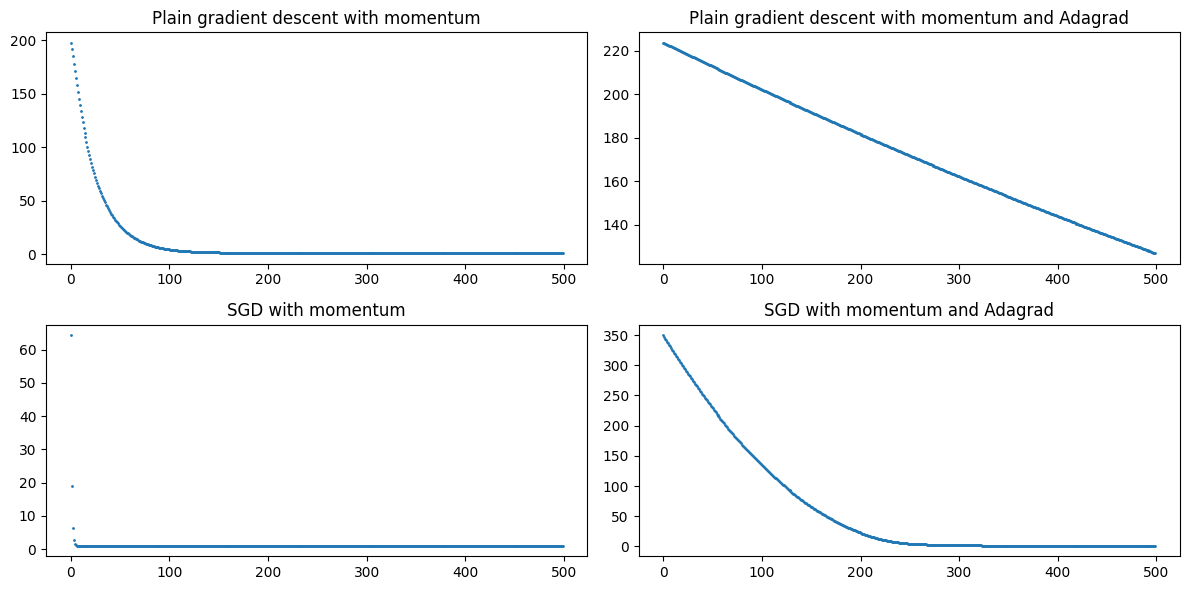

In [51]:
# compare convergence of plain gradient descent and plain gradient descent with Adagrad
# and SGD with and without Adagrad
np.random.seed(42)  # set random seed for reproducibility
learning_rate = 0.001
n_iterations = 500
n_samples = 1000
momentum_delta = 0.5

plt.figure(figsize=(12,6))
optimizer = GradientDescentOptimizer(learning_rate=learning_rate, epochs=n_iterations, momentum=True, momentum_delta=momentum_delta)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ols")
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,1)
plt.plot(mses, '.', markersize=2)
plt.title("Plain gradient descent with momentum")

optimizer = AdagradOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=n_samples, epsilon=1e-8, momentum=True, momentum_delta=momentum_delta)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ols")
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,2)
plt.plot(mses, '.', markersize=2)
plt.title("Plain gradient descent with momentum and Adagrad")

optimizer = SGDOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=32, momentum=True, momentum_delta=momentum_delta)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,3)
plt.plot(mses, '.', markersize=2)
plt.title("SGD with momentum")

optimizer = AdagradOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=32, epsilon=1e-8, momentum=True, momentum_delta=momentum_delta)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,4)
plt.plot(mses, '.', markersize=2)
plt.title("SGD with momentum and Adagrad")

plt.tight_layout()
plt.show()


### 5. Write own RMSprop code

I will now write my own RMSprop code.

In [238]:
class RMSPropOptimizer(SGDOptimizer):
    def __init__(self, learning_rate=0.1, epochs=1000, momentum=False, batch_size=32, **kwargs):
        super().__init__(learning_rate=learning_rate, epochs=epochs, momentum=momentum, batch_size=batch_size, **kwargs)
        self.rho = kwargs.get("rho", 0.9)
        self.epsilon = kwargs.get("epsilon", 1e-8)

    def fit(self, model, X, y):
        n, _ = X.shape  # len of x
        m = int(n / self.batch_size)  # number of mini-batches
        model.theta = np.random.randn(X.shape[1],1)  # random initialization of the parameters
        gradients_history = np.zeros((self.epochs, X.shape[1]))  # history of the gradients
        mse_history = np.zeros(self.epochs)  # history of the mean squared errors
        change = 0.0
        giter = 0.0
        
        for epoch in range(self.epochs):
            batch_gradient = np.zeros((m, X.shape[1]))  # store the gradients for each mini-batch
            giter = 0.0
            for i in range(m):
                random_index = self.batch_size*np.random.randint(m)
                X_mini = X[random_index:random_index+self.batch_size]
                y_mini = y[random_index:random_index+self.batch_size]

                regularization = 0 if model.reg_method == "ols" else 2*model.ridge_lambda*model.theta
                gradients = 2/self.batch_size * X_mini.T @ (X_mini @ model.theta - y_mini) + regularization

                giter = self.rho * giter + (1 - self.rho) * gradients * gradients
                self.adjusted_learning_rate = self.learning_rate / (np.sqrt(giter) + self.epsilon)  # Update learning rate

                if self.momentum:
                    new_change = self.adjusted_learning_rate * gradients + self.momentum_delta * change
                    model.theta -= new_change
                    change = new_change
                else:
                    model.theta -= self.adjusted_learning_rate * gradients

                batch_gradient[i] = gradients.flatten()

            gradients_history[epoch] = np.mean(batch_gradient, axis=0)
            mse_history[epoch] = self._mse(X, y, model)

        return gradients_history, mse_history


#### 5.1 RMSprop Analysis

##### 5.1.1 Without Momentum

OLS regression - compare convergence of plain gradient descent and plain gradient descent with RMSprop.
                 and compare convergence of SGD and SGD with RMSprop.

Converged to 1.0083 in 199 iterations and to 0.9738 after 1000 iterations
Converged to 0.9821 in 158 iterations and to 0.9768 after 1000 iterations
Converged to 0.9937 in 23 iterations and to 0.9847 after 1000 iterations
Converged to 0.9915 in 14 iterations and to 0.9780 after 1000 iterations


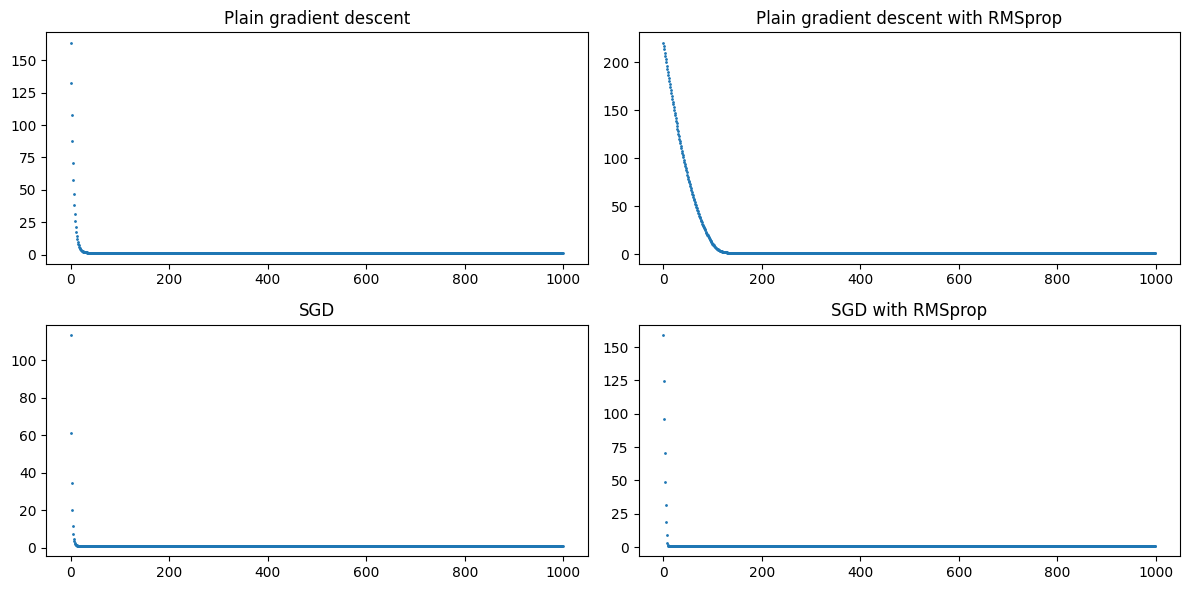

In [53]:
# compare convergence of plain gradient descent and plain gradient descent with RMSprop
# and SGD with and without RMSprop
np.random.seed(42)  # set random seed for reproducibility
learning_rate = 0.01
n_iterations = 1000
rho = 0.9

plt.figure(figsize=(12,6))
optimizer = GradientDescentOptimizer(learning_rate=learning_rate, epochs=n_iterations)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ols")
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,1)
plt.plot(mses, '.', markersize=2)
plt.title("Plain gradient descent")

optimizer = RMSPropOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=1000, epsilon=1e-8, rho=rho)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ols")
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,2)
plt.plot(mses, '.', markersize=2)
plt.title("Plain gradient descent with RMSprop")

optimizer = SGDOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=32)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,3)
plt.plot(mses, '.', markersize=2)
plt.title("SGD")

optimizer = RMSPropOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=32, epsilon=1e-8, rho=rho)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,4)
plt.plot(mses, '.', markersize=2)
plt.title("SGD with RMSprop")

plt.tight_layout()
plt.show()

##### 5.1.2 With Momentum

OLS regression - compare convergence of plain gradient descent and plain gradient descent with RMSprop.
                 and compare convergence of SGD and SGD with RMSprop.
                

Converged to 0.9921 in 118 iterations and to 0.9752 after 200 iterations
Converged to 0.9776 in 82 iterations and to 0.9797 after 200 iterations
Converged to 0.9925 in 9 iterations and to 0.9844 after 200 iterations
Converged to 0.9820 in 14 iterations and to 0.9848 after 200 iterations


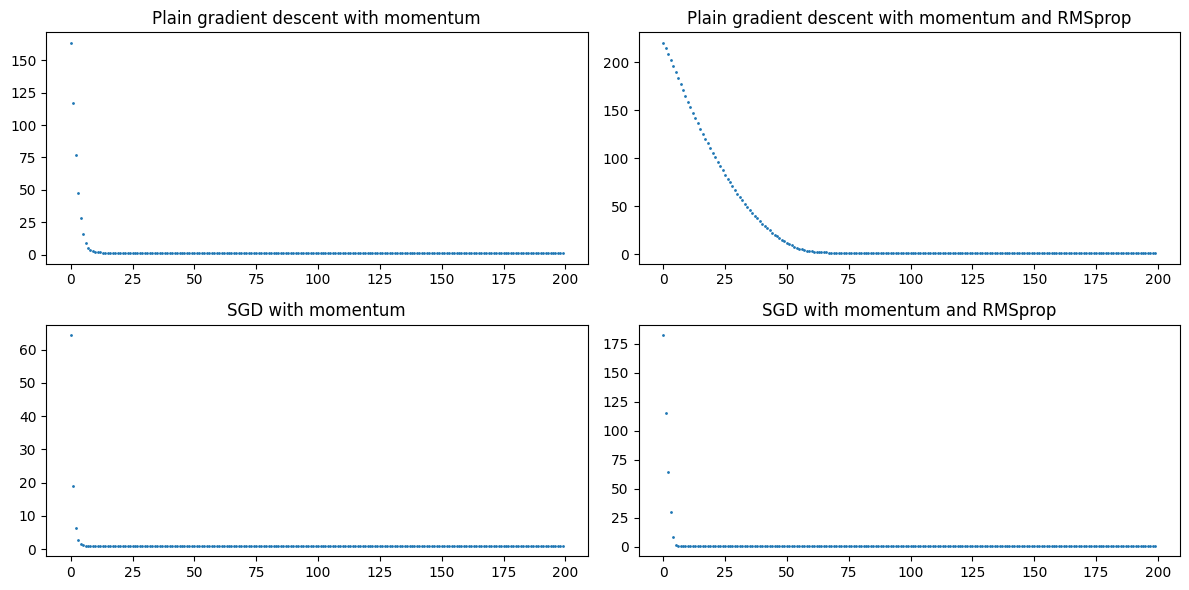

In [54]:
# compare convergence of plain gradient descent and plain gradient descent with RMSprop
# and SGD with and without RMSprop
np.random.seed(42)  # set random seed for reproducibility
learning_rate = 0.01
n_iterations = 200
rho = 0.9
momentum_delta = 0.5

plt.figure(figsize=(12,6))
optimizer = GradientDescentOptimizer(learning_rate=learning_rate, epochs=n_iterations, momentum=True, momentum_delta=momentum_delta)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ols")
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,1)
plt.plot(mses, '.', markersize=2)
plt.title("Plain gradient descent with momentum")

optimizer = RMSPropOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=1000, epsilon=1e-8, rho=rho, momentum=True, momentum_delta=momentum_delta)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ols")
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,2)
plt.plot(mses, '.', markersize=2)
plt.title("Plain gradient descent with momentum and RMSprop")

optimizer = SGDOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=32, momentum=True, momentum_delta=momentum_delta)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,3)
plt.plot(mses, '.', markersize=2)
plt.title("SGD with momentum")

optimizer = RMSPropOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=32, epsilon=1e-8, rho=rho, momentum=True, momentum_delta=momentum_delta)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,4)
plt.plot(mses, '.', markersize=2)
plt.title("SGD with momentum and RMSprop")

plt.tight_layout()
plt.show()


### 6. Write own Adam code

I will now write my own Adam code.

In [239]:
class AdamOptimizer(SGDOptimizer):
    def __init__(self, learning_rate=0.1, epochs=1000, momentum=False, batch_size=32, **kwargs):
        super().__init__(learning_rate=learning_rate, epochs=epochs, momentum=momentum, batch_size=batch_size, **kwargs)
        self.beta1 = kwargs.get("beta1", 0.9)
        self.beta2 = kwargs.get("beta2", 0.999)
        self.epsilon = kwargs.get("epsilon", 1e-8)

    def fit(self, model, X, y):
        n, _ = X.shape  # len of x
        m = int(n / self.batch_size)  # number of mini-batches
        model.theta = np.random.randn(X.shape[1],1)  # random initialization of the parameters
        gradients_history = np.zeros((self.epochs, X.shape[1]))  # history of the gradients
        mse_history = np.zeros(self.epochs)  # history of the mean squared errors
        change = 0.0
        miter = 0.0
        viter = 0.0
        
        for epoch in range(self.epochs):
            batch_gradient = np.zeros((m, X.shape[1]))  # store the gradients for each mini-batch
            miter = 0.0
            viter = 0.0
            for i in range(m):
                random_index = self.batch_size*np.random.randint(m)
                X_mini = X[random_index:random_index+self.batch_size]
                y_mini = y[random_index:random_index+self.batch_size]

                regularization = 0 if model.reg_method == "ols" else 2*model.ridge_lambda*model.theta
                gradients = 2/self.batch_size * X_mini.T @ (X_mini @ model.theta - y_mini) + regularization

                miter = self.beta1 * miter + (1 - self.beta1) * gradients
                viter = self.beta2 * viter + (1 - self.beta2) * gradients**2
                miter_hat = miter / (1 - self.beta1**(epoch*m + i + 1))
                viter_hat = viter / (1 - self.beta2**(epoch*m + i + 1))
                self.adjusted_learning_rate = self.learning_rate / (np.sqrt(viter_hat) + self.epsilon)  # Update learning rate

                if self.momentum:
                    new_change = self.adjusted_learning_rate * miter_hat + self.momentum_delta * change
                    model.theta -= new_change
                    change = new_change
                else:
                    model.theta -= self.adjusted_learning_rate * miter_hat

                batch_gradient[i] = gradients.flatten()

            gradients_history[epoch] = np.mean(batch_gradient, axis=0)
            mse_history[epoch] = self._mse(X, y, model)

        return gradients_history, mse_history


#### 6.1 Adam Analysis

##### 6.1.1 Without Momentum

OLS regression - compare convergence of plain gradient descent and plain gradient descent with Adam.
                 and compare convergence of SGD and SGD with Adam.

Converged to 1.0083 in 199 iterations and to 0.9741 after 500 iterations
Converged to 0.9822 in 394 iterations and to 0.9785 after 500 iterations
Converged to 0.9937 in 23 iterations and to 0.9852 after 500 iterations
Converged to 1.0039 in 22 iterations and to 0.9750 after 500 iterations


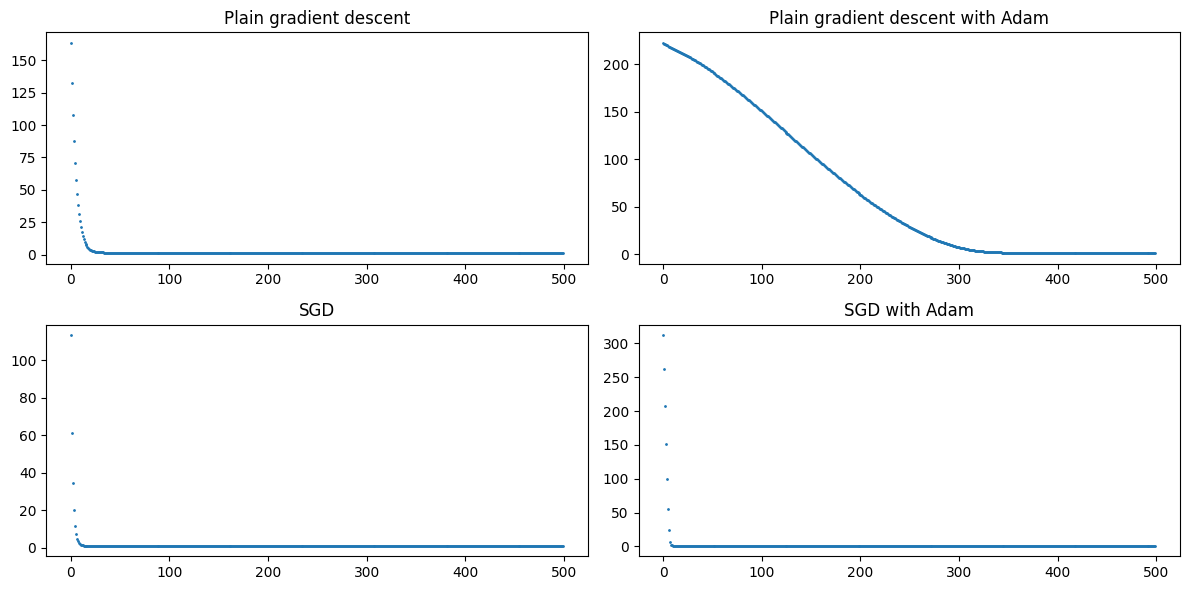

In [56]:
# compare convergence of plain gradient descent and plain gradient descent with Adam
# and SGD with and without Adam
np.random.seed(42)  # set random seed for reproducibility
learning_rate = 0.01
n_iterations = 500
beta1 = 0.9
beta2 = 0.999

plt.figure(figsize=(12,6))
optimizer = GradientDescentOptimizer(learning_rate=learning_rate, epochs=n_iterations)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ols")
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,1)
plt.plot(mses, '.', markersize=2)
plt.title("Plain gradient descent")

optimizer = AdamOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=1000, epsilon=1e-8, beta1=beta1, beta2=beta2)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ols")
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,2)
plt.plot(mses, '.', markersize=2)
plt.title("Plain gradient descent with Adam")

optimizer = SGDOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=32)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,3)
plt.plot(mses, '.', markersize=2)
plt.title("SGD")

optimizer = AdamOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=32, epsilon=1e-8, beta1=beta1, beta2=beta2)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,4)
plt.plot(mses, '.', markersize=2)
plt.title("SGD with Adam")

plt.tight_layout()
plt.show()

##### 6.1.2 With Momentum

OLS regression - compare convergence of plain gradient descent and plain gradient descent with Adam.
                 and compare convergence of SGD and SGD with Adam.

Converged to 0.9921 in 118 iterations and to 0.9738 after 500 iterations
Converged to 0.9780 in 246 iterations and to 0.9748 after 500 iterations
Converged to 0.9925 in 9 iterations and to 0.9832 after 500 iterations
Converged to 0.9814 in 28 iterations and to 1.1723 after 500 iterations


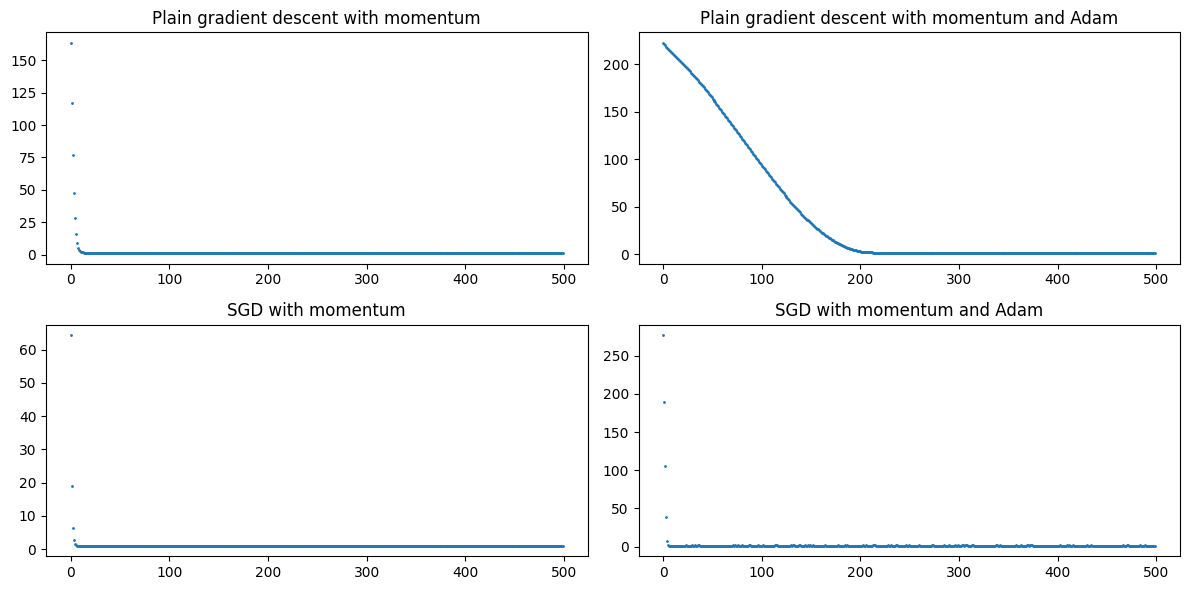

In [57]:
# compare convergence of plain gradient descent and plain gradient descent with Adam
# and SGD with and without Adam
np.random.seed(42)  # set random seed for reproducibility
learning_rate = 0.01
n_iterations = 500
beta1 = 0.9
beta2 = 0.999
momentum_delta = 0.5

plt.figure(figsize=(12,6))
optimizer = GradientDescentOptimizer(learning_rate=learning_rate, epochs=n_iterations, momentum=True, momentum_delta=momentum_delta)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ols")
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,1)
plt.plot(mses, '.', markersize=2)
plt.title("Plain gradient descent with momentum")

optimizer = AdamOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=1000, epsilon=1e-8, beta1=beta1, beta2=beta2, momentum=True, momentum_delta=momentum_delta)
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ols")
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,2)
plt.plot(mses, '.', markersize=2)
plt.title("Plain gradient descent with momentum and Adam")

optimizer = SGDOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=32, momentum=True, momentum_delta=momentum_delta)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,3)
plt.plot(mses, '.', markersize=2)
plt.title("SGD with momentum")

optimizer = AdamOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=32, epsilon=1e-8, beta1=beta1, beta2=beta2, momentum=True, momentum_delta=momentum_delta)
model = LinearRegression(optimizer=optimizer, degree=2)
model.fit(x, y)
mses = model.mses
conv_iter = model.num_to_convergence(mses)
print(f"Converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
plt.subplot(2,2,4)
plt.plot(mses, '.', markersize=2)
plt.title("SGD with momentum and Adam")

plt.tight_layout()
plt.show()

### 6. Final Comparison of all methods

I will now compare all the methods.
- Plain Gradient Descent w/o momentum
- Plain Gradient Descent w/ momentum
- Stochastic Gradient Descent w/o momentum
- Stochastic Gradient Descent w/ momentum
- Plain Gradient Descent w/ Adagrad w/o momentum
- Plain Gradient Descent w/ Adagrad w/ momentum
- Stochastic Gradient Descent w/ Adagrad w/o momentum
- Stochastic Gradient Descent w/ Adagrad w/ momentum
- Plain Gradient Descent w/ RMSprop w/o momentum
- Plain Gradient Descent w/ RMSprop w/ momentum
- Stochastic Gradient Descent w/ RMSprop w/o momentum
- Stochastic Gradient Descent w/ RMSprop w/ momentum
- Plain Gradient Descent w/ Adam w/o momentum
- Plain Gradient Descent w/ Adam w/ momentum
- Stochastic Gradient Descent w/ Adam w/o momentum
- Stochastic Gradient Descent w/ Adam w/ momentum

Plain gradient descent converged to 1.1997 in 500 iterations and to 1.0578 after 1000 iterations
Plain gradient descent with momentum converged to 0.9490 in 227 iterations and to 0.9334 after 1000 iterations
SGD converged to 0.9484 in 9 iterations and to 0.9417 after 1000 iterations
SGD with momentum converged to 0.9407 in 10 iterations and to 0.9347 after 1000 iterations
Plain gradient descent with Adagrad converged to 124.6901 in 990 iterations and to 123.9374 after 1000 iterations
Plain gradient descent with Adagrad and momentum converged to 162.1069 in 990 iterations and to 160.3874 after 1000 iterations
SGD with Adagrad converged to 0.9474 in 490 iterations and to 0.9335 after 1000 iterations
SGD with Adagrad and momentum converged to 0.9466 in 261 iterations and to 0.9335 after 1000 iterations
Plain gradient descent with RMSprop converged to 3.3410 in 990 iterations and to 3.0266 after 1000 iterations
Plain gradient descent with RMSprop and momentum converged to 0.9460 in 660 ite

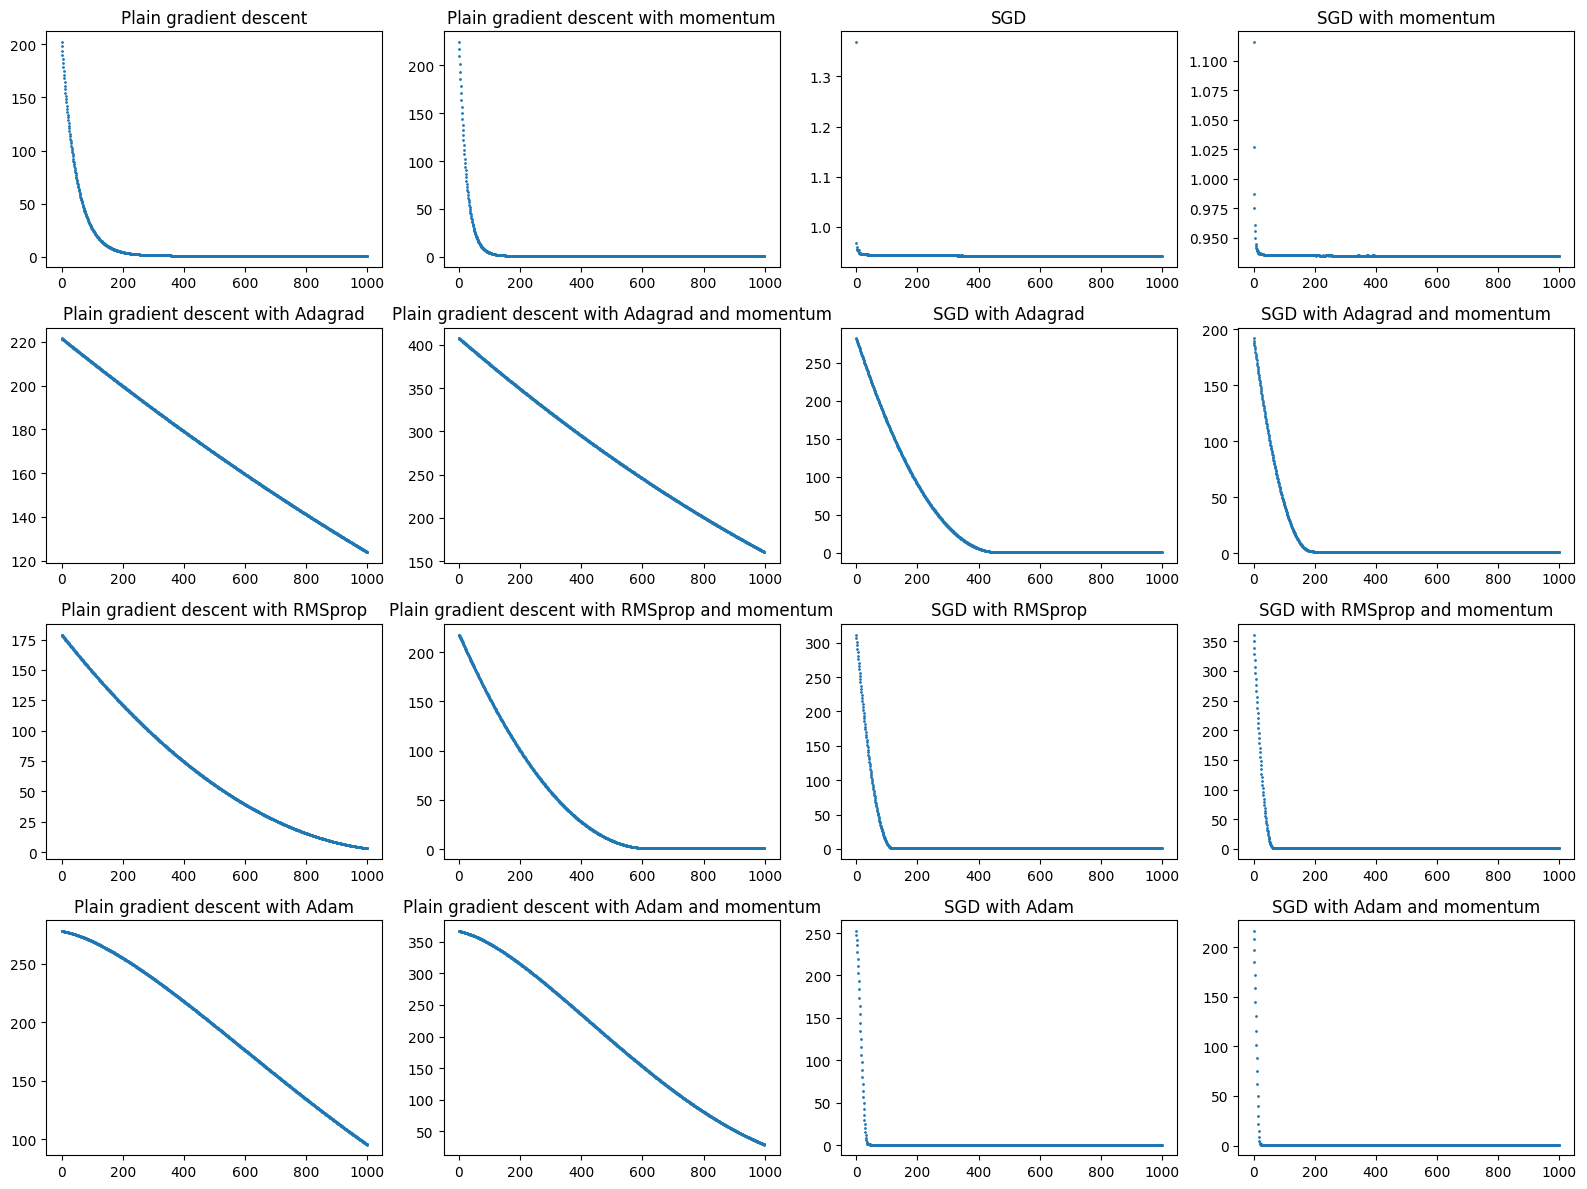

In [243]:
# compare convergence of all optimization methods
np.random.seed(42)  # set random seed for reproducibility
learning_rate = 0.001
n_iterations = 1000
n_samples = 1000
beta1 = 0.9
beta2 = 0.999
rho = 0.9
momentum_delta = 0.5
batch_size = 32

labels = [
    "Plain gradient descent",
    "Plain gradient descent with momentum",
    "SGD",
    "SGD with momentum",
    "Plain gradient descent with Adagrad",
    "Plain gradient descent with Adagrad and momentum",
    "SGD with Adagrad",
    "SGD with Adagrad and momentum",
    "Plain gradient descent with RMSprop",
    "Plain gradient descent with RMSprop and momentum",
    "SGD with RMSprop",
    "SGD with RMSprop and momentum",
    "Plain gradient descent with Adam",
    "Plain gradient descent with Adam and momentum",
    "SGD with Adam",
    "SGD with Adam and momentum"
]

optimizers = [
    GradientDescentOptimizer(learning_rate=learning_rate, epochs=n_iterations),
    GradientDescentOptimizer(learning_rate=learning_rate, epochs=n_iterations, momentum=True, momentum_delta=momentum_delta),
    SGDOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=batch_size, t0=1, t1=100),
    SGDOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=batch_size, t0=1, t1=100, momentum=True, momentum_delta=momentum_delta),
    AdagradOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=n_samples, epsilon=1e-8),
    AdagradOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=n_samples, epsilon=1e-8, momentum=True, momentum_delta=momentum_delta),
    AdagradOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=batch_size, epsilon=1e-8),
    AdagradOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=batch_size, epsilon=1e-8, momentum=True, momentum_delta=momentum_delta),
    RMSPropOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=n_samples, epsilon=1e-8, rho=rho),
    RMSPropOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=n_samples, epsilon=1e-8, rho=rho, momentum=True, momentum_delta=momentum_delta),
    RMSPropOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=batch_size, epsilon=1e-8, rho=rho),
    RMSPropOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=batch_size, epsilon=1e-8, rho=rho, momentum=True, momentum_delta=momentum_delta),
    AdamOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=n_samples, epsilon=1e-8, beta1=beta1, beta2=beta2),
    AdamOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=n_samples, epsilon=1e-8, beta1=beta1, beta2=beta2, momentum=True, momentum_delta=momentum_delta),
    AdamOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=batch_size, epsilon=1e-8, beta1=beta1, beta2=beta2),
    AdamOptimizer(learning_rate=learning_rate, epochs=n_iterations, batch_size=batch_size, epsilon=1e-8, beta1=beta1, beta2=beta2, momentum=True, momentum_delta=momentum_delta)
]

plt.figure(figsize=(16,12))

for i, optimizer in enumerate(optimizers):
    model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ols")
    model.fit(x, y)
    mses = model.mses
    conv_iter = model.num_to_convergence(mses)
    print(f"{labels[i]} converged to {mses[conv_iter]:.4f} in {conv_iter} iterations and to {mses[-1]:.4f} after {n_iterations} iterations")
    plt.subplot(4,4,i+1)
    plt.plot(mses, '.', markersize=2)
    plt.title(labels[i])

plt.tight_layout()
plt.show()

### Compare with pytorch

In [170]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
import timeit

class TorchLinearModel(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(TorchLinearModel, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x): 
        return self.linear(x)

class TorchLinearRegression:
    def __init__(
            self, 
            model,  # torch model
            loss_fn,  # torch loss function
            optimizer = None,  # torch optimizer
            degree=2
        ):
        self.model = model
        self.optimizer = optimizer
        self.loss_fn = loss_fn
        self.degree = degree

    def fit(self, x, y, epochs=1000):
        x_torch = torch.tensor(x, dtype=torch.float32)
        X = self._create_polynomial_features(x_torch)
        y = torch.tensor(y, dtype=torch.float32)

        if self.optimizer is None:
            self._fit_default(X, y, epochs)
        else:
            self.mses = []
            for epoch in range(epochs):
                self.optimizer.zero_grad()
                outputs = self.model(X)
                loss = self.loss_fn(outputs, y)
                loss.backward()
                self.optimizer.step()

                mse = loss.item()
                self.mses.append(mse)

        return self
    
    def _fit_default(self, X, y, epochs):
        self.mses = []
        for epoch in range(epochs):
            predictions = self.model(X)
            loss = self.loss_fn(predictions, y)

            self.model.zero_grad()
            loss.backward()
            with torch.no_grad():
                for param in self.model.parameters():
                    param -= learning_rate * param.grad

            mse = loss.item()
            self.mses.append(mse)

    def _create_polynomial_features(self, x):
        """Generate polynomial features up to a specified degree."""
        return torch.cat([x ** i for i in range(1, self.degree + 1)], dim=1)


Test performance epochs=1000

In [175]:
np.random.seed(42)  # set random seed for reproducibility
# generate training data
n = 1000
x, y = generate_data(n)
degree = 2
torch_model = TorchLinearModel(degree, 1)
criterion = torch.nn.MSELoss()

# set variables
EPOCHS = [1000]
lr = 0.01

for epochs in EPOCHS:
    print(f"Epochs: {epochs}")

    optimiser = None
    model = TorchLinearRegression(torch_model, criterion, optimizer=optimiser, degree=degree)
    print("torch gd")
    %timeit -r 7 -n 10 model.fit(x, y, epochs=epochs)

    optimizer = GradientDescentOptimizer(learning_rate=lr, epochs=epochs)
    model = LinearRegression(optimizer=optimizer, degree=degree)
    print("own ols gd")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimizer = GradientDescentOptimizer(learning_rate=lr, epochs=epochs)
    model = LinearRegression(optimizer=optimizer, degree=degree, reg_method="ridge", ridge_lambda=0.1)
    print("own ridge gd")
    %timeit -r 7 -n 10 model.fit(x, y)
    
    optimizer = torch.optim.SGD(torch_model.parameters(), lr=lr)
    model = TorchLinearRegression(torch_model, criterion, optimizer=optimizer, degree=degree)
    print("torch sgd")
    %timeit -r 7 -n 10 model.fit(x, y, epochs=epochs)

    optimiser = SGDOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree)
    print("own ols sgd")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimiser = SGDOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree, reg_method="ridge", ridge_lambda=0.1)
    print("own ridge sgd")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimiser = torch.optim.Adagrad(torch_model.parameters(), lr=lr)
    model = TorchLinearRegression(torch_model, criterion, optimizer=optimizer, degree=degree)
    print("torch adagrad")
    %timeit -r 7 -n 10 model.fit(x, y, epochs=epochs)

    optimiser = AdagradOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree)
    print("own ols adagrad")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimiser = AdagradOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree, reg_method="ridge", ridge_lambda=0.1)
    print("own ridge adagrad")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimiser = torch.optim.RMSprop(torch_model.parameters(), lr=lr)
    model = TorchLinearRegression(torch_model, criterion, optimizer=optimizer, degree=degree)
    print("torch rmsprop")
    %timeit -r 7 -n 10 model.fit(x, y, epochs=epochs)

    optimiser = RMSPropOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree)
    print("own ols rmsprop")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimiser = RMSPropOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree, reg_method="ridge", ridge_lambda=0.1)
    print("own ridge rmsprop")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimizer = torch.optim.Adam(torch_model.parameters(), lr=lr)
    model = TorchLinearRegression(torch_model, criterion, optimizer=optimizer, degree=degree)
    print("torch adam")
    %timeit -r 7 -n 10 model.fit(x, y, epochs=epochs)

    optimiser = AdamOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree)
    print("own ols adam")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimiser = AdamOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree, reg_method="ridge", ridge_lambda=0.1)
    print("own ridge adam")
    %timeit -r 7 -n 10 model.fit(x, y) 


Epochs: 1000
torch gd
183 ms ± 16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ols gd
25.4 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ridge gd
24.7 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
torch sgd
237 ms ± 5.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ols sgd
418 ms ± 16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ridge sgd
439 ms ± 5.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
torch adagrad
248 ms ± 9.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ols adagrad
457 ms ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ridge adagrad
446 ms ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
torch rmsprop
228 ms ± 6.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ols rmsprop
590 ms ± 8.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ridge rmsprop
547 ms ± 25 ms per loop (mean ± std. dev. of 7 runs, 10

Test performance epochs=5000

In [176]:
np.random.seed(42)  # set random seed for reproducibility
# generate training data
n = 1000
x, y = generate_data(n)
degree = 2
torch_model = TorchLinearModel(degree, 1)
criterion = torch.nn.MSELoss()

# set variables
EPOCHS = [5000]
lr = 0.01

for epochs in EPOCHS:
    print(f"Epochs: {epochs}")

    optimiser = None
    model = TorchLinearRegression(torch_model, criterion, optimizer=optimiser, degree=degree)
    print("torch gd")
    %timeit -r 7 -n 10 model.fit(x, y, epochs=epochs)

    optimizer = GradientDescentOptimizer(learning_rate=lr, epochs=epochs)
    model = LinearRegression(optimizer=optimizer, degree=degree)
    print("own ols gd")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimizer = GradientDescentOptimizer(learning_rate=lr, epochs=epochs)
    model = LinearRegression(optimizer=optimizer, degree=degree, reg_method="ridge", ridge_lambda=0.1)
    print("own ridge gd")
    %timeit -r 7 -n 10 model.fit(x, y)
    
    optimizer = torch.optim.SGD(torch_model.parameters(), lr=lr)
    model = TorchLinearRegression(torch_model, criterion, optimizer=optimizer, degree=degree)
    print("torch sgd")
    %timeit -r 7 -n 10 model.fit(x, y, epochs=epochs)

    optimiser = SGDOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree)
    print("own ols sgd")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimiser = SGDOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree, reg_method="ridge", ridge_lambda=0.1)
    print("own ridge sgd")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimiser = torch.optim.Adagrad(torch_model.parameters(), lr=lr)
    model = TorchLinearRegression(torch_model, criterion, optimizer=optimizer, degree=degree)
    print("torch adagrad")
    %timeit -r 7 -n 10 model.fit(x, y, epochs=epochs)

    optimiser = AdagradOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree)
    print("own ols adagrad")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimiser = AdagradOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree, reg_method="ridge", ridge_lambda=0.1)
    print("own ridge adagrad")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimiser = torch.optim.RMSprop(torch_model.parameters(), lr=lr)
    model = TorchLinearRegression(torch_model, criterion, optimizer=optimizer, degree=degree)
    print("torch rmsprop")
    %timeit -r 7 -n 10 model.fit(x, y, epochs=epochs)

    optimiser = RMSPropOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree)
    print("own ols rmsprop")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimiser = RMSPropOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree, reg_method="ridge", ridge_lambda=0.1)
    print("own ridge rmsprop")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimizer = torch.optim.Adam(torch_model.parameters(), lr=lr)
    model = TorchLinearRegression(torch_model, criterion, optimizer=optimizer, degree=degree)
    print("torch adam")
    %timeit -r 7 -n 10 model.fit(x, y, epochs=epochs)

    optimiser = AdamOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree)
    print("own ols adam")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimiser = AdamOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree, reg_method="ridge", ridge_lambda=0.1)
    print("own ridge adam")
    %timeit -r 7 -n 10 model.fit(x, y) 


Epochs: 5000
torch gd
898 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ols gd
123 ms ± 6.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ridge gd
122 ms ± 9.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
torch sgd
1.78 s ± 1.04 s per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ols sgd
2.02 s ± 31.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ridge sgd
1.95 s ± 102 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
torch adagrad
1.14 s ± 54.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ols adagrad
2.07 s ± 36.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ridge adagrad
2.14 s ± 61.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
torch rmsprop
1.18 s ± 56.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ols rmsprop
2.75 s ± 74.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ridge rmsprop
2.84 s ± 64.9 ms per loop (mean ± std. dev. of 7 runs, 1

Test performance over varying degrees

In [181]:
np.random.seed(42)  # set random seed for reproducibility
# generate training data
n = 1000
x, y = generate_data(n)
torch_model = TorchLinearModel(degree, 1)
criterion = torch.nn.MSELoss()

# set variables
epochs = 1000
degrees = [3, 4, 5]
lr = 0.01

for degree in degrees:
    print(f"Degree: {degree}")
    torch_model = TorchLinearModel(degree, 1)

    optimiser = None
    model = TorchLinearRegression(torch_model, criterion, optimizer=optimiser, degree=degree)
    print("torch gd")
    %timeit -r 7 -n 10 model.fit(x, y, epochs=epochs)

    optimizer = GradientDescentOptimizer(learning_rate=lr, epochs=epochs)
    model = LinearRegression(optimizer=optimizer, degree=degree)
    print("own ols gd")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimizer = GradientDescentOptimizer(learning_rate=lr, epochs=epochs)
    model = LinearRegression(optimizer=optimizer, degree=degree, reg_method="ridge", ridge_lambda=0.1)
    print("own ridge gd")
    %timeit -r 7 -n 10 model.fit(x, y)
    
    optimizer = torch.optim.SGD(torch_model.parameters(), lr=lr)
    model = TorchLinearRegression(torch_model, criterion, optimizer=optimizer, degree=degree)
    print("torch sgd")
    %timeit -r 7 -n 10 model.fit(x, y, epochs=epochs)

    optimiser = SGDOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree)
    print("own ols sgd")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimiser = SGDOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree, reg_method="ridge", ridge_lambda=0.1)
    print("own ridge sgd")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimiser = torch.optim.Adagrad(torch_model.parameters(), lr=lr)
    model = TorchLinearRegression(torch_model, criterion, optimizer=optimizer, degree=degree)
    print("torch adagrad")
    %timeit -r 7 -n 10 model.fit(x, y, epochs=epochs)

    optimiser = AdagradOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree)
    print("own ols adagrad")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimiser = AdagradOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree, reg_method="ridge", ridge_lambda=0.1)
    print("own ridge adagrad")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimiser = torch.optim.RMSprop(torch_model.parameters(), lr=lr)
    model = TorchLinearRegression(torch_model, criterion, optimizer=optimizer, degree=degree)
    print("torch rmsprop")
    %timeit -r 7 -n 10 model.fit(x, y, epochs=epochs)

    optimiser = RMSPropOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree)
    print("own ols rmsprop")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimiser = RMSPropOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree, reg_method="ridge", ridge_lambda=0.1)
    print("own ridge rmsprop")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimizer = torch.optim.Adam(torch_model.parameters(), lr=lr)
    model = TorchLinearRegression(torch_model, criterion, optimizer=optimizer, degree=degree)
    print("torch adam")
    %timeit -r 7 -n 10 model.fit(x, y, epochs=epochs)

    optimiser = AdamOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree)
    print("own ols adam")
    %timeit -r 7 -n 10 model.fit(x, y)

    optimiser = AdamOptimizer(learning_rate=lr, epochs=epochs, batch_size=32)
    model = LinearRegression(optimizer=optimiser, degree=degree, reg_method="ridge", ridge_lambda=0.1)
    print("own ridge adam")
    %timeit -r 7 -n 10 model.fit(x, y) 

Degree: 3
torch gd
185 ms ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ols gd
24.4 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ridge gd
28.2 ms ± 2.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
torch sgd
242 ms ± 8.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ols sgd
413 ms ± 10.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ridge sgd
416 ms ± 6.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
torch adagrad
241 ms ± 4.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ols adagrad
460 ms ± 8.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ridge adagrad
448 ms ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
torch rmsprop
238 ms ± 4.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ols rmsprop
547 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ridge rmsprop
566 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs

c:\GithubProjects\FYS-STK-4155-UiO\.venv\lib\site-packages\numpy\_core\_methods.py:136: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Oscar\AppData\Local\Temp\ipykernel_7632\260954636.py:201: RuntimeWarning: overflow encountered in square
  return np.mean((X @ model.theta - y)**2)


30.2 ms ± 2.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ridge gd
30.2 ms ± 1.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
torch sgd
249 ms ± 11.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ols sgd
422 ms ± 15.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ridge sgd
419 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
torch adagrad
235 ms ± 5.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ols adagrad
451 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ridge adagrad
461 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
torch rmsprop
245 ms ± 7.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ols rmsprop
578 ms ± 15.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own ridge rmsprop
606 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
torch adam
400 ms ± 15.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
own o

---

### Part b): Writing your own Neural Network code

Your aim now, and this is the central part of this project, is to
write your own Feed Forward Neural Network  code implementing the back
propagation algorithm discussed in the lecture slides from [week 41](https://compphysics.github.io/MachineLearning/doc/pub/week41/ipynb/week41.ipynb) and
[week 42](https://compphysics.github.io/MachineLearning/doc/pub/week42/ipynb/week42.ipynb).

We will focus on a regression problem first and study either the simple second-order polynomial from part a) or the 
Franke function or terrain data (or both or other data sets) from
project 1.

Discuss again your choice of cost function.

Write an FFNN code for regression with a flexible number of hidden
layers and nodes using the Sigmoid function as activation function for
the hidden layers. Initialize the weights using a normal
distribution. How would you initialize the biases? And which
activation function would you select for the final output layer?

Train your network and compare the results with those from your OLS and Ridge Regression codes from project 1 if you use the Franke function or the terrain data.
You should test your results against a similar code using **Scikit-Learn** (see the examples in the above lecture notes from weeks 41 and 42) or **tensorflow/keras** or **Pytorch** (for Pytorch, see Raschka et al.'s text chapters 12 and 13). 

Comment your results and give a critical discussion of the results
obtained with the Linear  Regression code and your own Neural Network
code.  
Make an analysis of the regularization parameters and the learning rates employed to find the optimal MSE and $R2$ scores.

A useful reference on the back progagation algorithm is Nielsen's book at <http://neuralnetworksanddeeplearning.com/>. It is an excellent
read.

---

### 7. Write own Neural Network code

In [248]:
# define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def ReLU(z):
    return np.where(z > 0, z, 0)

def ReLU_der(z):
    return np.where(z > 0, 1, 0)

def leaky_ReLU(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_ReLU_der(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def mse(predict, target):
    return np.mean((predict - target)**2)

def mse_derivative(predict, target):
    return 2 * (predict - target) / len(predict)

In [249]:
# Neural network class
# using batch input
class NeuralNetwork:
    def __init__(
            self,
            network_input_size,  # Number of input features
            layer_output_sizes,  # List of layer sizes
            activation_functions,  # List of activation functions
            activation_derivatives,  # List of activation function derivatives
            cost_function,  # Cost function
            cost_derivative,  # Cost function derivative
            optimizer,  # Optimizer
            debug=False  # Debug mode
    ):
        self.network_input_size = network_input_size
        self.layer_output_sizes = layer_output_sizes
        self.activation_functions = activation_functions
        self.activation_derivatives = activation_derivatives
        self.cost_function = cost_function
        self.cost_derivative = cost_derivative
        self.debug = debug
        self.layers = self._create_layers()

        self.optimizer = optimizer
        self.optimizer.initialize_velocity(self.layers)

    def _create_layers(self):
        layers = []

        i_size = self.network_input_size
        for layer_size in self.layer_output_sizes:
            W = np.random.randn(i_size, layer_size)
            b = np.random.randn(layer_size)
            layers.append((W, b))

            i_size = layer_size

        return layers
    
    def _forward(self, X):
        layer_inputs = []
        zs = []
        a = X
        for (W, b), activation_func in zip(self.layers, self.activation_functions):
            layer_inputs.append(a)  
            z = a @ W + b
            a = activation_func(z)
            zs.append(z)  

        return layer_inputs, zs, a
    
    def predict(self, X):
        if len(X.shape) == 1:
            a = np.reshape(X, (1, -1))
        else:
            a = X

        _, _, y_pred = self._forward(a)
        return y_pred
    
    def _cost(self, X, targets):
        y_pred = self.predict(X)
        return self.cost_function(y_pred, targets)
    
    def _backward(self, X, targets):
        layer_inputs, zs, y_pred = self._forward(X)
        layer_gradients = [() for layer in self.layers]  # store the gradients for each layer

        # loop over the layers backward
        for i in reversed(range(len(self.layers))):
            layer_input, z, activation_deriv = layer_inputs[i], zs[i], self.activation_derivatives[i]
            if i == len(self.layers) - 1:
                # output layer
                delta = self.cost_derivative(y_pred, targets) * activation_deriv(z)

            else:
                # hidden layer
                W, b = self.layers[i+1]
                delta = (delta @ W.T) * activation_deriv(z)

            dW = layer_input.T @ delta
            db = np.mean(delta, axis=0)
            layer_gradients[i] = (dW, db)

        return layer_gradients

    def fit(self, X, y, epochs=1000, return_accuracy=False, **kwargs):
        if return_accuracy:
            self.return_accuracy = return_accuracy
        return self.optimizer.update(self, X, y, epochs)
    
    def _accuracy(self, y_true, y_pred):
        """Accuracy score used for classification tasks"""
        return np.sum(y_true == y_pred) / len(y_true)
    
    def num_to_convergence(self, mses, threshold=0.01):
        """Given a list of mse values, return the number of iterations to convergence
            The model converges when the difference between 10 consecutive mse values is less than the threshold
        
            Args:
                mses: list of mean squared errors
                threshold: threshold for the variance of the mean squared error

            Returns:
                number of iterations to convergence
        """
        i = 0
        while True:
            if i >= len(mses)-10:
                return i
            if np.abs(mses[i] - mses[i+10]) < threshold:
                return i
            i += 1

class NNBasicOptimizer:
    def __init__(self, learning_rate=0.01, momentum=False, **kwargs):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.momentum_delta = kwargs.get("momentum_delta", 0.9)
        self.velocity_W = []  # store the velocity for each layer
        self.velocity_b = []  # store the velocity for each layer
    
    def initialize_velocity(self, layers):
        for W, b in layers:
            self.velocity_W.append(np.zeros_like(W))
            self.velocity_b.append(np.zeros_like(b))

    def update(self, model, X, y, epochs):
        losses = []
        for epoch in range(epochs):
            gradients = model._backward(X, y)
            
            # update the weights
            self._update_weights(model.layers, gradients)

            if model.debug and epoch % 100 == 0:
                loss = model._cost(X, y)
                print(f"Epoch {epoch}: loss = {loss}")
            losses.append(model._cost(X, y))

        return losses

    def _update_weights(self, layers, gradients):
        for layer_idx, ((W, b), (dW, db)) in enumerate(zip(layers, gradients)):
            if self.momentum:
                new_velocity_W = self.momentum_delta * self.velocity_W[layer_idx] - self.learning_rate * dW
                new_velocity_b = self.momentum_delta * self.velocity_b[layer_idx] - self.learning_rate * db
                new_W = W + new_velocity_W
                new_b = b + new_velocity_b
                self.velocity_W[layer_idx] = new_velocity_W
                self.velocity_b[layer_idx] = new_velocity_b
            else:
                new_W = W - self.learning_rate * dW
                new_b = b - self.learning_rate * db

            layers[layer_idx] = (new_W, new_b)
    
class NNSGDOptimizer(NNBasicOptimizer):
    def __init__(self, learning_rate=0.01, momentum=False, batch_size=32, **kwargs):
        super().__init__(learning_rate=learning_rate, momentum=momentum, **kwargs)
        self.batch_size = batch_size
        self.t0 = kwargs.get("t0", 1)
        self.t1 = kwargs.get("t1", 100)

    def _lr_scheduler(self, t):
        return self.t0 / (t + self.t1)
    
    def update(self, model, X, y, epochs):
        n, _ = X.shape
        losses = []
        m = int(n / self.batch_size)

        # loop over the epochs
        for epoch in range(epochs):
            batch_losses = []
            
            # loop over the mini-batches
            for i in range(m):
                random_index = self.batch_size*np.random.randint(m)
                X_mini = X[random_index:random_index+self.batch_size]
                y_mini = y[random_index:random_index+self.batch_size]

                gradients = model._backward(X_mini, y_mini)

                # update the weights
                self._update_weights(model.layers, gradients, epoch=epoch, m=m)

                batch_losses.append(model._cost(X_mini, y_mini))

            if model.debug and epoch % 100 == 0:
                loss = model._cost(X, y)
                print(f"Epoch {epoch}: loss = {loss}")
            losses.append(np.mean(batch_losses))

        return losses
    
    def _update_weights(self, layers, gradients, **kwargs):
        epoch = kwargs.get("epoch", 0)
        m = kwargs.get("m", 1)
        self.learning_rate = self._lr_scheduler(epoch*m + i)  # update the learning rate
        return super()._update_weights(layers, gradients)

class NNAdagradOptimizer(NNSGDOptimizer):
    def __init__(self, learning_rate=0.01, epsilon=1e-8, momentum=False, batch_size=32, **kwargs):
        super().__init__(learning_rate=learning_rate, momentum=momentum, batch_size=batch_size, **kwargs)
        self.epsilon = epsilon
        self.giter_W = []  # store the squared gradients for each layer
        self.giter_b = []  # store the squared gradients for each layer

    def initialize_velocity(self, layers):
        for W, b in layers:
            self.velocity_W.append(np.zeros_like(W))
            self.velocity_b.append(np.zeros_like(b))
            self.giter_W.append(np.zeros_like(W))
            self.giter_b.append(np.zeros_like(b))

    def _update_weights(self, layers, gradients, **kwargs):
        for layer_idx, ((W, b), (dW, db)) in enumerate(zip(layers, gradients)):
            self.giter_W[layer_idx] += dW**2
            self.giter_b[layer_idx] += db**2

            if self.momentum:
                new_velocity_W = self.momentum_delta * self.velocity_W[layer_idx] + self.learning_rate * dW / (np.sqrt(self.giter_W[layer_idx]) + self.epsilon)
                new_velocity_b = self.momentum_delta * self.velocity_b[layer_idx] + self.learning_rate * db / (np.sqrt(self.giter_b[layer_idx]) + self.epsilon)
                new_W = W - new_velocity_W
                new_b = b - new_velocity_b
                self.velocity_W[layer_idx] = new_velocity_W
                self.velocity_b[layer_idx] = new_velocity_b
            else:
                new_W = W - self.learning_rate * dW / (np.sqrt(self.giter_W[layer_idx]) + self.epsilon)
                new_b = b - self.learning_rate * db / (np.sqrt(self.giter_b[layer_idx]) + self.epsilon)

            layers[layer_idx] = (new_W, new_b)

class NNRMSpropOptimizer(NNSGDOptimizer):
    def __init__(self, learning_rate=0.01, rho=0.9, epsilon=1e-8, momentum=False, batch_size=32, **kwargs):
        super().__init__(learning_rate=learning_rate, momentum=momentum, batch_size=batch_size, **kwargs)
        self.rho = rho
        self.epsilon = epsilon
        self.giter_W = []  # store the squared gradients for each layer
        self.giter_b = []  # store the squared gradients for each layer

    def initialize_velocity(self, layers):
        for W, b in layers:
            self.velocity_W.append(np.zeros_like(W))
            self.velocity_b.append(np.zeros_like(b))
            self.giter_W.append(np.zeros_like(W))
            self.giter_b.append(np.zeros_like(b))

    def _update_weights(self, layers, gradients, **kwargs):
        for layer_idx, ((W, b), (dW, db)) in enumerate(zip(layers, gradients)):
            self.giter_W[layer_idx] = self.rho * self.giter_W[layer_idx] + (1 - self.rho) * dW**2
            self.giter_b[layer_idx] = self.rho * self.giter_b[layer_idx] + (1 - self.rho) * db**2

            if self.momentum:
                new_velocity_W = self.momentum_delta * self.velocity_W[layer_idx] + self.learning_rate * dW / (np.sqrt(self.giter_W[layer_idx]) + self.epsilon)
                new_velocity_b = self.momentum_delta * self.velocity_b[layer_idx] + self.learning_rate * db / (np.sqrt(self.giter_b[layer_idx]) + self.epsilon)
                new_W = W - new_velocity_W
                new_b = b - new_velocity_b
                self.velocity_W[layer_idx] = new_velocity_W
                self.velocity_b[layer_idx] = new_velocity_b
            else:
                new_W = W - self.learning_rate * dW / (np.sqrt(self.giter_W[layer_idx]) + self.epsilon)
                new_b = b - self.learning_rate * db / (np.sqrt(self.giter_b[layer_idx]) + self.epsilon)

            layers[layer_idx] = (new_W, new_b)

class NNAdamOptimizer(NNSGDOptimizer):
    def __init__(self, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, momentum=False, batch_size=32, **kwargs):
        super().__init__(learning_rate=learning_rate, momentum=momentum, batch_size=batch_size, **kwargs)
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.miter_W = []  # store the first moment for each layer
        self.miter_b = []  # store the first moment for each layer
        self.viter_W = []  # store the second moment for each layer
        self.viter_b = []  # store the second moment for each layer

    def initialize_velocity(self, layers):
        for W, b in layers:
            self.velocity_W.append(np.zeros_like(W))
            self.velocity_b.append(np.zeros_like(b))
            self.miter_W.append(np.zeros_like(W))
            self.miter_b.append(np.zeros_like(b))
            self.viter_W.append(np.zeros_like(W))
            self.viter_b.append(np.zeros_like(b))

    def _update_weights(self, layers, gradients, **kwargs):
        epoch = kwargs.get("epoch", 0)
        m = kwargs.get("m", 1)
        for layer_idx, ((W, b), (dW, db)) in enumerate(zip(layers, gradients)):
            self.miter_W[layer_idx] = self.beta1 * self.miter_W[layer_idx] + (1 - self.beta1) * dW
            self.miter_b[layer_idx] = self.beta1 * self.miter_b[layer_idx] + (1 - self.beta1) * db
            self.viter_W[layer_idx] = self.beta2 * self.viter_W[layer_idx] + (1 - self.beta2) * dW**2
            self.viter_b[layer_idx] = self.beta2 * self.viter_b[layer_idx] + (1 - self.beta2) * db**2
            miter_W_hat = self.miter_W[layer_idx] / (1 - self.beta1**(epoch*m + i + 1))
            miter_b_hat = self.miter_b[layer_idx] / (1 - self.beta1**(epoch*m + i + 1))
            viter_W_hat = self.viter_W[layer_idx] / (1 - self.beta2**(epoch*m + i + 1))
            viter_b_hat = self.viter_b[layer_idx] / (1 - self.beta2**(epoch*m + i + 1))

            if self.momentum:
                new_velocity_W = self.momentum_delta * self.velocity_W[layer_idx] + self.learning_rate * miter_W_hat / (np.sqrt(viter_W_hat) + self.epsilon)
                new_velocity_b = self.momentum_delta * self.velocity_b[layer_idx] + self.learning_rate * miter_b_hat / (np.sqrt(viter_b_hat) + self.epsilon)
                new_W = W - new_velocity_W
                new_b = b - new_velocity_b
                self.velocity_W[layer_idx] = new_velocity_W
                self.velocity_b[layer_idx] = new_velocity_b
            else:
                new_W = W - self.learning_rate * miter_W_hat / (np.sqrt(viter_W_hat) + self.epsilon)
                new_b = b - self.learning_rate * miter_b_hat / (np.sqrt(viter_b_hat) + self.epsilon)

            layers[layer_idx] = (new_W, new_b)

Plain Gradient Descent w/o momentum

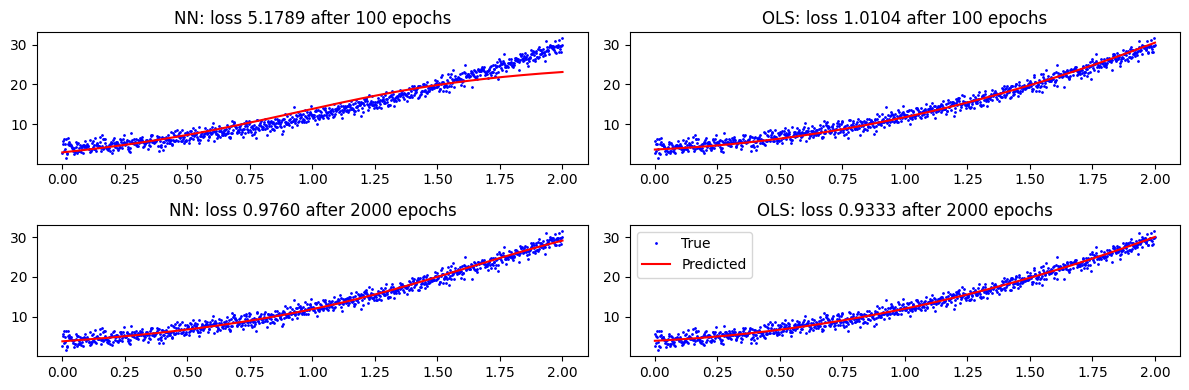

In [247]:
# test the neural network
np.random.seed(42)  # set random seed for reproducibility
network_input_size = 1
layer_output_sizes = [32, 32, 1]
activation_functions = [sigmoid, sigmoid, leaky_ReLU]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, leaky_ReLU_der]
cost_function = mse
cost_derivative = mse_derivative
optimizer = NNBasicOptimizer(learning_rate=0.01)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# generate some data
x_new = np.linspace(0, 2, 1000).reshape(1000, 1)
y_new = f(x_new)

# compare NN with OLS regression using Basic Gradient Descent at 500 epochs
EPOCHS = 100

# NN
plt.figure(figsize=(12,4))
losses = nn.fit(x, y, epochs=EPOCHS)
mse_score = nn._cost(x, y)
plt.subplot(2,2,1)
plt.plot(x_new, y_new, 'b.', label="True", markersize=2)
plt.plot(x_new, nn.predict(x_new), 'r-', label="Predicted")
plt.title(f"NN: loss {mse_score:.4f} after {EPOCHS} epochs")

# OLS regression
optimizer = GradientDescentOptimizer(learning_rate=0.01, epochs=EPOCHS, reg_method="ols")
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ols")
model.fit(x, y)
mse_score = mse(model.predict(x), y)
plt.subplot(2,2,2)
plt.plot(x_new, y_new, 'b.', label="True", markersize=2)
plt.plot(x_new, model.predict(x_new), 'r-', label="Predicted")
plt.title(f"OLS: loss {mse_score:.4f} after {EPOCHS} epochs")

EPOCHS = 2000

# NN
losses = nn.fit(x, y, epochs=EPOCHS)
mse_score = nn._cost(x, y)
plt.subplot(2,2,3)
plt.plot(x_new, y_new, 'b.', label="True", markersize=2)
plt.plot(x_new, nn.predict(x_new), 'r-', label="Predicted")
plt.title(f"NN: loss {mse_score:.4f} after {EPOCHS} epochs")

# OLS regression
optimizer = GradientDescentOptimizer(learning_rate=0.01, n_iterations=EPOCHS, reg_method="ols")
model = LinearRegression(optimizer=optimizer, degree=2, reg_method="ols")
model.fit(x, y)
mse_score = mse(model.predict(x), y)
plt.subplot(2,2,4)
plt.plot(x_new, y_new, 'b.', label="True", markersize=2)
plt.plot(x_new, model.predict(x_new), 'r-', label="Predicted")
plt.title(f"OLS: loss {mse_score:.4f} after {EPOCHS} epochs")

plt.tight_layout()
plt.legend()
plt.show()

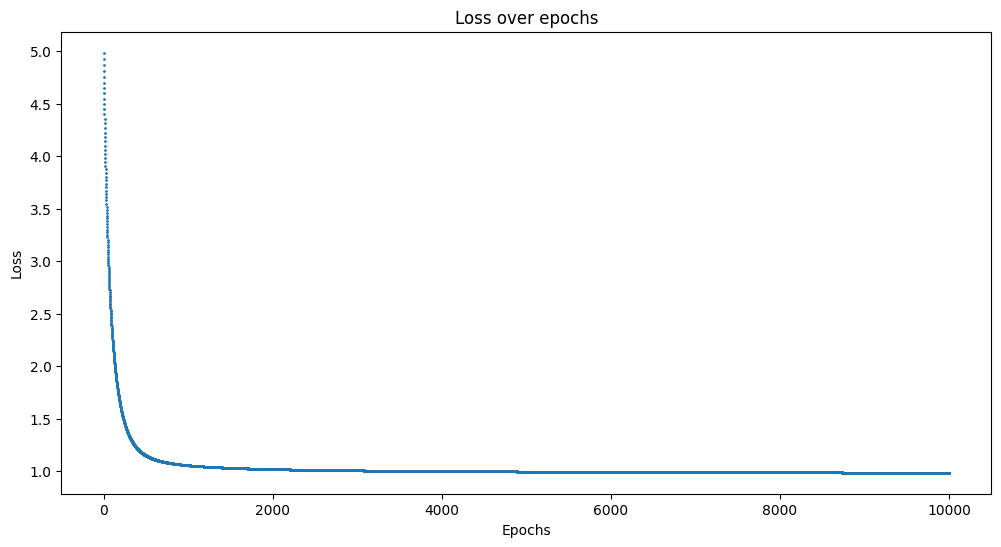

In [62]:
# plot the loss
plt.figure(figsize=(12,6))
plt.plot(losses, '.', markersize=2)
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Plain Gradient Descent w/ momentum

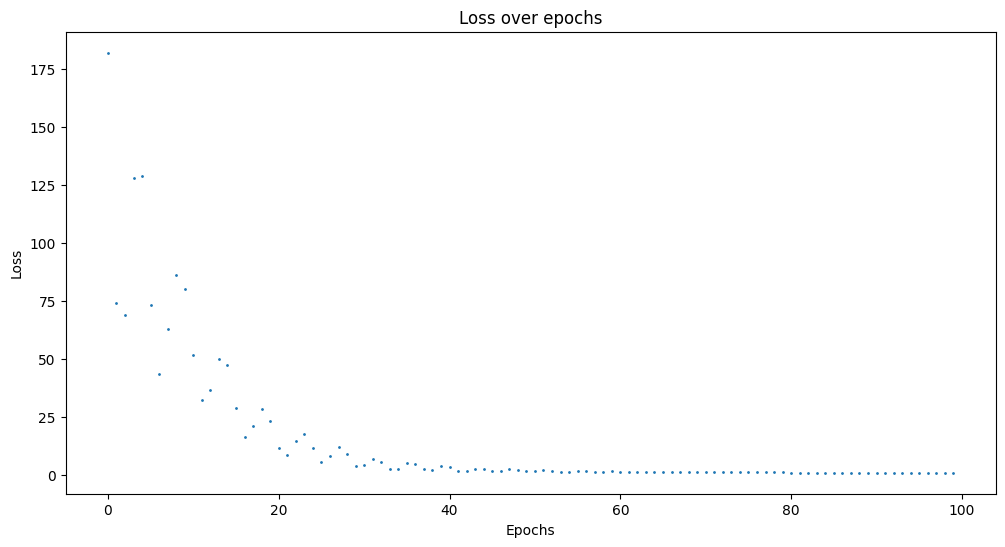

In [63]:
# test the neural network
np.random.seed(42)  # set random seed for reproducibility
network_input_size = 1
layer_output_sizes = [32, 32, 1]
activation_functions = [sigmoid, sigmoid, leaky_ReLU]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, leaky_ReLU_der]
cost_function = mse
cost_derivative = mse_derivative
optimizer = NNBasicOptimizer(learning_rate=0.01, momentum=True)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model
EPOCHS = 100
losses = nn.fit(x, y, epochs=EPOCHS)

# plot the loss
plt.figure(figsize=(12,6))
plt.plot(losses, '.', markersize=2)
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

SGD w/ momentum and w/o momentum

Converged to 1.7650 in 42 iterations and to 1.3588 after 100 iterations
Converged to 1.0010 in 36 iterations and to 1.0054 after 100 iterations


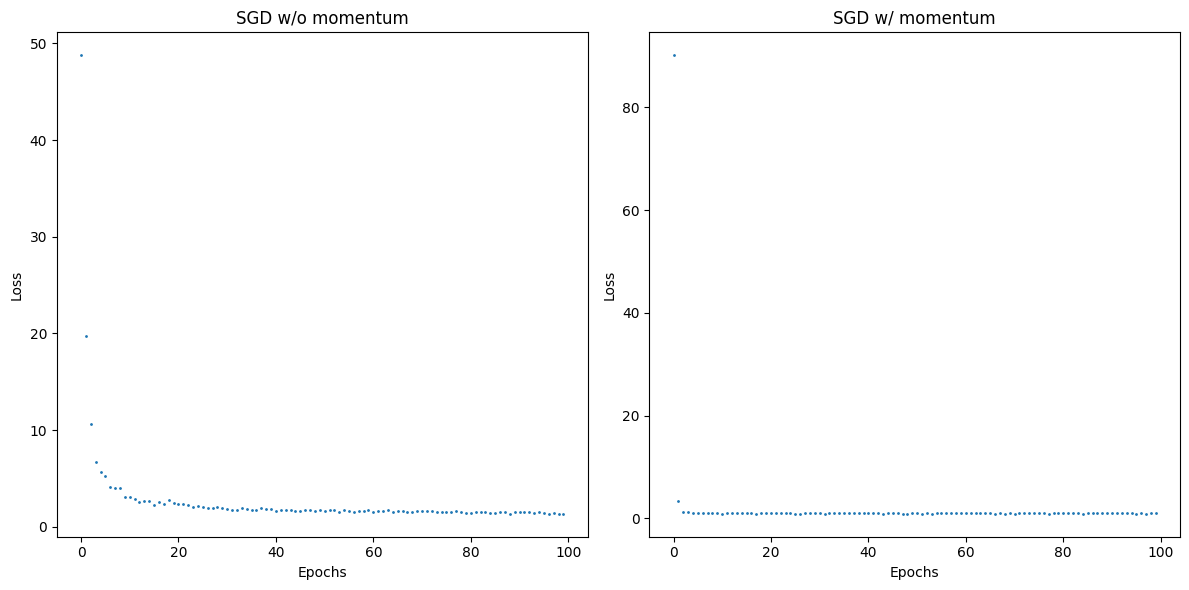

In [64]:
# test the neural network
np.random.seed(42)  # set random seed for reproducibility
network_input_size = 1
layer_output_sizes = [32, 32, 1]
activation_functions = [sigmoid, sigmoid, leaky_ReLU]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, leaky_ReLU_der]
cost_function = mse
cost_derivative = mse_derivative
EPOCHS = 100

# without momentum
optimizer = NNSGDOptimizer(learning_rate=0.01, momentum=False)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model
losses = nn.fit(x, y, epochs=EPOCHS)
conv_iter = nn.num_to_convergence(losses)
print(f"Converged to {losses[conv_iter]:.4f} in {conv_iter} iterations and to {losses[-1]:.4f} after {EPOCHS} iterations")

# plot the loss
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(losses, '.', markersize=2)
plt.title("SGD w/o momentum")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# with momentum
optimizer = NNSGDOptimizer(learning_rate=0.01, momentum=True)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model
losses = nn.fit(x, y, epochs=EPOCHS)
conv_iter = nn.num_to_convergence(losses)
print(f"Converged to {losses[conv_iter]:.4f} in {conv_iter} iterations and to {losses[-1]:.4f} after {EPOCHS} iterations")

# plot the loss
plt.subplot(1,2,2)
plt.plot(losses, '.', markersize=2)
plt.title("SGD w/ momentum")
plt.xlabel("Epochs")
plt.ylabel("Loss")


plt.tight_layout()
plt.show()

Plain Gradient Descent w/ Adagrad w/o momentum and w/ momentum

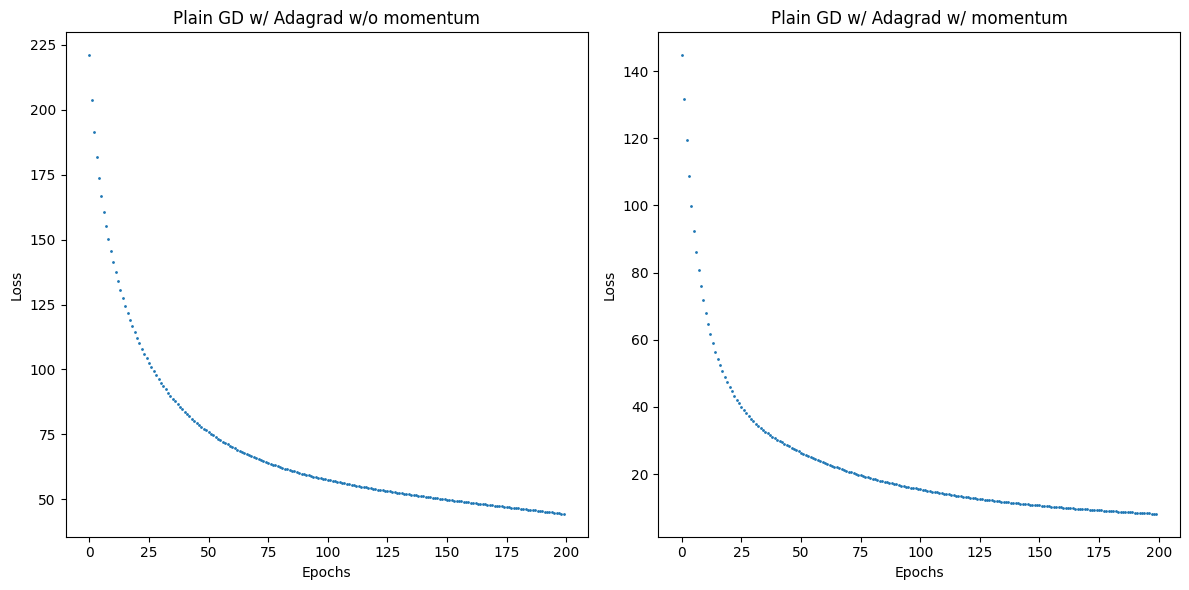

In [65]:
# test the neural network
np.random.seed(42)  # set random seed for reproducibility
network_input_size = 1
layer_output_sizes = [32, 32, 1]
activation_functions = [sigmoid, sigmoid, leaky_ReLU]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, leaky_ReLU_der]
cost_function = mse
cost_derivative = mse_derivative
EPOCHS = 200

# without momentum
optimizer = NNAdagradOptimizer(learning_rate=0.01, batch_size=1000, momentum=False)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model

losses = nn.fit(x, y, epochs=EPOCHS)

# plot the loss
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(losses, '.', markersize=2)
plt.title("Plain GD w/ Adagrad w/o momentum")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# with momentum
optimizer = NNAdagradOptimizer(learning_rate=0.01, batch_size=1000, momentum=True, momentum_delta=0.6)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model
losses = nn.fit(x, y, epochs=EPOCHS)

# plot the loss
plt.subplot(1,2,2)
plt.plot(losses, '.', markersize=2)
plt.title("Plain GD w/ Adagrad w/ momentum")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

SGD w/ Adagrad w/o momentum and w/ momentum

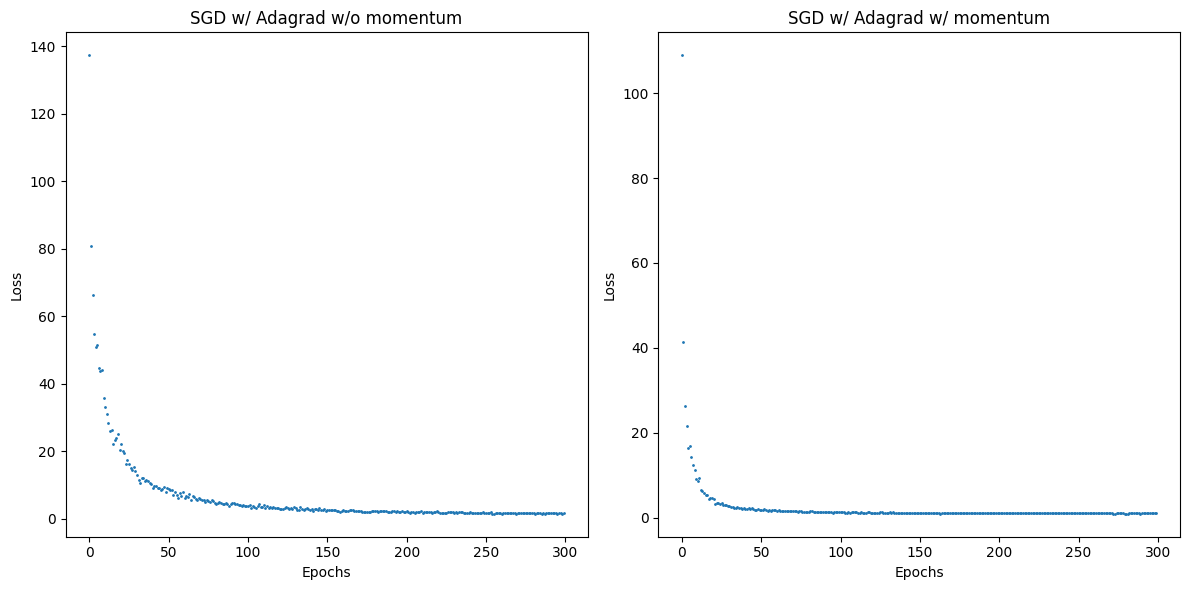

In [66]:
# test the neural network
np.random.seed(42)  # set random seed for reproducibility
network_input_size = 1
layer_output_sizes = [32, 32, 1]
activation_functions = [sigmoid, sigmoid, leaky_ReLU]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, leaky_ReLU_der]
cost_function = mse
cost_derivative = mse_derivative
EPOCHS = 300

# without momentum
optimizer = NNAdagradOptimizer(learning_rate=0.01, momentum=False, batch_size=32)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model

losses = nn.fit(x, y, epochs=EPOCHS)

# plot the loss
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(losses, '.', markersize=2)
plt.title("SGD w/ Adagrad w/o momentum")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# with momentum
optimizer = NNAdagradOptimizer(learning_rate=0.01, momentum=True, momentum_delta=0.6, batch_size=32)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model
losses = nn.fit(x, y, epochs=EPOCHS)

# plot the loss
plt.subplot(1,2,2)
plt.plot(losses, '.', markersize=2)
plt.title("SGD w/ Adagrad w/ momentum")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

Plain Gradient Descent w/ RMSprop w/o momentum and w/ momentum

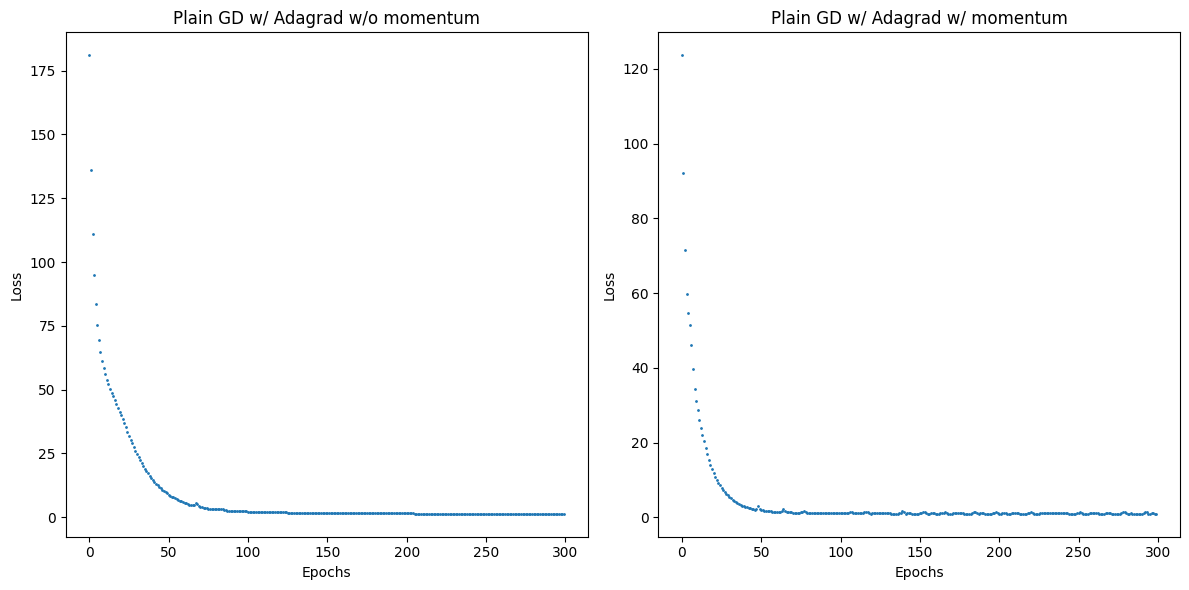

In [67]:
# test the neural network
np.random.seed(42)  # set random seed for reproducibility
network_input_size = 1
layer_output_sizes = [32, 32, 1]
activation_functions = [sigmoid, sigmoid, leaky_ReLU]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, leaky_ReLU_der]
cost_function = mse
cost_derivative = mse_derivative
n_samples = 1000
EPOCHS = 300

# without momentum
optimizer = NNRMSpropOptimizer(learning_rate=0.01, batch_size=n_samples, momentum=False)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model

losses = nn.fit(x, y, epochs=EPOCHS)

# plot the loss
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(losses, '.', markersize=2)
plt.title("Plain GD w/ Adagrad w/o momentum")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# with momentum
optimizer = NNRMSpropOptimizer(learning_rate=0.01, batch_size=n_samples, momentum=True, momentum_delta=0.6)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model
losses = nn.fit(x, y, epochs=EPOCHS)

# plot the loss
plt.subplot(1,2,2)
plt.plot(losses, '.', markersize=2)
plt.title("Plain GD w/ Adagrad w/ momentum")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

SGD w/ RMSprop w/o momentum and w/ momentum

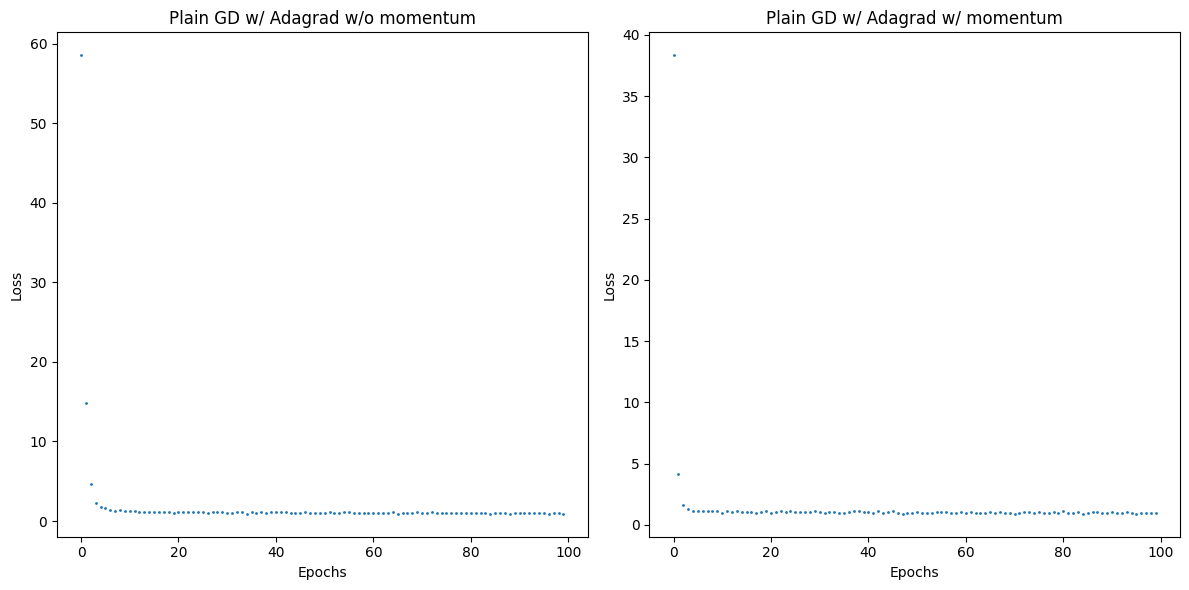

In [68]:
# test the neural network
np.random.seed(42)  # set random seed for reproducibility
network_input_size = 1
layer_output_sizes = [32, 32, 1]
activation_functions = [sigmoid, sigmoid, leaky_ReLU]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, leaky_ReLU_der]
cost_function = mse
cost_derivative = mse_derivative
EPOCHS = 100

# without momentum
optimizer = NNRMSpropOptimizer(learning_rate=0.01, momentum=False)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model

losses = nn.fit(x, y, epochs=EPOCHS)

# plot the loss
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(losses, '.', markersize=2)
plt.title("Plain GD w/ Adagrad w/o momentum")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# with momentum
optimizer = NNRMSpropOptimizer(learning_rate=0.01, momentum=True, momentum_delta=0.6)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model
losses = nn.fit(x, y, epochs=EPOCHS)

# plot the loss
plt.subplot(1,2,2)
plt.plot(losses, '.', markersize=2)
plt.title("Plain GD w/ Adagrad w/ momentum")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

Plain Gradient Descent w/ Adam w/o momentum and w/ momentum

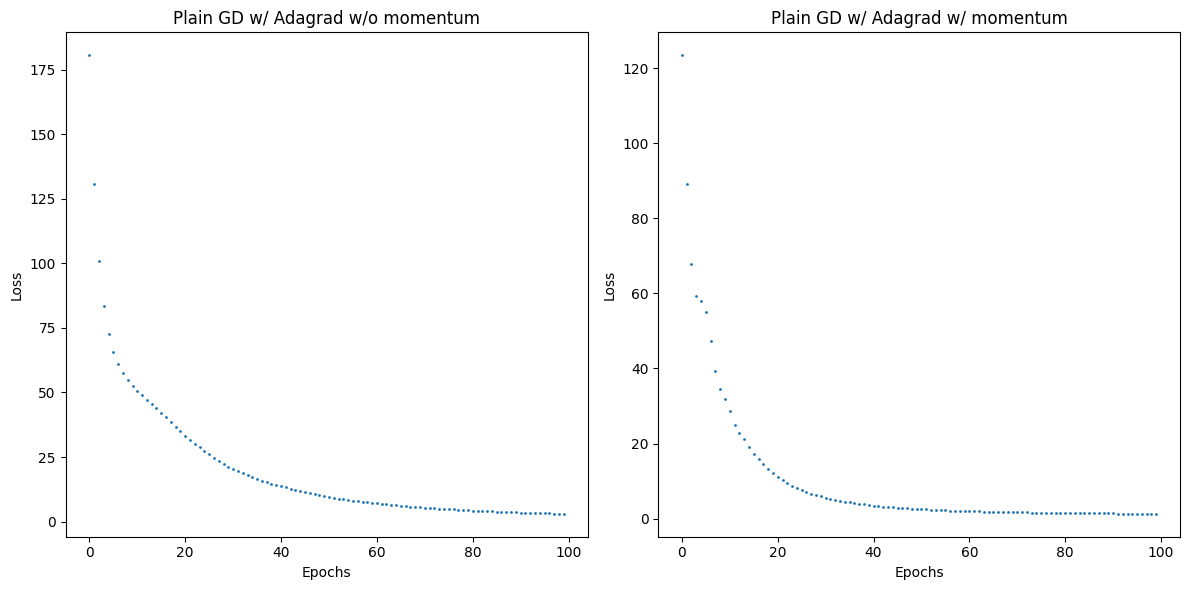

In [69]:
# test the neural network
np.random.seed(42)  # set random seed for reproducibility
network_input_size = 1
layer_output_sizes = [32, 32, 1]
activation_functions = [sigmoid, sigmoid, leaky_ReLU]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, leaky_ReLU_der]
cost_function = mse
cost_derivative = mse_derivative
EPOCHS = 100

beta1 = 0.2
beta2 = 0.999

# without momentum
optimizer = NNAdamOptimizer(learning_rate=0.01, batch_size=n_samples, momentum=False, beta1=beta1, beta2=beta2)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model

losses = nn.fit(x, y, epochs=EPOCHS)

# plot the loss
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(losses, '.', markersize=2)
plt.title("Plain GD w/ Adagrad w/o momentum")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# with momentum
optimizer = NNAdamOptimizer(learning_rate=0.01, batch_size=n_samples, momentum=True, momentum_delta=0.6, beta1=beta1, beta2=beta2)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model
losses = nn.fit(x, y, epochs=EPOCHS)

# plot the loss
plt.subplot(1,2,2)
plt.plot(losses, '.', markersize=2)
plt.title("Plain GD w/ Adagrad w/ momentum")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

SGD w/ Adam w/o momentum and w/ momentum

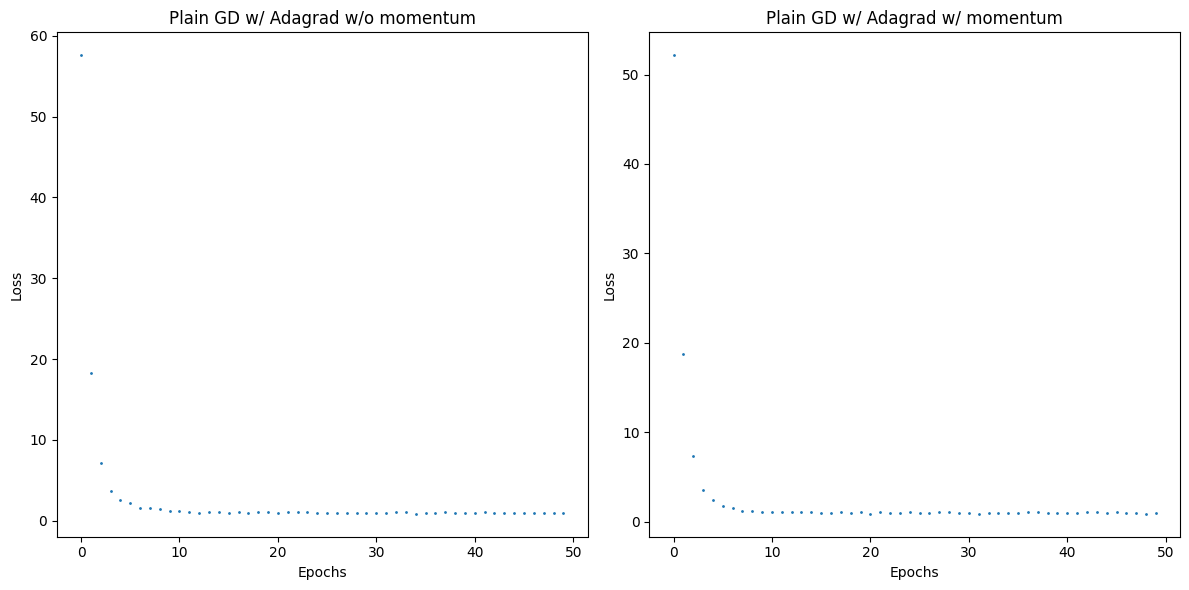

In [70]:
# test the neural network
np.random.seed(42)  # set random seed for reproducibility
network_input_size = 1
layer_output_sizes = [32, 32, 1]
activation_functions = [sigmoid, sigmoid, leaky_ReLU]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, leaky_ReLU_der]
cost_function = mse
cost_derivative = mse_derivative
EPOCHS = 50

beta1 = 0.2
beta2 = 0.999

# without momentum
optimizer = NNAdamOptimizer(learning_rate=0.01, momentum=False, beta1=beta1, beta2=beta2)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model

losses = nn.fit(x, y, epochs=EPOCHS)

# plot the loss
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(losses, '.', markersize=2)
plt.title("Plain GD w/ Adagrad w/o momentum")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# with momentum
optimizer = NNAdamOptimizer(learning_rate=0.01, momentum=True, momentum_delta=0.3, beta1=beta1, beta2=beta2)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model
losses = nn.fit(x, y, epochs=EPOCHS)

# plot the loss
plt.subplot(1,2,2)
plt.plot(losses, '.', markersize=2)
plt.title("Plain GD w/ Adagrad w/ momentum")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

#### 8. Final Comparison of all methods for Neural Network

I will now compare all the methods.
- Plain Gradient Descent w/o momentum
- Plain Gradient Descent w/ momentum
- Stochastic Gradient Descent w/o momentum
- Stochastic Gradient Descent w/ momentum
- Plain Gradient Descent w/ Adagrad w/o momentum
- Plain Gradient Descent w/ Adagrad w/ momentum
- Stochastic Gradient Descent w/ Adagrad w/o momentum
- Stochastic Gradient Descent w/ Adagrad w/ momentum
- Plain Gradient Descent w/ RMSprop w/o momentum
- Plain Gradient Descent w/ RMSprop w/ momentum
- Stochastic Gradient Descent w/ RMSprop w/o momentum
- Stochastic Gradient Descent w/ RMSprop w/ momentum
- Plain Gradient Descent w/ Adam w/o momentum
- Plain Gradient Descent w/ Adam w/ momentum
- Stochastic Gradient Descent w/ Adam w/o momentum
- Stochastic Gradient Descent w/ Adam w/ momentum


NNBasicOptimizer 
w/o momentum: Converged to 2.4612 in 190 iterations and to 2.3456 after 200 iterations
NNBasicOptimizer 
w/ momentum: Converged to 1.3242 in 190 iterations and to 1.2987 after 200 iterations
NNSGDOptimizer 
w/o momentum: Converged to 1.5629 in 30 iterations and to 1.2147 after 200 iterations
NNOptimizer 
w/ momentum: Converged to 1.1205 in 29 iterations and to 1.0212 after 200 iterations
NNAdagradOptimizer 
w/o momentum w/o minibatch: Converged to 45.5527 in 190 iterations and to 44.6583 after 200 iterations
NNAdagradOptimizer 
w/ momentum w/o minibatch: Converged to 25.7327 in 190 iterations and to 24.6112 after 200 iterations
NNAdagradOptimizer 
w/o momentum: Converged to 5.1236 in 190 iterations and to 5.2232 after 200 iterations
NNAdagradOptimizer 
w/ momentum: Converged to 1.2757 in 123 iterations and to 1.2006 after 200 iterations
NNRMSpropOptimizer 
w/o momentum w/o minibatch: Converged to 1.6160 in 190 iterations and to 1.5844 after 200 iterations
NNRMSpropOpt

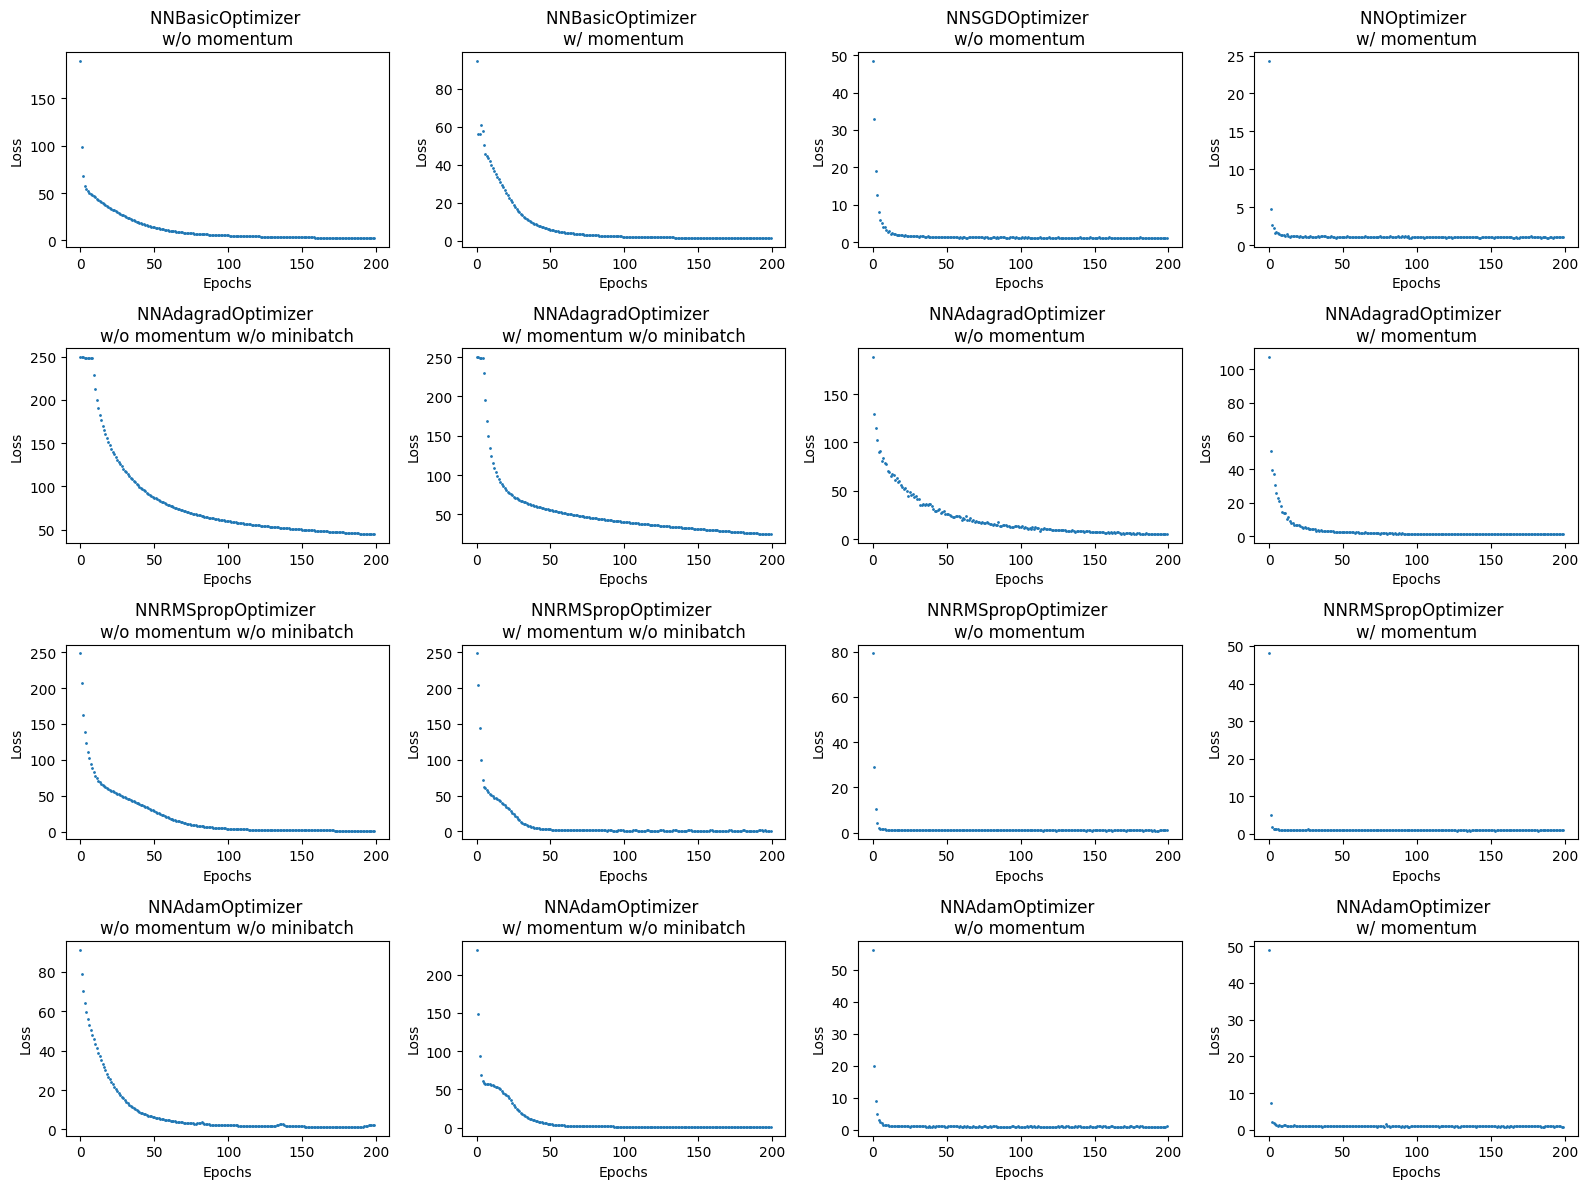

In [250]:
np.random.seed(42)  # set random seed for reproducibility
network_input_size = 1
layer_output_sizes = [32, 32, 1]
activation_functions = [sigmoid, sigmoid, leaky_ReLU]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, leaky_ReLU_der]
cost_function = mse
cost_derivative = mse_derivative
EPOCHS = 200
beta1 = 0.2
beta2 = 0.999
momentum_delta = 0.6
n_samples = 1000

optimizers = [
    NNBasicOptimizer(learning_rate=0.01, momentum=False),
    NNBasicOptimizer(learning_rate=0.01, momentum=True, momentum_delta=momentum_delta),
    NNSGDOptimizer(learning_rate=0.01, momentum=False),
    NNSGDOptimizer(learning_rate=0.01, momentum=True, momentum_delta=momentum_delta),
    NNAdagradOptimizer(learning_rate=0.01, batch_size=n_samples, momentum=False),
    NNAdagradOptimizer(learning_rate=0.01, batch_size=n_samples, momentum=True, momentum_delta=momentum_delta),
    NNAdagradOptimizer(learning_rate=0.01, momentum=False),
    NNAdagradOptimizer(learning_rate=0.01, momentum=True, momentum_delta=momentum_delta),
    NNRMSpropOptimizer(learning_rate=0.01, batch_size=n_samples, momentum=False),
    NNRMSpropOptimizer(learning_rate=0.01, batch_size=n_samples, momentum=True, momentum_delta=momentum_delta),
    NNRMSpropOptimizer(learning_rate=0.01, momentum=False),
    NNRMSpropOptimizer(learning_rate=0.01, momentum=True, momentum_delta=momentum_delta),
    NNAdamOptimizer(learning_rate=0.01, batch_size=n_samples, momentum=False, beta1=beta1, beta2=beta2),
    NNAdamOptimizer(learning_rate=0.01, batch_size=n_samples, momentum=True, momentum_delta=momentum_delta, beta1=beta1, beta2=beta2),
    NNAdamOptimizer(learning_rate=0.01, momentum=False, beta1=beta1, beta2=beta2),
    NNAdamOptimizer(learning_rate=0.01, momentum=True, momentum_delta=momentum_delta, beta1=beta1, beta2=beta2)
]

optimizer_names = [
    "NNBasicOptimizer \nw/o momentum",
    "NNBasicOptimizer \nw/ momentum",
    "NNSGDOptimizer \nw/o momentum",
    "NNOptimizer \nw/ momentum",
    "NNAdagradOptimizer \nw/o momentum w/o minibatch",
    "NNAdagradOptimizer \nw/ momentum w/o minibatch",
    "NNAdagradOptimizer \nw/o momentum",
    "NNAdagradOptimizer \nw/ momentum",
    "NNRMSpropOptimizer \nw/o momentum w/o minibatch",
    "NNRMSpropOptimizer \nw/ momentum w/o minibatch",
    "NNRMSpropOptimizer \nw/o momentum",
    "NNRMSpropOptimizer \nw/ momentum",
    "NNAdamOptimizer \nw/o momentum w/o minibatch",
    "NNAdamOptimizer \nw/ momentum w/o minibatch",
    "NNAdamOptimizer \nw/o momentum",
    "NNAdamOptimizer \nw/ momentum"
]

plt.figure(figsize=(16,12))

for i, optimizer in enumerate(optimizers):
    nn = NeuralNetwork(
        network_input_size=network_input_size,
        layer_output_sizes=layer_output_sizes,
        activation_functions=activation_functions,
        activation_derivatives=activation_derivatives,
        cost_function=cost_function,
        cost_derivative=cost_derivative,
        optimizer=optimizer,
        debug=False
    )

    losses = nn.fit(x, y, epochs=EPOCHS)
    conv_iter = nn.num_to_convergence(losses)
    print(f"{optimizer_names[i]}: Converged to {losses[conv_iter]:.4f} in {conv_iter} iterations and to {losses[-1]:.4f} after {EPOCHS} iterations")
    plt.subplot(4,4,i+1)
    plt.plot(losses, '.', markersize=2)
    plt.title(f"{optimizer_names[i]}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

plt.tight_layout()
plt.show()

comments: We see that the best method is SGD with Adam with momentum. This is because the learning rate is adaptive and the momentum helps to converge faster. We also see that the best method without momentum is SGD with Adam. This is because the learning rate is adaptive. We also see that the best method with momentum is SGD with Adam. This is because the learning rate is adaptive and the momentum helps to converge faster.

---

### Part c): Testing different activation functions

You should now also test different activation functions for the hidden layers. Try out the Sigmoid, the RELU and the Leaky RELU functions and discuss your results. You may also study the way you initialize your weights and biases.

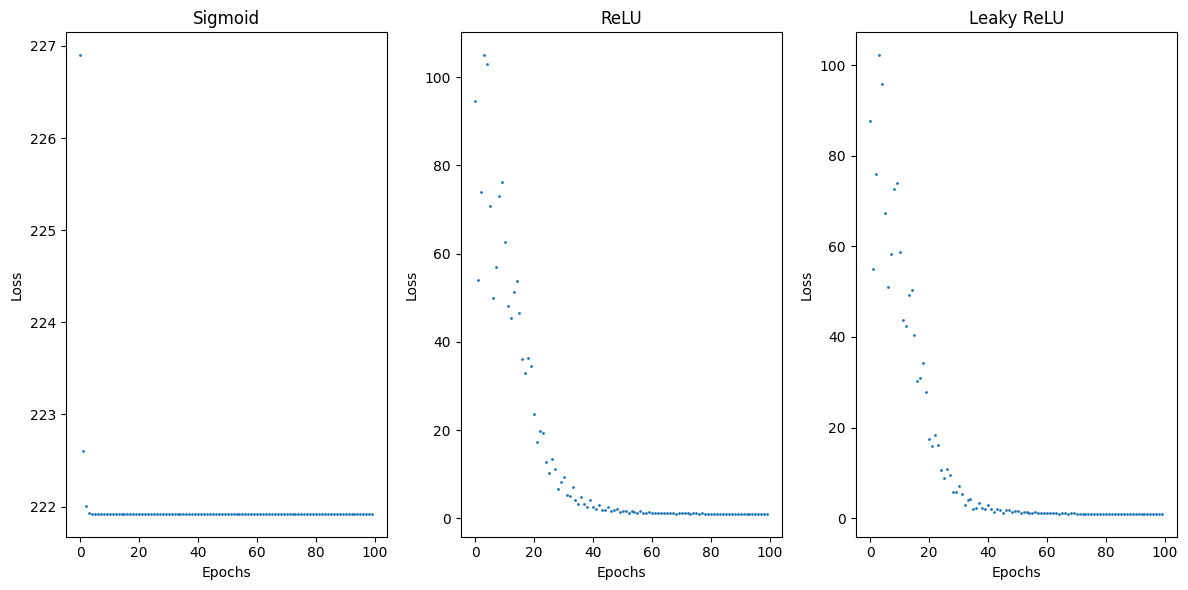

In [255]:
# compare sigmoid, ReLU, and leaky ReLU as output layer activation functions
np.random.seed(42)  # set random seed for reproducibility
network_input_size = 1
layer_output_sizes = [32, 32, 1]
activation_functions = [sigmoid, sigmoid, sigmoid]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, sigmoid_derivative]
cost_function = mse
cost_derivative = mse_derivative
optimizer = NNBasicOptimizer(learning_rate=0.01, momentum=True)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model
EPOCHS = 100
losses = nn.fit(x, y, epochs=EPOCHS)

# plot the loss
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.plot(losses, '.', markersize=2)
plt.title("Sigmoid")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# ReLU
activation_functions = [sigmoid, sigmoid, ReLU]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, ReLU_der]

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model
losses = nn.fit(x, y, epochs=EPOCHS)

# plot the loss
plt.subplot(1,3,2)
plt.plot(losses, '.', markersize=2)
plt.title("ReLU")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# leaky ReLU
activation_functions = [sigmoid, sigmoid, leaky_ReLU]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, leaky_ReLU_der]

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model
losses = nn.fit(x, y, epochs=EPOCHS)

# plot the loss
plt.subplot(1,3,3)
plt.plot(losses, '.', markersize=2)
plt.title("Leaky ReLU")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

comment: We see that the best activation function is the RELU or the Leaky RELU. We can see that the neural network is not even able to converge with the Sigmoid function.



### Compare with PyTorch

In [191]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
import timeit

# Define the feed-forward neural network with layers 16, 16, 1
class SimpleFFNN(torch.nn.Module):
    def __init__(self, input_size):
        super(SimpleFFNN, self).__init__()
        # Define the layers
        self.fc1 = torch.nn.Linear(input_size, 16)  # First hidden layer with 16 neurons
        self.sigmoid1 = torch.nn.Sigmoid()  # Sigmoid activation function for the first hidden layer
        self.fc2 = torch.nn.Linear(16, 16)  # Second hidden layer with 16 neurons
        self.sigmoid2 = torch.nn.Sigmoid()  # Sigmoid activation function for the second hidden layer
        self.fco = torch.nn.Linear(16, 1)  # Output layer with 1 neuron
        self.leaky_relu = torch.nn.LeakyReLU(negative_slope=0.01)  # Leaky ReLU activation for output layer

    def forward(self, x):
        out = self.fc1(x)  # First hidden layer
        out = self.sigmoid1(out)  # Apply sigmoid activation
        out = self.fc2(out)  # Second hidden layer
        out = self.sigmoid2(out)  # Apply sigmoid activation
        out = self.fco(out)  # Output layer
        out = self.leaky_relu(out)  # Apply leaky ReLU activation to output
        return out
    
class TorchNeuralNetwork:
    def __init__(
            self,
            model,
            loss_fn,
            optimizer=None,
    ):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer

    def fit(self, X, y, epochs=100):
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32).view(-1, 1)
        
        if self.optimizer is None:
            self._fit_default(X, y, epochs)
        else:
            self.mses = []
            for epoch in range(epochs):
                self.optimizer.zero_grad()
                outputs = self.model(X)
                loss = self.loss_fn(outputs, y)
                loss.backward()
                self.optimizer.step()
                self.mses.append(loss.item())

    def _fit_default(self, X, y, epochs):
        self.mses = []
        for epoch in range(epochs):
            outputs = model(X)
            loss = criterion(outputs, y)
            
            # Backward pass (compute gradients)
            loss.backward()
            
            # Manually update weights using gradient descent
            with torch.no_grad():
                for param in model.parameters():
                    param -= learning_rate * param.grad  # gradient descent update step
            
            # Zero the gradients after updating
            model.zero_grad()

Test performance epochs=100

In [197]:
np.random.seed(42)  # set random seed for reproducibility
network_input_size = 1
layer_output_sizes = [16, 16, 1]
activation_functions = [sigmoid, sigmoid, leaky_ReLU]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, leaky_ReLU_der]
cost_function = mse
cost_derivative = mse_derivative
learning_rate = 0.01
epochs = 100
optimisers = [
    NNBasicOptimizer(learning_rate=learning_rate),
    NNSGDOptimizer(learning_rate=learning_rate),
    NNAdagradOptimizer(learning_rate=learning_rate),
    NNRMSpropOptimizer(learning_rate=learning_rate),
    NNAdamOptimizer(learning_rate=learning_rate)
]
labels = [
    "NNBasicOptimizer",
    "NNSGDOptimizer",
    "NNAdagradOptimizer",
    "NNRMSpropOptimizer",
    "NNAdamOptimizer"
]

for i, optimiser in enumerate(optimisers):
    print(labels[i])

    # create the neural network
    nn = NeuralNetwork(
        network_input_size=network_input_size,
        layer_output_sizes=layer_output_sizes,
        activation_functions=activation_functions,
        activation_derivatives=activation_derivatives,
        cost_function=cost_function,
        cost_derivative=cost_derivative,
        optimizer=optimiser,
        debug=False
    )

    # fit the model
    %timeit -r 7 -n 10 nn.fit(x, y, epochs=epochs)

# create the PyTorch model
model = SimpleFFNN(input_size=network_input_size)
criterion = torch.nn.MSELoss()
optimizers = [
    None,
    torch.optim.SGD(model.parameters(), lr=learning_rate),
    torch.optim.Adagrad(model.parameters(), lr=learning_rate),
    torch.optim.RMSprop(model.parameters(), lr=learning_rate),
    torch.optim.Adam(model.parameters(), lr=learning_rate)
]
labels = [
    "GD",
    "SGD",
    "Adagrad",
    "RMSprop",
    "Adam"
]

for i, optimizer in enumerate(optimizers):
    print(labels[i])
    
    torch_nn = TorchNeuralNetwork(model, criterion, optimizer)
    %timeit -r 7 -n 10 torch_nn.fit(x, y, epochs=epochs)


NNBasicOptimizer
130 ms ± 6.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
NNSGDOptimizer
546 ms ± 23.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
NNAdagradOptimizer
620 ms ± 92.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
NNRMSpropOptimizer
619 ms ± 5.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
NNAdamOptimizer
711 ms ± 5.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
GD
95.5 ms ± 3.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
SGD
105 ms ± 6.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Adagrad
126 ms ± 1.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
RMSprop
123 ms ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Adam
131 ms ± 6.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Test performance with layer 16,16,16,1

In [199]:
np.random.seed(42)  # set random seed for reproducibility
network_input_size = 1
layer_output_sizes = [16, 16, 16, 1]
activation_functions = [sigmoid, sigmoid, sigmoid, leaky_ReLU]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, sigmoid_derivative, leaky_ReLU_der]
cost_function = mse
cost_derivative = mse_derivative
learning_rate = 0.01
epochs = 100
optimisers = [
    NNBasicOptimizer(learning_rate=learning_rate),
    NNSGDOptimizer(learning_rate=learning_rate),
    NNAdagradOptimizer(learning_rate=learning_rate),
    NNRMSpropOptimizer(learning_rate=learning_rate),
    NNAdamOptimizer(learning_rate=learning_rate)
]
labels = [
    "NNBasicOptimizer",
    "NNSGDOptimizer",
    "NNAdagradOptimizer",
    "NNRMSpropOptimizer",
    "NNAdamOptimizer"
]

for i, optimiser in enumerate(optimisers):
    print(labels[i])

    # create the neural network
    nn = NeuralNetwork(
        network_input_size=network_input_size,
        layer_output_sizes=layer_output_sizes,
        activation_functions=activation_functions,
        activation_derivatives=activation_derivatives,
        cost_function=cost_function,
        cost_derivative=cost_derivative,
        optimizer=optimiser,
        debug=False
    )

    # fit the model
    %timeit -r 7 -n 10 nn.fit(x, y, epochs=epochs)

# Define the feed-forward neural network with layers 16, 16, 16, 1
class SimpleFFNN(torch.nn.Module):
    def __init__(self, input_size):
        super(SimpleFFNN, self).__init__()
        # Define the layers
        self.fc1 = torch.nn.Linear(input_size, 16)  # First hidden layer with 16 neurons
        self.sigmoid1 = torch.nn.Sigmoid()  # Sigmoid activation function for the first hidden layer
        self.fc2 = torch.nn.Linear(16, 16)  # Second hidden layer with 16 neurons
        self.sigmoid2 = torch.nn.Sigmoid()  # Sigmoid activation function for the second hidden layer
        self.fc3 = torch.nn.Linear(16, 16)
        self.sigmoid3 = torch.nn.Sigmoid()
        self.fco = torch.nn.Linear(16, 1)  # Output layer with 1 neuron
        self.leaky_relu = torch.nn.LeakyReLU(negative_slope=0.01)  # Leaky ReLU activation for output layer

    def forward(self, x):
        out = self.fc1(x)  # First hidden layer
        out = self.sigmoid1(out)  # Apply sigmoid activation
        out = self.fc2(out)  # Second hidden layer
        out = self.sigmoid2(out)  # Apply sigmoid activation
        out = self.fc3(out)
        out = self.sigmoid3(out)
        out = self.fco(out)  # Output layer
        out = self.leaky_relu(out)  # Apply leaky ReLU activation to output
        return out
    
# create the PyTorch model
model = SimpleFFNN(input_size=network_input_size)
criterion = torch.nn.MSELoss()
optimizers = [
    None,
    torch.optim.SGD(model.parameters(), lr=learning_rate),
    torch.optim.Adagrad(model.parameters(), lr=learning_rate),
    torch.optim.RMSprop(model.parameters(), lr=learning_rate),
    torch.optim.Adam(model.parameters(), lr=learning_rate)
]
labels = [
    "GD",
    "SGD",
    "Adagrad",
    "RMSprop",
    "Adam"
]

for i, optimizer in enumerate(optimizers):
    print(labels[i])
    
    torch_nn = TorchNeuralNetwork(model, criterion, optimizer)
    %timeit -r 7 -n 10 torch_nn.fit(x, y, epochs=epochs)


NNBasicOptimizer
187 ms ± 5.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
NNSGDOptimizer
684 ms ± 4.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
NNAdagradOptimizer
785 ms ± 5.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
NNRMSpropOptimizer
828 ms ± 9.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
NNAdamOptimizer
933 ms ± 3.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
GD
124 ms ± 6.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
SGD
133 ms ± 6.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Adagrad
153 ms ± 8.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
RMSprop
157 ms ± 5.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Adam
179 ms ± 6.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Test performance with layer 16,16,16,16,1

In [202]:
np.random.seed(42)  # set random seed for reproducibility
network_input_size = 1
layer_output_sizes = [16, 16, 16, 16, 1]
activation_functions = [sigmoid, sigmoid, sigmoid, sigmoid, leaky_ReLU]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, sigmoid_derivative, sigmoid_derivative, leaky_ReLU_der]
cost_function = mse
cost_derivative = mse_derivative
learning_rate = 0.01
epochs = 100
optimisers = [
    NNBasicOptimizer(learning_rate=learning_rate),
    NNSGDOptimizer(learning_rate=learning_rate),
    NNAdagradOptimizer(learning_rate=learning_rate),
    NNRMSpropOptimizer(learning_rate=learning_rate),
    NNAdamOptimizer(learning_rate=learning_rate)
]
labels = [
    "NNBasicOptimizer",
    "NNSGDOptimizer",
    "NNAdagradOptimizer",
    "NNRMSpropOptimizer",
    "NNAdamOptimizer"
]

for i, optimiser in enumerate(optimisers):
    print(labels[i])

    # create the neural network
    nn = NeuralNetwork(
        network_input_size=network_input_size,
        layer_output_sizes=layer_output_sizes,
        activation_functions=activation_functions,
        activation_derivatives=activation_derivatives,
        cost_function=cost_function,
        cost_derivative=cost_derivative,
        optimizer=optimiser,
        debug=False
    )

    # fit the model
    %timeit -r 7 -n 10 nn.fit(x, y, epochs=epochs)

# Define the feed-forward neural network with layers 16, 16, 16, 1
class SimpleFFNN(torch.nn.Module):
    def __init__(self, input_size):
        super(SimpleFFNN, self).__init__()
        # Define the layers
        self.fc1 = torch.nn.Linear(input_size, 16)  # First hidden layer with 16 neurons
        self.sigmoid1 = torch.nn.Sigmoid()  # Sigmoid activation function for the first hidden layer
        self.fc2 = torch.nn.Linear(16, 16)  # Second hidden layer with 16 neurons
        self.sigmoid2 = torch.nn.Sigmoid()  # Sigmoid activation function for the second hidden layer
        self.fc3 = torch.nn.Linear(16, 16)
        self.sigmoid3 = torch.nn.Sigmoid()
        self.fc4 = torch.nn.Linear(16, 16)
        self.sigmoid4 = torch.nn.Sigmoid()
        self.fco = torch.nn.Linear(16, 1)  # Output layer with 1 neuron
        self.leaky_relu = torch.nn.LeakyReLU(negative_slope=0.01)  # Leaky ReLU activation for output layer

    def forward(self, x):
        out = self.fc1(x)  # First hidden layer
        out = self.sigmoid1(out)  # Apply sigmoid activation
        out = self.fc2(out)  # Second hidden layer
        out = self.sigmoid2(out)  # Apply sigmoid activation
        out = self.fc3(out)
        out = self.sigmoid3(out)
        out = self.fc4(out)
        out = self.sigmoid4(out)
        out = self.fco(out)  # Output layer
        out = self.leaky_relu(out)  # Apply leaky ReLU activation to output
        return out
    
# create the PyTorch model
model = SimpleFFNN(input_size=network_input_size)
criterion = torch.nn.MSELoss()
optimizers = [
    None,
    torch.optim.SGD(model.parameters(), lr=learning_rate),
    torch.optim.Adagrad(model.parameters(), lr=learning_rate),
    torch.optim.RMSprop(model.parameters(), lr=learning_rate),
    torch.optim.Adam(model.parameters(), lr=learning_rate)
]
labels = [
    "GD",
    "SGD",
    "Adagrad",
    "RMSprop",
    "Adam"
]

for i, optimizer in enumerate(optimizers):
    print(labels[i])
    
    torch_nn = TorchNeuralNetwork(model, criterion, optimizer)
    %timeit -r 7 -n 10 torch_nn.fit(x, y, epochs=epochs)


NNBasicOptimizer
281 ms ± 67.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
NNSGDOptimizer
879 ms ± 9.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
NNAdagradOptimizer
980 ms ± 5.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
NNRMSpropOptimizer
1.03 s ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
NNAdamOptimizer
1.19 s ± 8.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
GD
182 ms ± 27.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
SGD
160 ms ± 5.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Adagrad
182 ms ± 7.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
RMSprop
192 ms ± 8.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Adam
207 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Test performance with layer 16,16,16,16,16,1

In [205]:
np.random.seed(42)  # set random seed for reproducibility
network_input_size = 1
layer_output_sizes = [16, 16, 16, 16, 16, 1]
activation_functions = [sigmoid, sigmoid, sigmoid, sigmoid, sigmoid, leaky_ReLU]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, sigmoid_derivative, sigmoid_derivative, sigmoid_derivative, leaky_ReLU_der]
cost_function = mse
cost_derivative = mse_derivative
learning_rate = 0.01
epochs = 100
optimisers = [
    NNBasicOptimizer(learning_rate=learning_rate),
    NNSGDOptimizer(learning_rate=learning_rate),
    NNAdagradOptimizer(learning_rate=learning_rate),
    NNRMSpropOptimizer(learning_rate=learning_rate),
    NNAdamOptimizer(learning_rate=learning_rate)
]
labels = [
    "NNBasicOptimizer",
    "NNSGDOptimizer",
    "NNAdagradOptimizer",
    "NNRMSpropOptimizer",
    "NNAdamOptimizer"
]

for i, optimiser in enumerate(optimisers):
    print(labels[i])

    # create the neural network
    nn = NeuralNetwork(
        network_input_size=network_input_size,
        layer_output_sizes=layer_output_sizes,
        activation_functions=activation_functions,
        activation_derivatives=activation_derivatives,
        cost_function=cost_function,
        cost_derivative=cost_derivative,
        optimizer=optimiser,
        debug=False
    )

    # fit the model
    %timeit -r 7 -n 10 nn.fit(x, y, epochs=epochs)

# Define the feed-forward neural network with layers 16, 16, 16, 1
class SimpleFFNN(torch.nn.Module):
    def __init__(self, input_size):
        super(SimpleFFNN, self).__init__()
        # Define the layers
        self.fc1 = torch.nn.Linear(input_size, 16)  # First hidden layer with 16 neurons
        self.sigmoid1 = torch.nn.Sigmoid()  # Sigmoid activation function for the first hidden layer
        self.fc2 = torch.nn.Linear(16, 16)  # Second hidden layer with 16 neurons
        self.sigmoid2 = torch.nn.Sigmoid()  # Sigmoid activation function for the second hidden layer
        self.fc3 = torch.nn.Linear(16, 16)
        self.sigmoid3 = torch.nn.Sigmoid()
        self.fc4 = torch.nn.Linear(16, 16)
        self.sigmoid4 = torch.nn.Sigmoid()
        self.fco = torch.nn.Linear(16, 1)  # Output layer with 1 neuron
        self.leaky_relu = torch.nn.LeakyReLU(negative_slope=0.01)  # Leaky ReLU activation for output layer

    def forward(self, x):
        out = self.fc1(x)  # First hidden layer
        out = self.sigmoid1(out)  # Apply sigmoid activation
        out = self.fc2(out)  # Second hidden layer
        out = self.sigmoid2(out)  # Apply sigmoid activation
        out = self.fc3(out)
        out = self.sigmoid3(out)
        out = self.fc4(out)
        out = self.sigmoid4(out)
        out = self.fco(out)  # Output layer
        out = self.leaky_relu(out)  # Apply leaky ReLU activation to output
        return out
    
# create the PyTorch model
model = SimpleFFNN(input_size=network_input_size)
criterion = torch.nn.MSELoss()
optimizers = [
    None,
    torch.optim.SGD(model.parameters(), lr=learning_rate),
    torch.optim.Adagrad(model.parameters(), lr=learning_rate),
    torch.optim.RMSprop(model.parameters(), lr=learning_rate),
    torch.optim.Adam(model.parameters(), lr=learning_rate)
]
labels = [
    "GD",
    "SGD",
    "Adagrad",
    "RMSprop",
    "Adam"
]

for i, optimizer in enumerate(optimizers):
    print(labels[i])
    
    torch_nn = TorchNeuralNetwork(model, criterion, optimizer)
    %timeit -r 7 -n 10 torch_nn.fit(x, y, epochs=epochs)


NNBasicOptimizer
316 ms ± 20.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
NNSGDOptimizer
1.04 s ± 6.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
NNAdagradOptimizer
1.16 s ± 6.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
NNRMSpropOptimizer
1.23 s ± 4.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
NNAdamOptimizer
1.43 s ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
GD
165 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
SGD
162 ms ± 9.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Adagrad
197 ms ± 18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
RMSprop
194 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Adam
221 ms ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


---

### Part d): Classification  analysis using neural networks

With a well-written code it should now be easy to change the
activation function for the output layer.

Here we will change the cost function for our neural network code
developed in parts b) and c) in order to perform a classification analysis. 

We will here study the Wisconsin Breast Cancer  data set. This is a typical binary classification problem with just one single output, either True or Fale, $0$ or $1$ etc.
You find more information about this at the [Scikit-Learn
site](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) or at the [University of California
at Irvine](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)). 

To measure the performance of our classification problem we use the
so-called *accuracy* score.  The accuracy is as you would expect just
the number of correctly guessed targets $t_i$ divided by the total
number of targets, that is

$$
\text{Accuracy} = \frac{\sum_{i=1}^n I(t_i = y_i)}{n} ,
$$

In [76]:
# define some helper functions
def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def cross_entropy(predict, target):
    epsilon = 1e-12
    predict = np.clip(predict, epsilon, 1. - epsilon)
    return -np.sum(target * np.log(predict)) / target.shape[0]

def cross_entropy_derivative(predict, target):
    # applicable for softmax + cross entropy
    return predict - target

def softmax(z):
    """Compute softmax values for each set of scores in the rows of the matrix z.
    Used with batched input data."""
    e_z = np.exp(z - np.max(z, axis=0))
    return e_z / np.sum(e_z, axis=1)[:, np.newaxis]

# See https://stackoverflow.com/questions/58461808/understanding-backpropagation-with-softmax
# from the above discussion, seems like its common practise to pass the derivative of the loss function instead
# hence, softmax_der should not modify the derivative
def softmax_der(z):
    da_dz = np.ones(z.shape)
    return da_dz

where $I$ is the indicator function, $1$ if $t_i = y_i$ and $0$
otherwise if we have a binary classification problem. Here $t_i$
represents the target and $y_i$ the outputs of your FFNN code and $n$ is simply the number of targets $t_i$.

Discuss your results and give a critical analysis of the various parameters, including hyper-parameters like the learning rates and the regularization parameter $\lambda$ (as you did in Ridge Regression), various activation functions, number of hidden layers and nodes and activation functions.  

As stated in the introduction, it can also be useful to study other
datasets. 

Again, we strongly recommend that you compare your own neural Network
code for classification and pertinent results against a similar code using **Scikit-Learn**  or **tensorflow/keras** or **pytorch**.

Number of samples: 569
Number of features: 30
Number of classes: 2


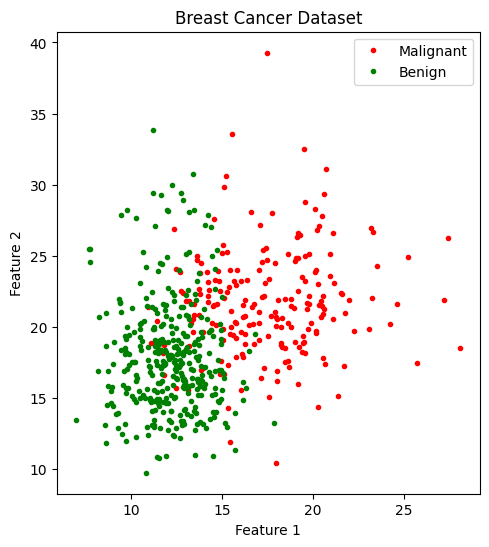

In [206]:
from sklearn.datasets import load_breast_cancer

# load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

# plot the data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(X[y==0,0], X[y==0,1], 'r.', label="Malignant")
plt.plot(X[y==1,0], X[y==1,1], 'g.', label="Benign")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Breast Cancer Dataset")
plt.legend()
plt.show()


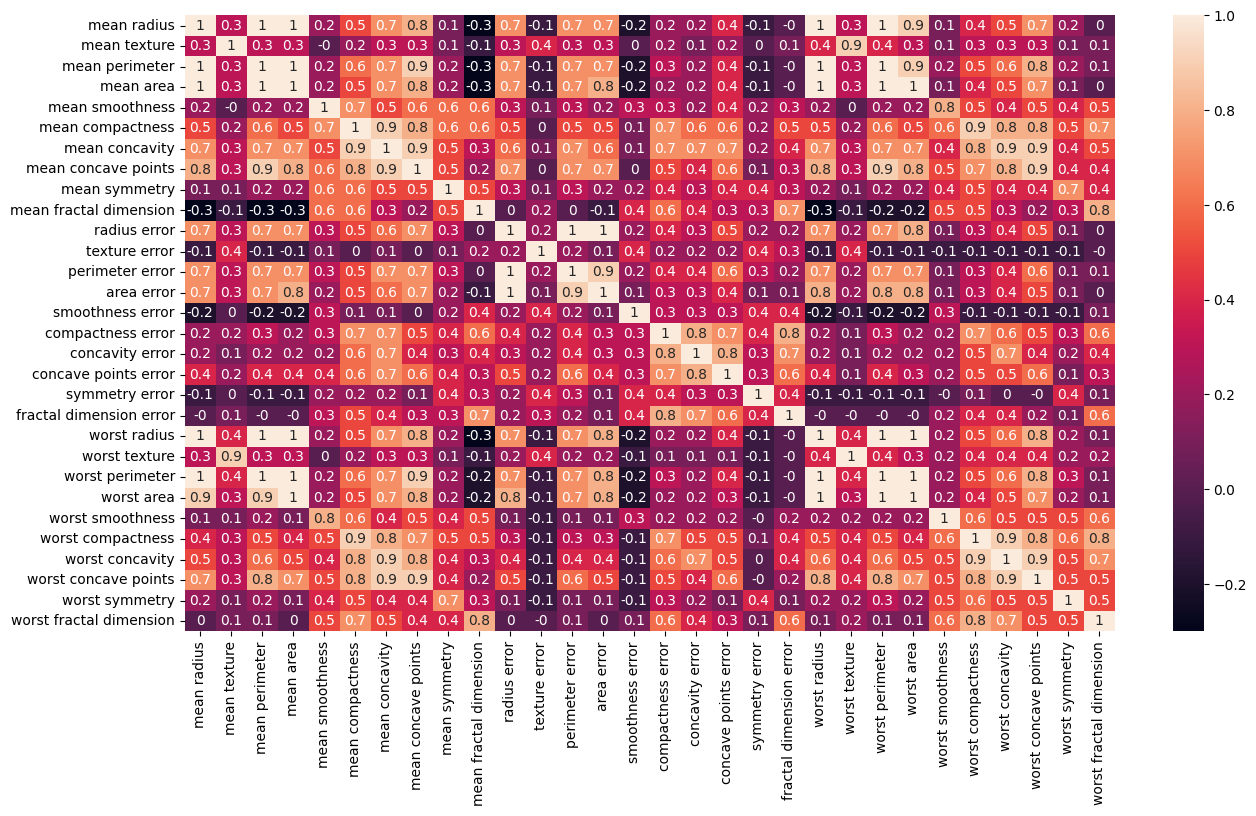

In [78]:

cancer = load_breast_cancer()
import pandas as pd
# Making a data frame
cancerpd = pd.DataFrame(cancer.data, columns=cancer.feature_names)

import seaborn as sns
correlation_matrix = cancerpd.corr().round(1)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
plt.figure(figsize=(15,8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Number of features before selection: 30
Number of features after selection: 20
Selected features:
1. mean radius
2. mean texture
3. mean perimeter
4. mean area
5. mean compactness
6. mean concavity
7. mean concave points
8. radius error
9. perimeter error
10. area error
11. concave points error
12. worst radius
13. worst texture
14. worst perimeter
15. worst area
16. worst smoothness
17. worst compactness
18. worst concavity
19. worst concave points
20. worst symmetry
Training accuracy: 1.0000
Test accuracy: 0.9649


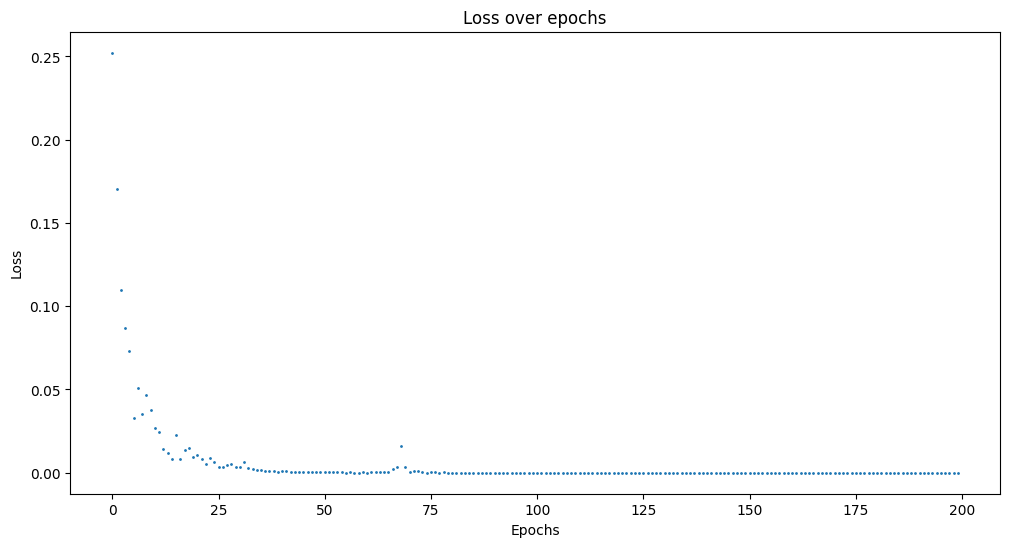

In [79]:
# feature selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature selection
selector = SelectKBest(f_classif, k=20)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# one-hot encode the target
y_train = np.eye(len(np.unique(y_train)))[y_train]
y_test = np.eye(len(np.unique(y_test)))[y_test]

print(f"Number of features before selection: {X_train.shape[1]}")
print(f"Number of features after selection: {X_train_selected.shape[1]}")

print("Selected features:")
for i, feature in enumerate(selector.get_support(indices=True)):
    print(f"{i+1}. {data.feature_names[feature]}")

# normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)

# create the neural network
np.random.seed(42)  # set random seed for reproducibility
network_input_size = X_train_selected.shape[1]
layer_output_sizes = [32, 32, 2]
activation_functions = [sigmoid, sigmoid, softmax]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, softmax_der]
cost_function = cross_entropy
cost_derivative = cross_entropy_derivative
optimizer = NNAdamOptimizer(
    momentum=True, 
    momentum_delta=0.2,
    beta1=0.9,
    beta2=0.99
)

nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model
EPOCHS = 200
losses = nn.fit(X_train_selected, y_train, epochs=EPOCHS)

# training accuracy
y_pred = np.argmax(nn.predict(X_train_selected), axis=1)
y_true = np.argmax(y_train, axis=1)
train_accuracy = accuracy_score(y_true, y_pred)
print(f"Training accuracy: {train_accuracy:.4f}")

# test accuracy
y_pred = np.argmax(nn.predict(X_test_selected), axis=1)
y_true = np.argmax(y_test, axis=1)
test_accuracy = accuracy_score(y_true, y_pred)
print(f"Test accuracy: {test_accuracy:.4f}")

# plot the loss
plt.figure(figsize=(12,6))
plt.plot(losses, '.', markersize=2)
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

prepare the data set and perform a classification analysis using the neural network code.

Number of training samples: 455
Number of testing samples: 114
Training accuracy: 1.0000
Testing accuracy: 0.9737


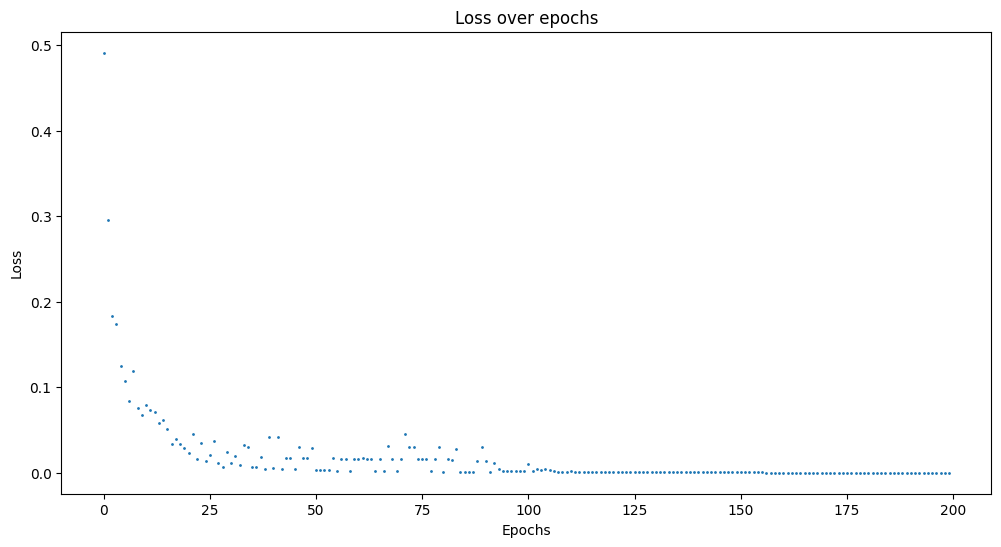

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of testing samples: {X_test.shape[0]}")

# one-hot encode the target
y_train = np.eye(len(np.unique(y_train)))[y_train]
y_test = np.eye(len(np.unique(y_test)))[y_test]

# normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create the neural network
np.random.seed(42)  # set random seed for reproducibility
network_input_size = X_train.shape[1]
layer_output_sizes = [32, 16, 2]
activation_functions = [sigmoid, sigmoid, sigmoid]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, sigmoid_derivative]
cost_function = cross_entropy
cost_derivative = cross_entropy_derivative
optimizer = NNAdamOptimizer(
    momentum=True, 
    momentum_delta=0.2,
    beta1=0.9,
    beta2=0.99
)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model
EPOCHS = 200
losses = nn.fit(X_train, y_train, epochs=EPOCHS)

# training accuracy
y_pred = np.argmax(nn.predict(X_train), axis=1)
y_true = np.argmax(y_train, axis=1)
accuracy = accuracy_score(y_true, y_pred)
print(f"Training accuracy: {accuracy:.4f}")

# testing accuracy
y_pred = np.argmax(nn.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_true, y_pred)
print(f"Testing accuracy: {accuracy:.4f}")

# plot the loss
plt.figure(figsize=(12,6))
plt.plot(losses, '.', markersize=2)
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

I will now compare different activation functions for the output layer.

Activation functions: Sigmoid, softmax, RELU, Leaky RELU.

sigmoid: Converged to 0.0336 in 16 iterations and to 0.0001 after 200 iterations
ReLU: Converged to 0.1752 in 15 iterations and to 0.0210 after 200 iterations
Leaky ReLU: Converged to 0.3472 in 16 iterations and to 0.0209 after 200 iterations
Softmax: Converged to 0.0343 in 6 iterations and to 0.0000 after 200 iterations


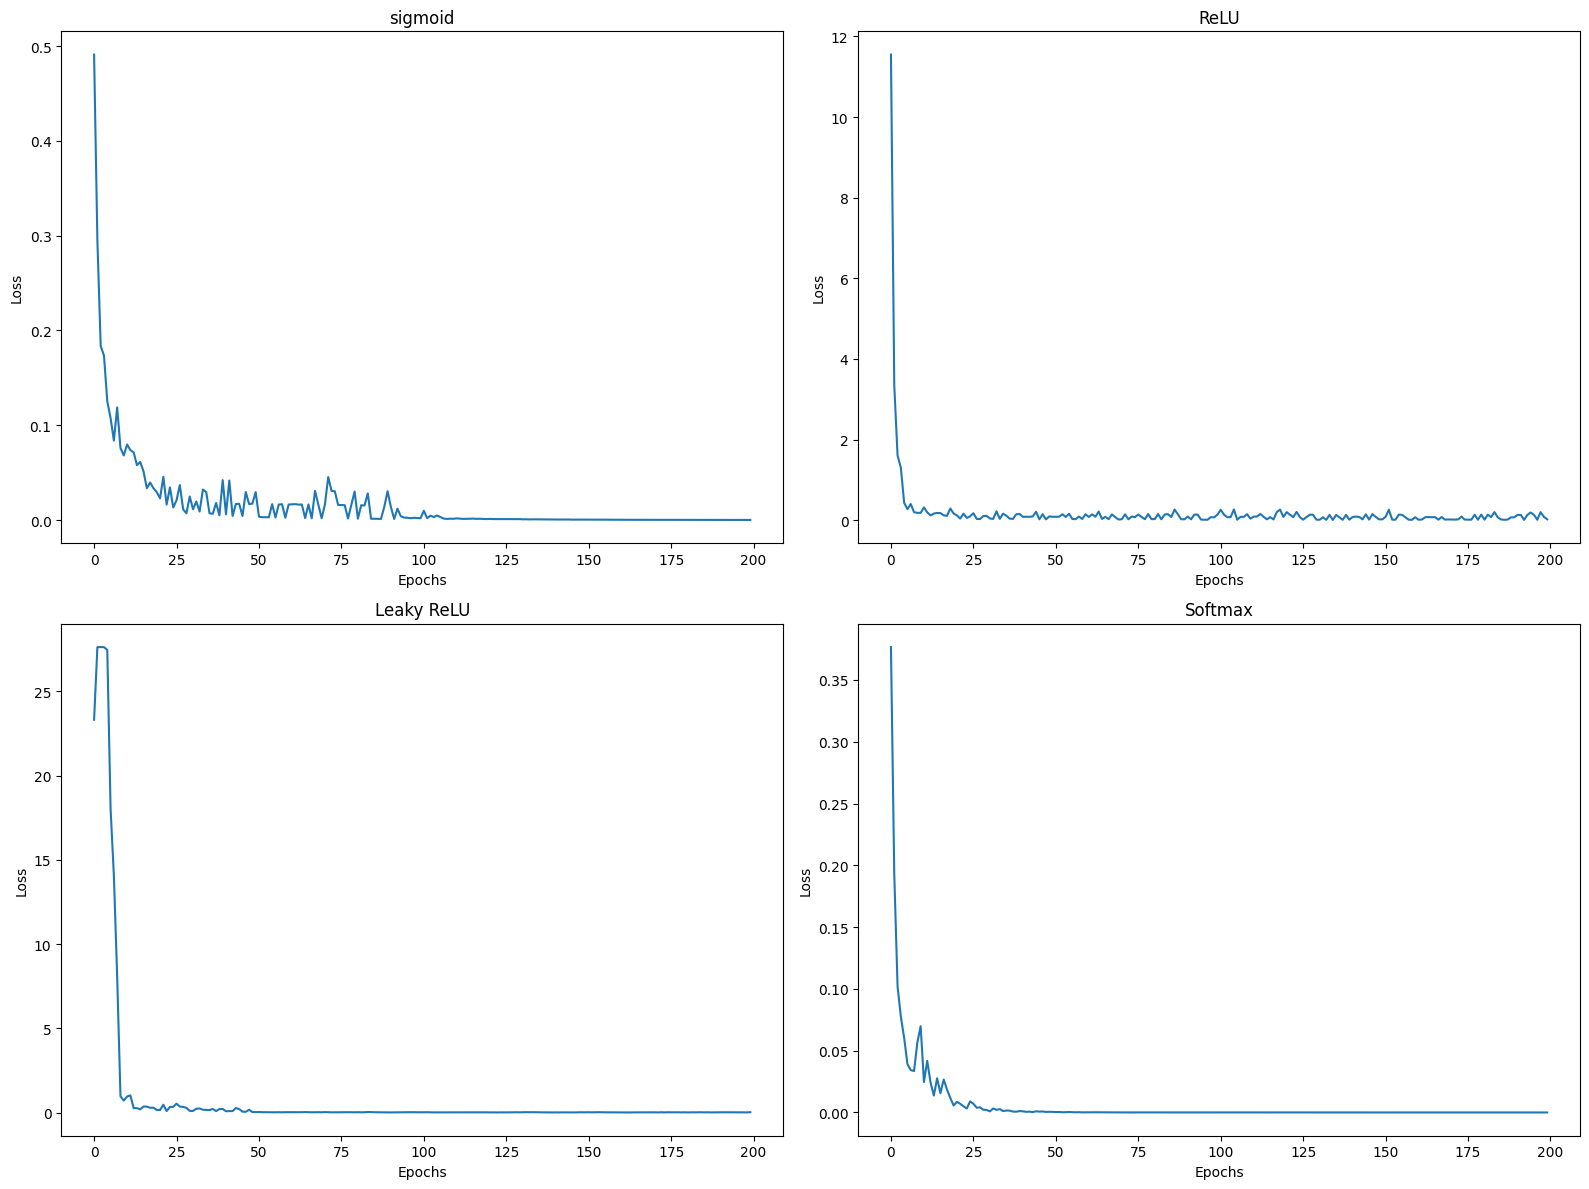

In [263]:
np.random.seed(42)  # set random seed for reproducibility
network_input_size = X_train.shape[1]
layer_output_sizes = [32, 16, 2]
activation_functions = [
  [sigmoid, sigmoid, sigmoid],
  [sigmoid, sigmoid, ReLU],
  [sigmoid, sigmoid, leaky_ReLU],
  [sigmoid, sigmoid, softmax]
]
activation_derivatives = [
  [sigmoid_derivative, sigmoid_derivative, sigmoid_derivative],
  [sigmoid_derivative, sigmoid_derivative, ReLU_der],
  [sigmoid_derivative, sigmoid_derivative, leaky_ReLU_der],
  [sigmoid_derivative, sigmoid_derivative, softmax_der]
]
label_names = ["sigmoid", "ReLU", "Leaky ReLU", "Softmax"]
cost_function = cross_entropy
cost_derivative = cross_entropy_derivative
optimizer = NNAdamOptimizer(
    momentum=True, 
    momentum_delta=0.2,
    beta1=0.9,
    beta2=0.99
)

plt.figure(figsize=(16,12))

for i, (activation_function, activation_derivative) in enumerate(zip(activation_functions, activation_derivatives)):
    nn = NeuralNetwork(
        network_input_size=network_input_size,
        layer_output_sizes=layer_output_sizes,
        activation_functions=activation_function,
        activation_derivatives=activation_derivative,
        cost_function=cost_function,
        cost_derivative=cost_derivative,
        optimizer=optimizer,
        debug=False
    )

    losses = nn.fit(X_train, y_train, epochs=EPOCHS)
    conv_iter = nn.num_to_convergence(losses)
    print(f"{label_names[i]}: Converged to {losses[conv_iter]:.4f} in {conv_iter} iterations and to {losses[-1]:.4f} after {EPOCHS} iterations")
    plt.subplot(2,2,i+1)
    plt.plot(losses, '-', markersize=2)
    plt.title(f"{label_names[i]}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

plt.tight_layout()
plt.show()

conclusion: Best activation function is softmax. This is because the output layer is a binary classification problem. The softmax function is the generalization of the sigmoid function to multiple classes. The RELU functions shows chaotic convergence, and shows a higher mse than the other activation functions. 

Next, I will compare the different number of layers and nodes.

32-16-2: Converged to 0.0383 in 16 iterations and to 0.0000 after 100 iterations
16-8-2: Converged to 0.0520 in 7 iterations and to 0.0000 after 100 iterations
32-16-16-2: Converged to 0.0070 in 11 iterations and to 0.0000 after 100 iterations
16-8-8-2: Converged to 0.0264 in 13 iterations and to 0.0000 after 100 iterations
32-32-16-2: Converged to 0.0214 in 8 iterations and to 0.0000 after 100 iterations
16-16-8-2: Converged to 0.0338 in 16 iterations and to 0.0000 after 100 iterations
32-32-32-16-2: Converged to 0.0072 in 14 iterations and to 0.0000 after 100 iterations
16-16-16-8-2: Converged to 0.0218 in 6 iterations and to 0.0000 after 100 iterations


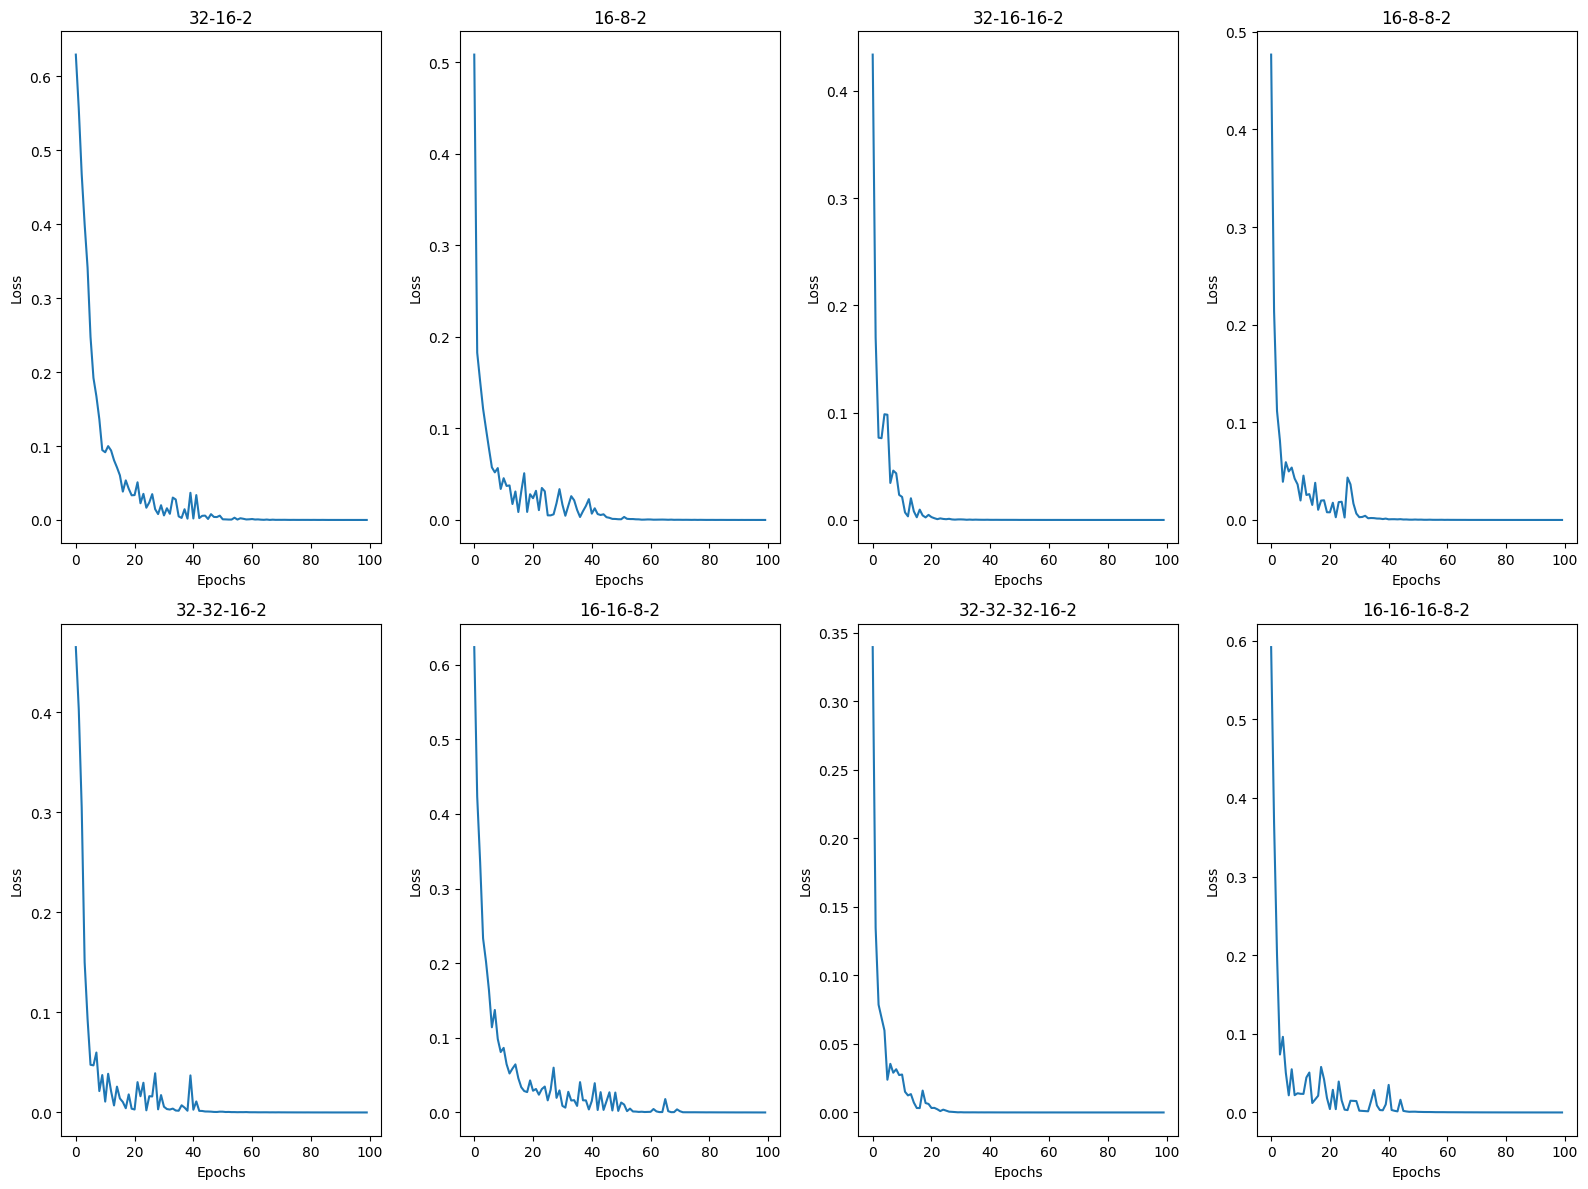

In [264]:
np.random.seed(42)  # set random seed for reproducibility
network_input_size = X_train.shape[1]
layer_output_sizes = [
    [32, 16, 2],
    [16, 8, 2],
    [32, 16, 16, 2],
    [16, 8, 8, 2],
    [32, 32, 16, 2],
    [16, 16, 8, 2],
    [32, 32, 32, 16, 2],
    [16, 16, 16, 8, 2]
]
activation_functions = [
    [sigmoid, sigmoid, softmax],
    [sigmoid, sigmoid, softmax],
    [sigmoid, sigmoid, sigmoid, softmax],
    [sigmoid, sigmoid, sigmoid, softmax],
    [sigmoid, sigmoid, sigmoid, softmax],
    [sigmoid, sigmoid, sigmoid, softmax],
    [sigmoid, sigmoid, sigmoid, sigmoid, softmax],
    [sigmoid, sigmoid, sigmoid, sigmoid, softmax]
]
activation_derivatives = [
    [sigmoid_derivative, sigmoid_derivative, softmax_der],
    [sigmoid_derivative, sigmoid_derivative, softmax_der],
    [sigmoid_derivative, sigmoid_derivative, sigmoid_derivative, softmax_der],
    [sigmoid_derivative, sigmoid_derivative, sigmoid_derivative, softmax_der],
    [sigmoid_derivative, sigmoid_derivative, sigmoid_derivative, softmax_der],
    [sigmoid_derivative, sigmoid_derivative, sigmoid_derivative, softmax_der],
    [sigmoid_derivative, sigmoid_derivative, sigmoid_derivative, sigmoid_derivative, softmax_der],
    [sigmoid_derivative, sigmoid_derivative, sigmoid_derivative, sigmoid_derivative, softmax_der]
]
label_names = [
    "32-16-2",
    "16-8-2",
    "32-16-16-2",
    "16-8-8-2",
    "32-32-16-2",
    "16-16-8-2",
    "32-32-32-16-2",
    "16-16-16-8-2"
]
cost_function = cross_entropy
cost_derivative = cross_entropy_derivative
EPOCHS = 100

plt.figure(figsize=(16,12))

for i, (layer_output_size, activation_function, activation_derivative) in enumerate(zip(layer_output_sizes, activation_functions, activation_derivatives)):
    optimizer = NNAdamOptimizer(
        momentum=True, 
        momentum_delta=0.2,
        beta1=0.9,
        beta2=0.99
    )
    nn = NeuralNetwork(
        network_input_size=network_input_size,
        layer_output_sizes=layer_output_size,
        activation_functions=activation_function,
        activation_derivatives=activation_derivative,
        cost_function=cost_function,
        cost_derivative=cost_derivative,
        optimizer=optimizer,
        debug=False
    )

    losses = nn.fit(X_train, y_train, epochs=EPOCHS)
    conv_iter = nn.num_to_convergence(losses)
    print(f"{label_names[i]}: Converged to {losses[conv_iter]:.4f} in {conv_iter} iterations and to {losses[-1]:.4f} after {EPOCHS} iterations") 
    plt.subplot(2,4,i+1)
    plt.plot(losses, '-', markersize=2)
    plt.title(f"{label_names[i]}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

plt.tight_layout()
plt.show()

conslusion: Best number of layers and nodes is 2 layers with 16 nodes in the first layer and 8 nodes in the second layer. This is because it is one of the faster architectures to converge and is the least computationally expensive.

I will now analysis various batch sizes.

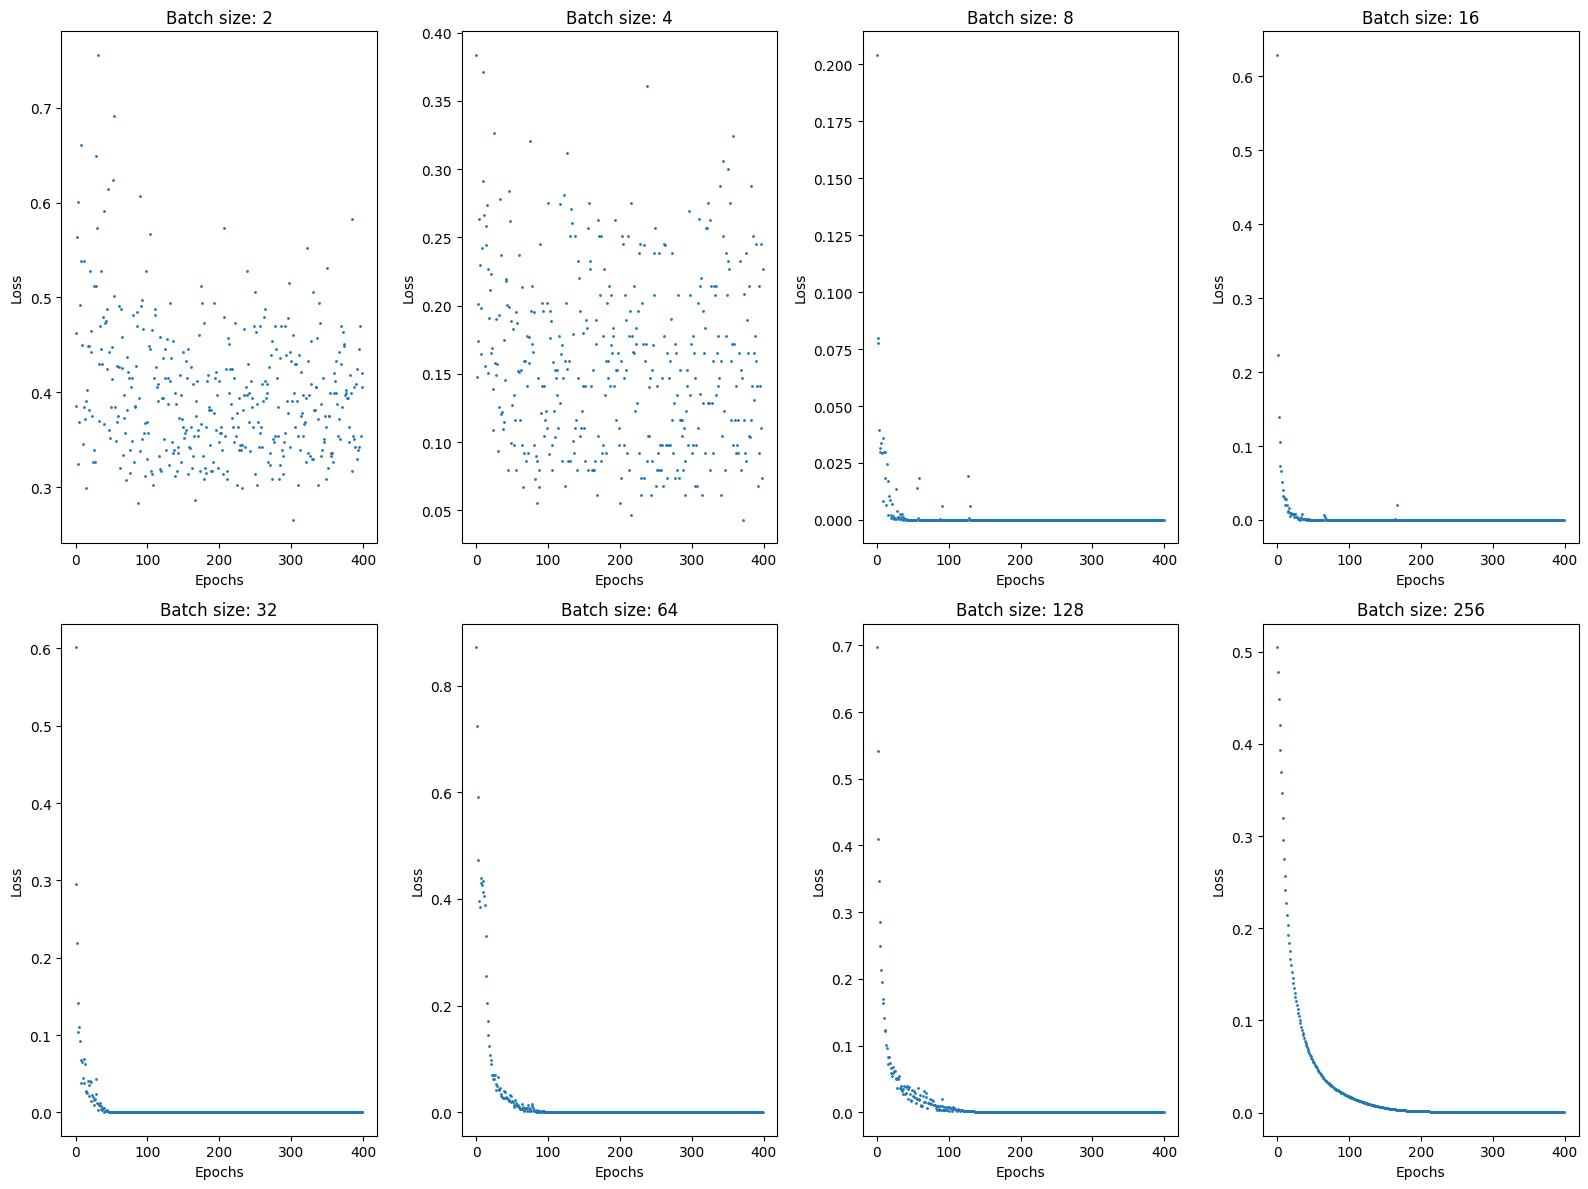

In [96]:
np.random.seed(42)  # set random seed for reproducibility
network_input_size = X_train.shape[1]
layer_output_sizes = [16, 8, 2]
activation_functions = [sigmoid, sigmoid, softmax]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, softmax_der]
cost_function = cross_entropy
cost_derivative = cross_entropy_derivative
batch_sizes = [2, 4, 8, 16, 32, 64, 128, 256]
EPOCHS = 400

plt.figure(figsize=(16,12))

for i, batch_size in enumerate(batch_sizes):
    optimizer = NNAdamOptimizer(
        momentum=True, 
        momentum_delta=0.2,
        beta1=0.9,
        beta2=0.99,
        batch_size=batch_size
    )
    nn = NeuralNetwork(
        network_input_size=network_input_size,
        layer_output_sizes=layer_output_sizes,
        activation_functions=activation_functions,
        activation_derivatives=activation_derivatives,
        cost_function=cost_function,
        cost_derivative=cost_derivative,
        optimizer=optimizer,
        debug=False
    )

    losses = nn.fit(X_train, y_train, epochs=EPOCHS)
    plt.subplot(2,4,i+1)
    plt.plot(losses, '.', markersize=2)
    plt.title(f"Batch size: {batch_size}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

plt.tight_layout()
plt.show()

### Part e): Write your Logistic Regression code, final step

Finally, we want to compare the FFNN code we have developed with
Logistic regression, that is we wish to compare our neural network
classification results with the results we can obtain with another
method.

Define your cost function and the design matrix before you start writing your code.
Write thereafter a Logistic regression code using your SGD algorithm. You can also use standard gradient descent in this case, with a learning rate as hyper-parameter.
Study the results as functions of the chosen learning rates.
Add also an $l_2$ regularization parameter $\lambda$. Compare your results with those from your FFNN code as well as those obtained using **Scikit-Learn**'s logistic regression functionality.

The weblink  here <https://medium.com/ai-in-plain-english/comparison-between-logistic-regression-and-neural-networks-in-classifying-digits-dc5e85cd93c3>compares logistic regression and FFNN using the so-called MNIST data set. You may find several useful hints and ideas from this article.

In [97]:
# Define cost function for binary classification logistic regression with l2 regularization
def logistic_cost_function(predict, target, weights, l2_lambda=0.01):
    epsilon = 1e-12
    predict = np.clip(predict, epsilon, 1. - epsilon)
    return -np.sum(target * np.log(predict)) / target.shape[0] + 0.5 * l2_lambda * np.sum(weights**2)

# Define derivative of cost function for binary classification logistic regression with l2 regularization
def logistic_cost_derivative(predict, target, weights, l2_lambda=0.01):
    return predict - target + l2_lambda * weights

In [259]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01,epochs=1000, batch_size=32, l2_lambda=0.1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.losses = []
        self.accuracy = []

    def sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, n_features):
        """Initialize weights and bias"""
        self.weights = np.zeros(n_features)
        self.bias = 0

    def _logistic_cost_function(self, y_pred, y_true):
        """Binary cross-entropy loss with L2 regularization"""
        epsilon = 1e-12  # For numerical stability
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        
        # Binary cross-entropy loss
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        
        # Add L2 regularization term
        l2_penalty = 0.5 * self.l2_lambda * np.sum(self.weights ** 2)
        return loss + l2_penalty

    def _compute_gradients(self, X, y, y_pred):
        """Compute gradients for weights and bias, including L2 regularization term"""
        n_samples = X.shape[0]
        
        # Compute gradients
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + self.l2_lambda * self.weights
        db = (1 / n_samples) * np.sum(y_pred - y)
        
        return dw, db

    def fit(self, X, y):
        """Fit the logistic regression model to the data"""
        n_samples, n_features = X.shape
        self.initialize_parameters(n_features)

        for epoch in range(self.epochs):
            # Shuffle data
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]

                # Forward pass: calculate predictions
                linear_model = np.dot(X_batch, self.weights) + self.bias
                y_pred = self.sigmoid(linear_model)

                # Compute gradients
                dw, db = self._compute_gradients(X_batch, y_batch, y_pred)

                # Update weights and bias
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            # Compute loss for monitoring
            total_loss = self._logistic_cost_function(self.sigmoid(np.dot(X, self.weights) + self.bias), y)
            self.losses.append(total_loss)

            # Compute accuracy
            acc = self.score(X, y)
            self.accuracy.append(acc)

    def predict_proba(self, X):
        """Return the probability estimates for the positive class"""
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        """Predict binary class labels for samples in X"""
        y_pred_proba = self.predict_proba(X)
        return (y_pred_proba >= threshold).astype(int)
    
    def score(self, X, y):
        """Return the mean accuracy on the given test data and labels"""
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)
    
    def _accuracy_score(self, y_true, y_pred):
        """Compute the accuracy score"""
        return np.mean(y_true == y_pred) / len(y_true)
    
    def num_to_convergence(self, mses, threshold=0.01):
        """Given a list of mse values, return the number of iterations to convergence
            The model converges when the difference between 10 consecutive mse values is less than the threshold
        
            Args:
                mses: list of mean squared errors
                threshold: threshold for the variance of the mean squared error

            Returns:
                number of iterations to convergence
        """
        i = 0
        while True:
            if i >= len(mses)-10:
                return i
            if np.abs(mses[i] - mses[i+10]) < threshold:
                return i
            i += 1


In [108]:
# test the logistic regression model
np.random.seed(42)  # set random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# test a untrained logistic model
logistic = LogisticRegression(learning_rate=0.01, epochs=1000, batch_size=32, l2_lambda=0.1)
logistic.initialize_parameters(X_train.shape[1])
y_pred = logistic.predict(X_test)
accuracy = logistic.score(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 0.6228


Training accuracy: 0.9824
Testing accuracy: 0.9825


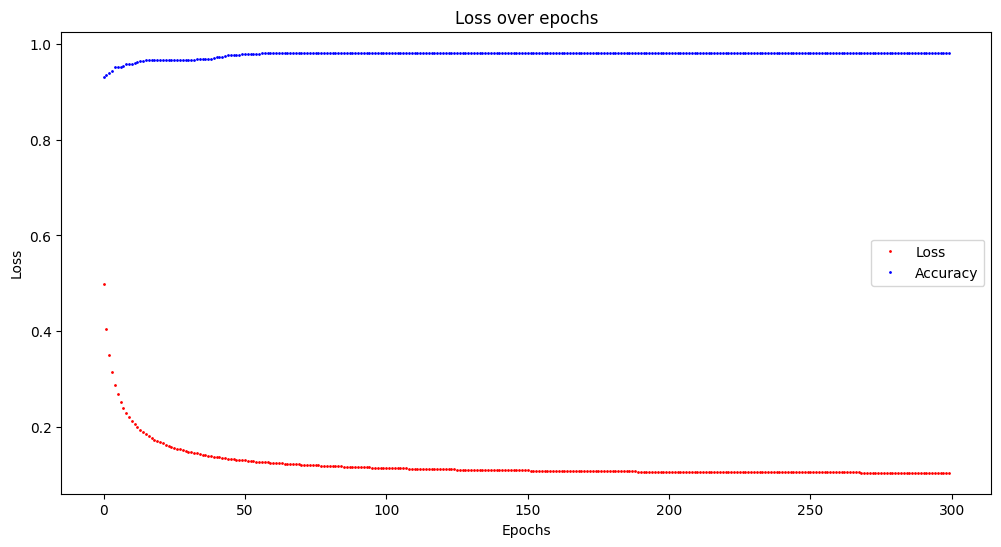

In [102]:
# test the logistic regression model
np.random.seed(42)  # set random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create the logistic regression model
logistic = LogisticRegression(
    learning_rate=0.01,
    l2_lambda=0.01,
    batch_size=32,
    epochs=300
)

# fit the model
logistic.fit(X_train, y_train)
losses = logistic.losses

# training accuracy
y_pred = logistic.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Training accuracy: {accuracy:.4f}")

# testing accuracy
y_pred = logistic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing accuracy: {accuracy:.4f}")

# plot the loss
plt.figure(figsize=(12,6))
plt.plot(losses, 'r.', markersize=2)
plt.plot(logistic.accuracy, 'b.', markersize=2)
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend(["Loss", "Accuracy"])
plt.show()

Number of training samples: 455
Number of testing samples: 114
Training accuracy (NN): 1.0000
Testing accuracy (NN): 0.9649
Training accuracy (Logistic): 0.9846
Testing accuracy (Logistic): 0.9825


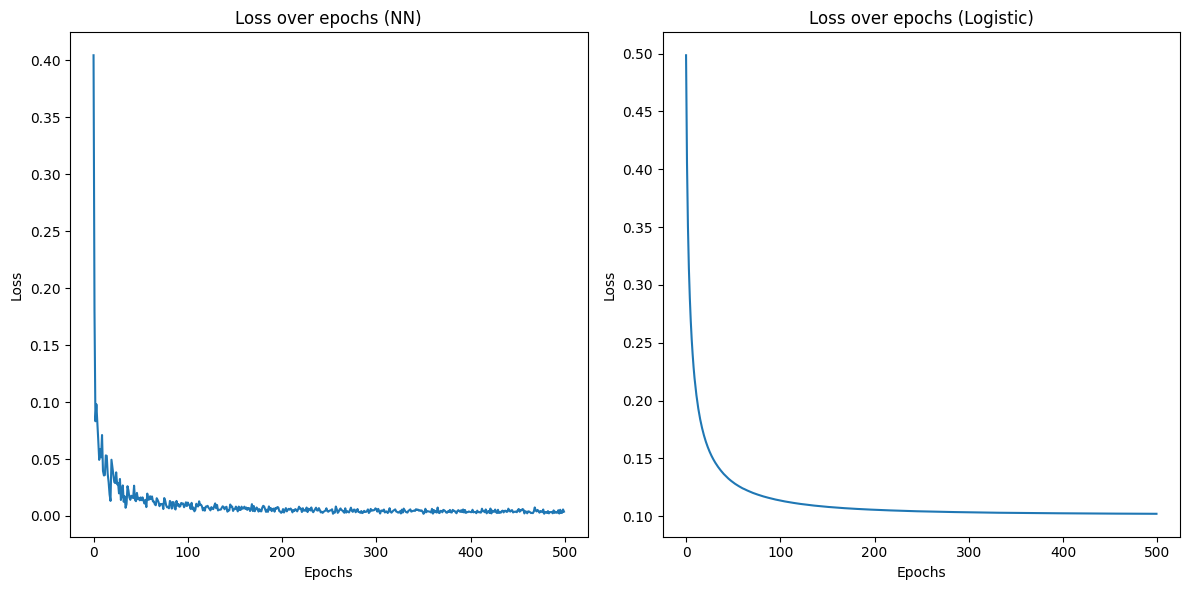

In [258]:
# load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of testing samples: {X_test.shape[0]}")

# one-hot encode the target
y_train_onehot = np.eye(len(np.unique(y_train)))[y_train]
y_test_onehot = np.eye(len(np.unique(y_test)))[y_test]

# normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compare the neural network and logistic regression model
np.random.seed(42)  # set random seed for reproducibility
network_input_size = X_train.shape[1]
layer_output_sizes = [16, 8, 2]
activation_functions = [sigmoid, sigmoid, softmax]
activation_derivatives = [sigmoid_derivative, sigmoid_derivative, softmax_der]
cost_function = cross_entropy
cost_derivative = cross_entropy_derivative
optimizer = NNSGDOptimizer(
    momentum=True,
    momentum_delta=0.9
)

# create the neural network
nn = NeuralNetwork(
    network_input_size=network_input_size,
    layer_output_sizes=layer_output_sizes,
    activation_functions=activation_functions,
    activation_derivatives=activation_derivatives,
    cost_function=cost_function,
    cost_derivative=cost_derivative,
    optimizer=optimizer,
    debug=False
)

# fit the model
EPOCHS = 500
losses = nn.fit(X_train, y_train_onehot, epochs=EPOCHS)

# training accuracy
y_pred = np.argmax(nn.predict(X_train), axis=1)
y_true = np.argmax(y_train_onehot, axis=1)
accuracy = accuracy_score(y_true, y_pred)
print(f"Training accuracy (NN): {accuracy:.4f}")

# testing accuracy
y_pred = np.argmax(nn.predict(X_test), axis=1)
y_true = np.argmax(y_test_onehot, axis=1)
accuracy = accuracy_score(y_true, y_pred)
print(f"Testing accuracy (NN): {accuracy:.4f}")

# plot the loss
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(losses, '-', markersize=2)
plt.title("Loss over epochs (NN)")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# create the logistic regression model
logistic = LogisticRegression(
    learning_rate=0.01,
    l2_lambda=0.01,
    batch_size=32,
    epochs=EPOCHS
)

# fit the model
logistic.fit(X_train, y_train)
losses = logistic.losses

# training accuracy
y_pred = logistic.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Training accuracy (Logistic): {accuracy:.4f}")

# testing accuracy
y_pred = logistic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing accuracy (Logistic): {accuracy:.4f}")

# plot the loss
plt.subplot(1,2,2)
plt.plot(losses, '-', markersize=2)
plt.title("Loss over epochs (Logistic)")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

LR: 0.0001, L2: 0.0001: Converged to 0.4627 in 131 iterations and to 0.2867 after 500 iterations
LR: 0.0001, L2: 0.001: Converged to 0.4647 in 129 iterations and to 0.2868 after 500 iterations
LR: 0.0001, L2: 0.01: Converged to 0.4651 in 129 iterations and to 0.2886 after 500 iterations
LR: 0.0001, L2: 0.1: Converged to 0.4735 in 124 iterations and to 0.3050 after 500 iterations
LR: 0.001, L2: 0.0001: Converged to 0.2277 in 87 iterations and to 0.1177 after 500 iterations
LR: 0.001, L2: 0.001: Converged to 0.2278 in 87 iterations and to 0.1188 after 500 iterations
LR: 0.001, L2: 0.01: Converged to 0.2340 in 84 iterations and to 0.1298 after 500 iterations
LR: 0.001, L2: 0.1: Converged to 0.2739 in 70 iterations and to 0.2043 after 500 iterations
LR: 0.01, L2: 0.0001: Converged to 0.1291 in 37 iterations and to 0.0654 after 500 iterations
LR: 0.01, L2: 0.001: Converged to 0.1303 in 37 iterations and to 0.0700 after 500 iterations
LR: 0.01, L2: 0.01: Converged to 0.1435 in 33 iterations 

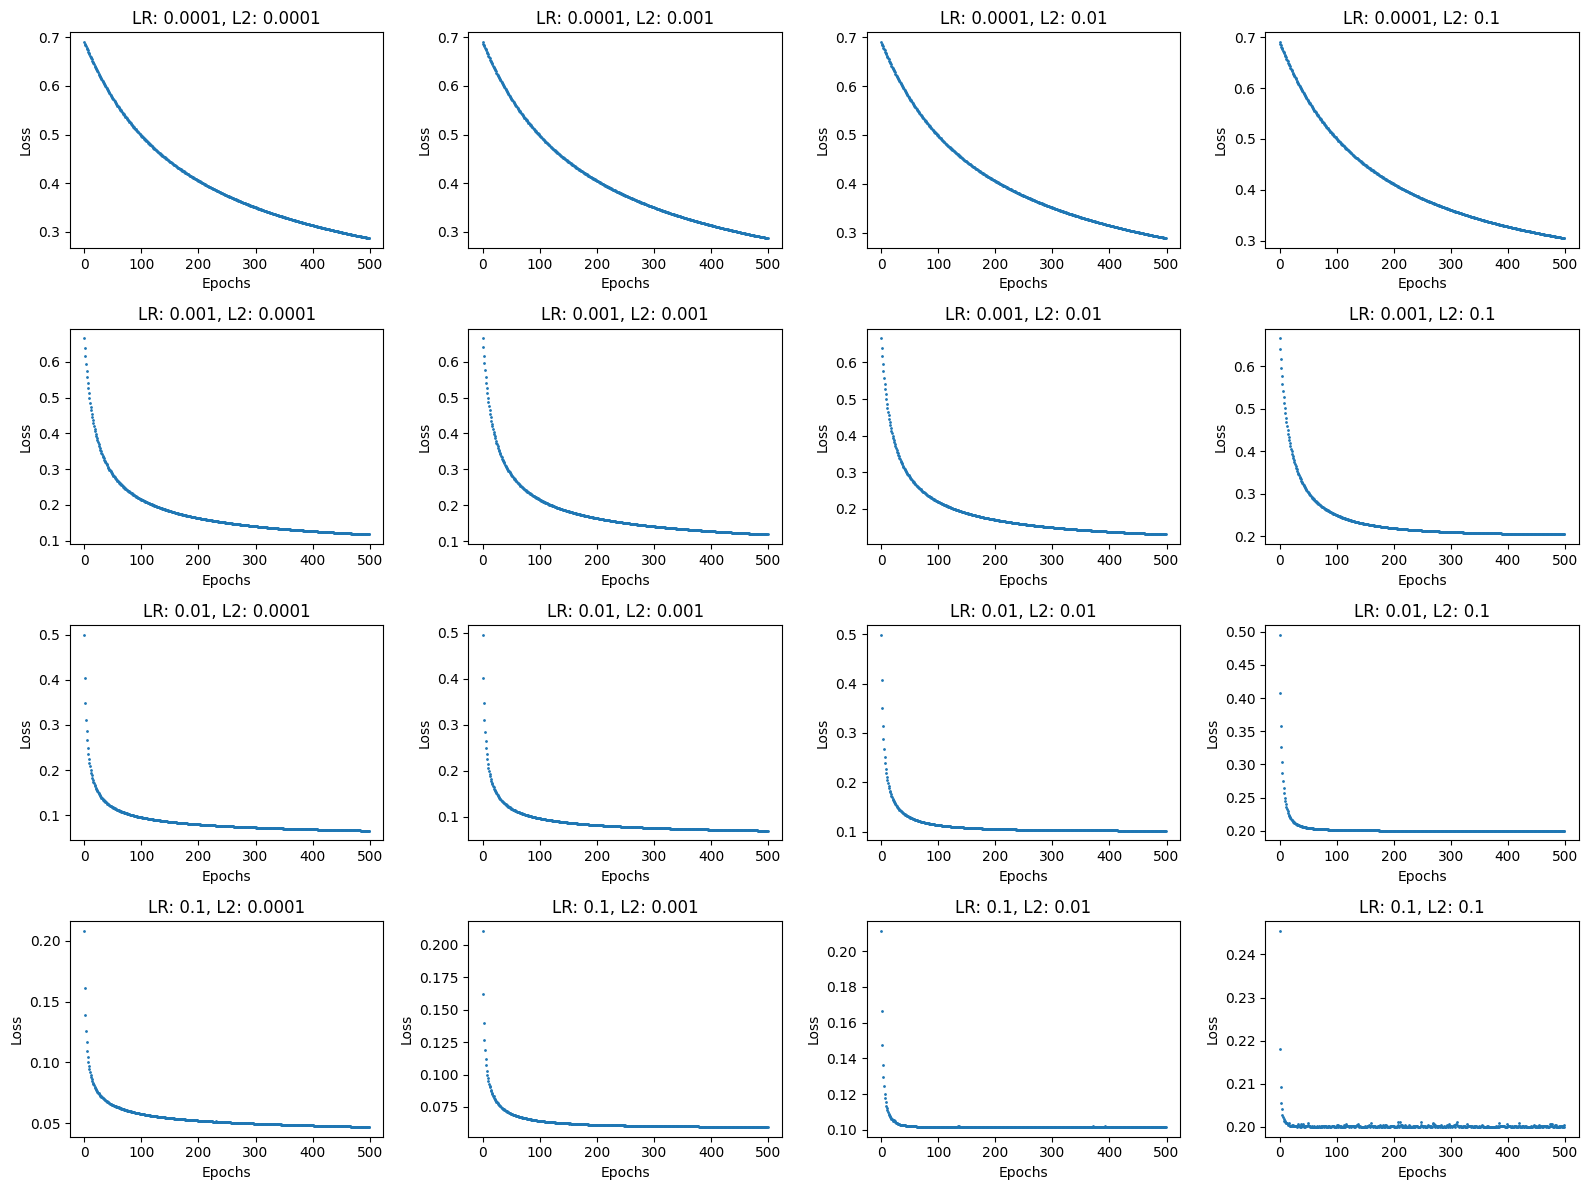

In [260]:
# compare varying learning rates and l2 regularization for logistic regression
np.random.seed(42)  # set random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

learning_rates = [0.0001, 0.001, 0.01, 0.1]
l2_lambdas = [0.0001, 0.001, 0.01, 0.1]
EPOCHS = 500

plt.figure(figsize=(16,12))

for i, learning_rate in enumerate(learning_rates):
    for j, l2_lambda in enumerate(l2_lambdas):
        logistic = LogisticRegression(
            learning_rate=learning_rate,
            l2_lambda=l2_lambda,
            batch_size=32,
            epochs=EPOCHS
        )
        logistic.fit(X_train, y_train)
        losses = logistic.losses

        # number of iterations to convergence
        conv_iter = logistic.num_to_convergence(losses)
        print(f"LR: {learning_rate}, L2: {l2_lambda}: Converged to {losses[conv_iter]:.4f} in {conv_iter} iterations and to {losses[-1]:.4f} after {EPOCHS} iterations")

        plt.subplot(4,4,i*4+j+1)
        plt.plot(losses, '.', markersize=2)
        plt.title(f"LR: {learning_rate}, L2: {l2_lambda}")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")

plt.tight_layout()
plt.show()

### Compare with PyTorch

In [224]:
# Define the logistic regression model
class SimpleLogistic(torch.nn.Module):
    def __init__(self, input_dim):
        super(SimpleLogistic, self).__init__()
        self.linear = torch.nn.Linear(input_dim, 1)  # One output unit for binary classification

    def forward(self, x):
        # Apply linear transformation and sigmoid activation for logistic regression
        return torch.sigmoid(self.linear(x))
    
class TorchLogisticRegression:
    def __init__(self, model, criterion, optimizer):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer

    def fit(self, X, y, epochs=100):
        # Convert data to PyTorch tensors
        X = torch.tensor(X, dtype=torch.float32)
        y = y.reshape(-1, 1)  # Reshape y to match the shape of the output from the model
        y = torch.tensor(y, dtype=torch.float32)

        for epoch in range(epochs):
            # Forward pass
            outputs = self.model(X)
            loss = self.criterion(outputs, y)

            # Backward and optimize
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        return loss.item()

In [225]:
# load data
data = load_breast_cancer()
X = data.data
y = data.target

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

np.random.seed(42)  # set random seed for reproducibility
learning_rate = 0.01
epochs = [100, 200, 300, 400, 500]
optimiser = torch.optim.SGD

for epoch in epochs:
    print(f"Epochs: {epoch}")

    logistic = LogisticRegression(
        learning_rate=learning_rate,
        l2_lambda=0.01,
        batch_size=32,
        epochs=epoch
    )

    # fit the model
    print("own")
    %timeit -r 7 -n 10 logistic.fit(X, y)

    # create the PyTorch model
    model = SimpleLogistic(input_dim=X.shape[1])
    criterion = torch.nn.BCELoss()
    optimizer = optimiser(model.parameters(), lr=learning_rate)
    torch_lr = TorchLogisticRegression(model, criterion, optimizer)

    # fit the model
    print("torch")
    %timeit -r 7 -n 10 torch_lr.fit(X, y, epochs=epoch)



Epochs: 100
own
41.5 ms ± 2.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
torch
28.1 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Epochs: 200
own
80.5 ms ± 3.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
torch
50.2 ms ± 2.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Epochs: 300
own
115 ms ± 2.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
torch
74 ms ± 2.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Epochs: 400
own
154 ms ± 2.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
torch
99.6 ms ± 1.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Epochs: 500
own
193 ms ± 2.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
torch
125 ms ± 1.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Part f) Critical evaluation of the various algorithms

After all these glorious calculations, you should now summarize the
various algorithms and come with a critical evaluation of their pros
and cons. Which algorithm works best for the regression case and which
is best for the classification case. These codes can also be part of
your final project 3, but now applied to other data sets.

## Background literature

1. The text of Michael Nielsen is highly recommended, see Nielsen's book at <http://neuralnetworksanddeeplearning.com/>. It is an excellent read.

2. Goodfellow, Bengio and Courville, Deep Learning at <https://www.deeplearningbook.org/>. Here we recommend chapters 6, 7 and 8

3. Raschka et al. at <https://sebastianraschka.com/blog/2022/ml-pytorch-book.html>. Here we recommend chapters 11, 12 and 13.

## Introduction to numerical projects

Here follows a brief recipe and recommendation on how to write a report for each
project.

  * Give a short description of the nature of the problem and the eventual  numerical methods you have used.

  * Describe the algorithm you have used and/or developed. Here you may find it convenient to use pseudocoding. In many cases you can describe the algorithm in the program itself.

  * Include the source code of your program. Comment your program properly.

  * If possible, try to find analytic solutions, or known limits in order to test your program when developing the code.

  * Include your results either in figure form or in a table. Remember to        label your results. All tables and figures should have relevant captions        and labels on the axes.

  * Try to evaluate the reliabilty and numerical stability/precision of your results. If possible, include a qualitative and/or quantitative discussion of the numerical stability, eventual loss of precision etc.

  * Try to give an interpretation of you results in your answers to  the problems.

  * Critique: if possible include your comments and reflections about the  exercise, whether you felt you learnt something, ideas for improvements and  other thoughts you've made when solving the exercise. We wish to keep this course at the interactive level and your comments can help us improve it.

  * Try to establish a practice where you log your work at the  computerlab. You may find such a logbook very handy at later stages in your work, especially when you don't properly remember  what a previous test version  of your program did. Here you could also record  the time spent on solving the exercise, various algorithms you may have tested or other topics which you feel worthy of mentioning.

## Format for electronic delivery of report and programs

The preferred format for the report is a PDF file. You can also use DOC or postscript formats or as an ipython notebook file.  As programming language we prefer that you choose between C/C++, Fortran2008 or Python. The following prescription should be followed when preparing the report:

  * Use Canvas to hand in your projects, log in  at  <https://www.uio.no/english/services/it/education/canvas/> with your normal UiO username and password.

  * Upload **only** the report file or the link to your GitHub/GitLab or similar typo of  repos!  For the source code file(s) you have developed please provide us with your link to your GitHub/GitLab or similar  domain.  The report file should include all of your discussions and a list of the codes you have developed.  Do not include library files which are available at the course homepage, unless you have made specific changes to them.

  * In your GitHub/GitLab or similar repository, please include a folder which contains selected results. These can be in the form of output from your code for a selected set of runs and input parameters.

Finally, 
we encourage you to collaborate. Optimal working groups consist of 
2-3 students. You can then hand in a common report.